In [ ]:
import pandas as pd
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

In [1]:
# validate_predictions
import json
    
def validate_predictions(json_path):
    """
    Valida que el JSON generado cumple con las condiciones esperadas:
    - Contiene todas las session_id de test.
    - Cada session_id tiene exactamente 5 recomendaciones.
    - No hay productos repetidos en cada sesión.
    - El formato del JSON es correcto.

    Parámetros:
    - json_path: Ruta del archivo JSON generado.
    - test_df: DataFrame de test para comparar session_id.
    """
    test_df = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')
    # 📌 Cargar JSON de predicciones
    with open(json_path, "r") as f:
        predictions = json.load(f)["target"]

    # 📌 Convertir las claves del JSON a enteros
    json_sessions = set(map(int, predictions.keys()))

    # 📌 Obtener session_id únicos de test como enteros
    test_sessions = set(map(int, test_df["session_id"].unique()))

    # ✅ 1️⃣ Verificar que todas las sesiones de test están en el JSON
    missing_sessions = test_sessions - json_sessions
    extra_sessions = json_sessions - test_sessions

    # ✅ 2️⃣ Verificar que cada sesión tiene exactamente 5 recomendaciones sin repeticiones
    incorrect_sessions = {
        session: recs for session, recs in predictions.items()
        if len(recs) != 5 or len(set(recs)) != 5
    }

    # 📊 Resultados de la validación
    print("\n🔍 **Resultados de Validación:**")
    print(f"✅ Sesiones en test: {len(test_sessions)}")
    print(f"✅ Sesiones en JSON: {len(json_sessions)}")
    print(f"❌ Sesiones faltantes: {len(missing_sessions)}")
    print(f"❌ Sesiones extra: {len(extra_sessions)}")
    print(f"❌ Sesiones con errores (duplicados o < 5 productos): {len(incorrect_sessions)}")

    if not missing_sessions and not extra_sessions and not incorrect_sessions:
        print("\n🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅")
        return True
    else:
        print("\n⚠️ ¡Atención! Se encontraron errores en el JSON de predicciones.")
        return False

# **Path y carga**

In [21]:
# Rutas
import pandas as pd
import json

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

In [1]:
import pandas as pd
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

In [23]:
# train["country"] = train["country"].astype(str).astype("category")
# test["country"] = test["country"].astype(str).astype("category")
# # # # # Guardar los datasets actualizados
# train.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet', index=False)
# test.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet', index=False)



In [24]:
# 1️⃣ Verificar que train y test tienen las mismas columnas (excepto target)
train_columns = set(train.columns) - {"add_to_cart"}
test_columns = set(test.columns)

print("✅ Columnas en Train pero no en Test:", train_columns - test_columns)
print("✅ Columnas en Test pero no en Train:", test_columns - train_columns)

# 2️⃣ Revisar tipos de datos
print("\n📌 Tipos de datos en Train:\n", train.dtypes)
print("\n📌 Tipos de datos en Test:\n", test.dtypes)

# 3️⃣ Comprobar valores nulos
print("\n🔍 Valores nulos en Train:\n", train.isnull().sum()[train.isnull().sum() > 0])
print("\n🔍 Valores nulos en Test:\n", test.isnull().sum()[test.isnull().sum() > 0])

# 4️⃣ Identificar valores fuera de rango
print("\n📊 Valores únicos en 'hour':")
print("Train:", train["hour"].unique())
print("Test:", test["hour"].unique())

print("\n📊 Valores únicos en 'country':")
print("Train:", train["country"].unique())
print("Test:", test["country"].unique())

print("\n📊 Memoria dataser':")
print("Train:", train.memory_usage(deep=True).sum(), "bytes")
print("Train:", test.memory_usage(deep=True).sum(), "bytes")

# 5️⃣ Revisar la distribución de la variable objetivo
print("\n🎯 Distribución de 'add_to_cart' en Train:")
print(train["add_to_cart"].value_counts(normalize=True))

✅ Columnas en Train pero no en Test: set()
✅ Columnas en Test pero no en Train: set()

📌 Tipos de datos en Train:
 session_id              int32
add_to_cart              int8
user_id                 int32
country              category
partnumber              int32
device_type              int8
pagetype_group       category
cod_section_group        int8
RFM_PCA               float32
hour                     int8
color_id                int16
family                  int16
embedding_pca_1       float32
embedding_pca_2       float32
embedding_pca_3       float32
embedding_pca_4       float32
embedding_pca_5       float32
embedding_pca_6       float32
embedding_pca_7       float32
embedding_pca_8       float32
embedding_pca_9       float32
embedding_pca_10      float32
embedding_pca_11      float32
embedding_pca_12      float32
embedding_pca_13      float32
embedding_pca_14      float32
embedding_pca_15      float32
embedding_pca_16      float32
embedding_pca_17      float32
embedding_pca_1

# **EDA**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Resumen general
print("\n📌 Dimensiones del dataset:")
print("Train:", train.shape)
print("Test:", test.shape)

print("\n📌 Resumen estadístico Train:")
print(train.describe(include='all'))

print("\n📌 Resumen estadístico Test:")
print(test.describe(include='all'))


📌 Dimensiones del dataset:
Train: (46551445, 32)
Test: (29275, 31)

📌 Resumen estadístico Train:
          session_id   add_to_cart       user_id   country    partnumber  \
count   4.655144e+07  4.655144e+07  4.655144e+07  46551445  4.655144e+07   
unique           NaN           NaN           NaN         4           NaN   
top              NaN           NaN           NaN        29           NaN   
freq             NaN           NaN           NaN  13664727           NaN   
mean    2.582898e+06  5.898384e-02  4.103133e+04       NaN  2.171479e+04   
std     1.493335e+06  2.355945e-01  1.164802e+05       NaN  1.248680e+04   
min     1.000000e+00  0.000000e+00 -1.000000e+00       NaN  1.000000e+00   
25%     1.289981e+06  0.000000e+00 -1.000000e+00       NaN  1.105200e+04   
50%     2.580033e+06  0.000000e+00 -1.000000e+00       NaN  2.164900e+04   
75%     3.875410e+06  0.000000e+00 -1.000000e+00       NaN  3.242300e+04   
max     5.171848e+06  1.000000e+00  5.570060e+05       NaN  4.3692

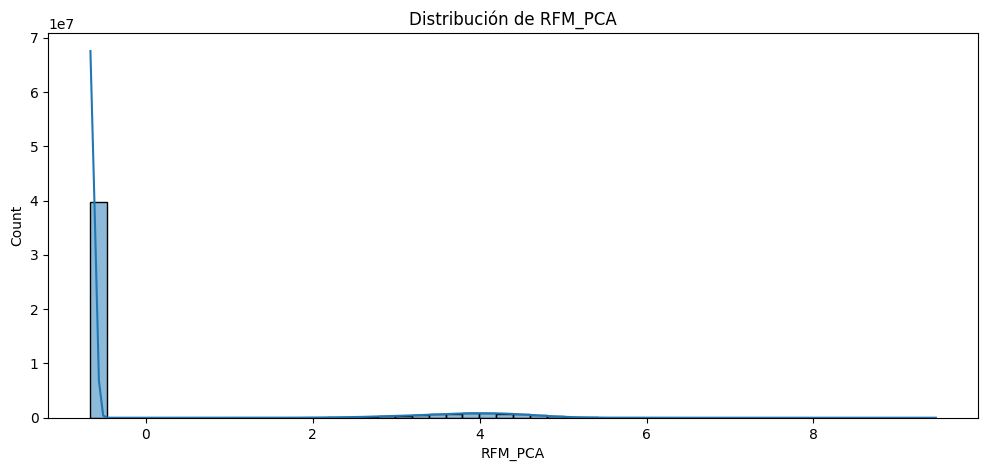

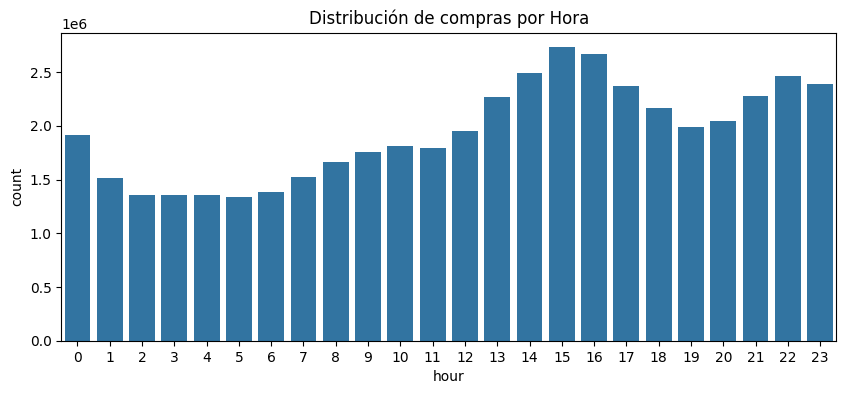

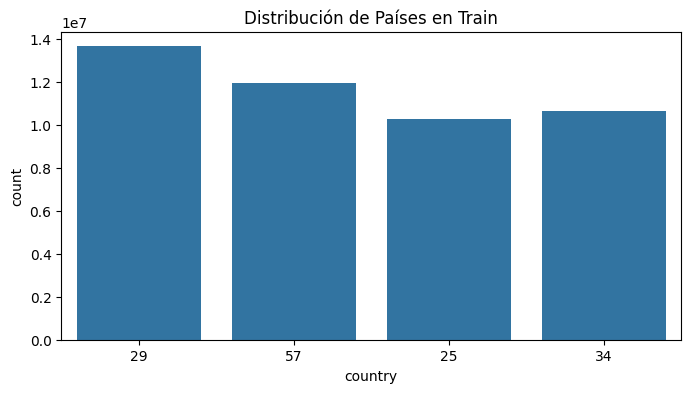

: 

In [27]:
# 2️⃣ Distribuciones
plt.figure(figsize=(12, 5))
sns.histplot(train["RFM_PCA"], bins=50, kde=True)
plt.title("Distribución de RFM_PCA")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x=train["hour"], order=sorted(train["hour"].unique()))
plt.title("Distribución de compras por Hora")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x=train["country"].astype(str))
plt.title("Distribución de Países en Train")
plt.show()

In [4]:
# 3️⃣ Análisis de Embeddings PCA
pca_columns = [f"embedding_pca_{i}" for i in range(1, 21)]
print("\n📌 Media y Varianza de Embeddings PCA:")
print(train[pca_columns].describe().T[["mean", "std"]])


📌 Media y Varianza de Embeddings PCA:
                      mean       std
embedding_pca_1  -0.004046  3.150573
embedding_pca_2  -0.000344  2.753313
embedding_pca_3   0.000296  2.339775
embedding_pca_4  -0.000244  1.963993
embedding_pca_5   0.000463  1.895945
embedding_pca_6  -0.000070  1.731522
embedding_pca_7   0.001450  1.637606
embedding_pca_8  -0.001014  1.550821
embedding_pca_9  -0.000900  1.404220
embedding_pca_10  0.000777  1.353623
embedding_pca_11 -0.000255  1.249303
embedding_pca_12 -0.000569  1.213046
embedding_pca_13 -0.000726  1.165368
embedding_pca_14 -0.000392  1.100094
embedding_pca_15 -0.000044  1.069368
embedding_pca_16 -0.000235  1.054858
embedding_pca_17 -0.000015  0.999294
embedding_pca_18  0.000210  0.959843
embedding_pca_19 -0.000061  0.919595
embedding_pca_20  0.000372  0.903106


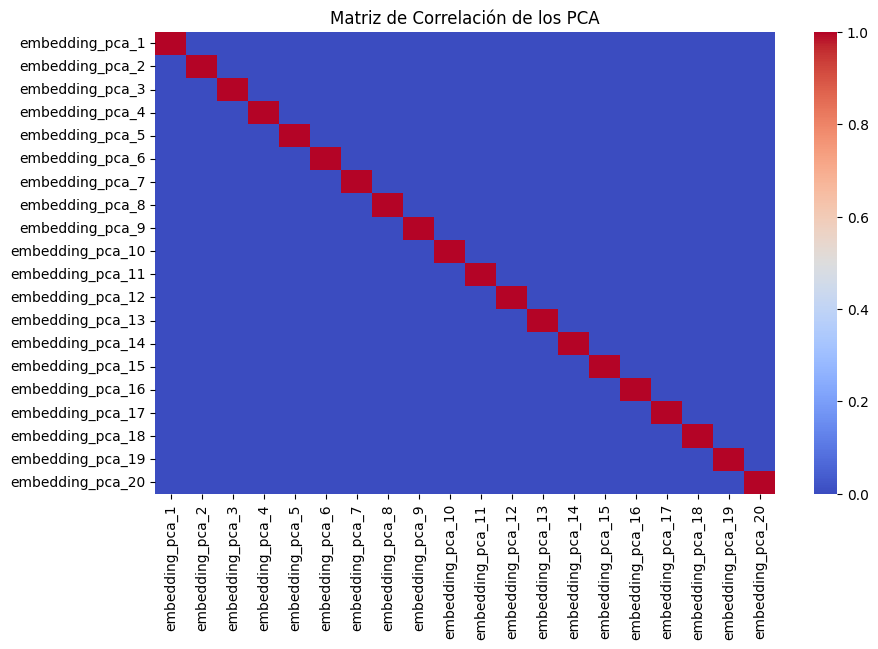

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(train[pca_columns].corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación de los PCA")
plt.show()

In [7]:
# 4️⃣ Verificación de Anomalías
def detect_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n🔍 Valores atípicos en {col}: {outliers.shape[0]}")

detect_outliers(train, "RFM_PCA")
detect_outliers(train, "hour")


🔍 Valores atípicos en RFM_PCA: 6856730

🔍 Valores atípicos en hour: 0


# **Análisis respecto a add_to_cart**

## **·** Matriz de correlación con add_to_cart

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from scipy.stats import spearmanr


In [4]:
# Filtrar solo variables numéricas
numeric_cols = train.select_dtypes(include=[np.number]).columns

In [5]:
# 🚀 1️⃣ Matriz de correlación con `add_to_cart`
correlation_df = train[numeric_cols].corr()["add_to_cart"].sort_values(ascending=False)

# 🚀 2️⃣ Correlación de Spearman
spearman_corr = {col: spearmanr(train[col], train["add_to_cart"]).correlation for col in numeric_cols}

# 📊 Mostrar resultados
correlation_df = pd.DataFrame({
    "Pearson": correlation_df,
    "Spearman": pd.Series(spearman_corr)
}).sort_values(by="Pearson", ascending=False)

print(correlation_df)

                    Pearson  Spearman
add_to_cart        1.000000  1.000000
cod_section_group  0.058196  0.047837
embedding_pca_5    0.036978  0.037290
device_type        0.035813  0.035258
family             0.023026  0.022931
RFM_PCA            0.018308  0.018085
user_id            0.015068  0.017663
embedding_pca_17   0.008024  0.007539
embedding_pca_14   0.006683  0.005811
embedding_pca_7    0.006053  0.004457
embedding_pca_20   0.003330  0.004302
color_id           0.003274  0.004923
embedding_pca_15   0.002740  0.003868
embedding_pca_1    0.002321  0.000079
embedding_pca_16   0.001451  0.000448
embedding_pca_12   0.000988 -0.001083
partnumber        -0.000043 -0.000050
session_id        -0.000114 -0.000115
embedding_pca_10  -0.000427 -0.000614
embedding_pca_13  -0.000480  0.000393
embedding_pca_3   -0.000555  0.002221
embedding_pca_18  -0.000947  0.001019
embedding_pca_11  -0.001344 -0.001917
hour              -0.003040 -0.001790
embedding_pca_19  -0.003215 -0.002116
embedding_pc

## **·** Distribución de add_to_cart en variables categóricas

/tmp/ipykernel_112318/2471875387.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rates[col] = train.groupby(col)["add_to_cart"].mean() * 100



📊 Tasa de Conversión por Categoría:

🔹 country:
country
25    6.669896
29    4.541920
34    9.323465
57    3.735385
Name: add_to_cart, dtype: float64

🔹 device_type:
device_type
1    5.660113
2    7.108513
3    8.995332
Name: add_to_cart, dtype: float64

🔹 pagetype_group:
pagetype_group
Específico    99.842438
General        5.299009
Name: add_to_cart, dtype: float64

🔹 cod_section_group:
cod_section_group
1     5.394742
2     4.575151
3    10.411869
Name: add_to_cart, dtype: float64


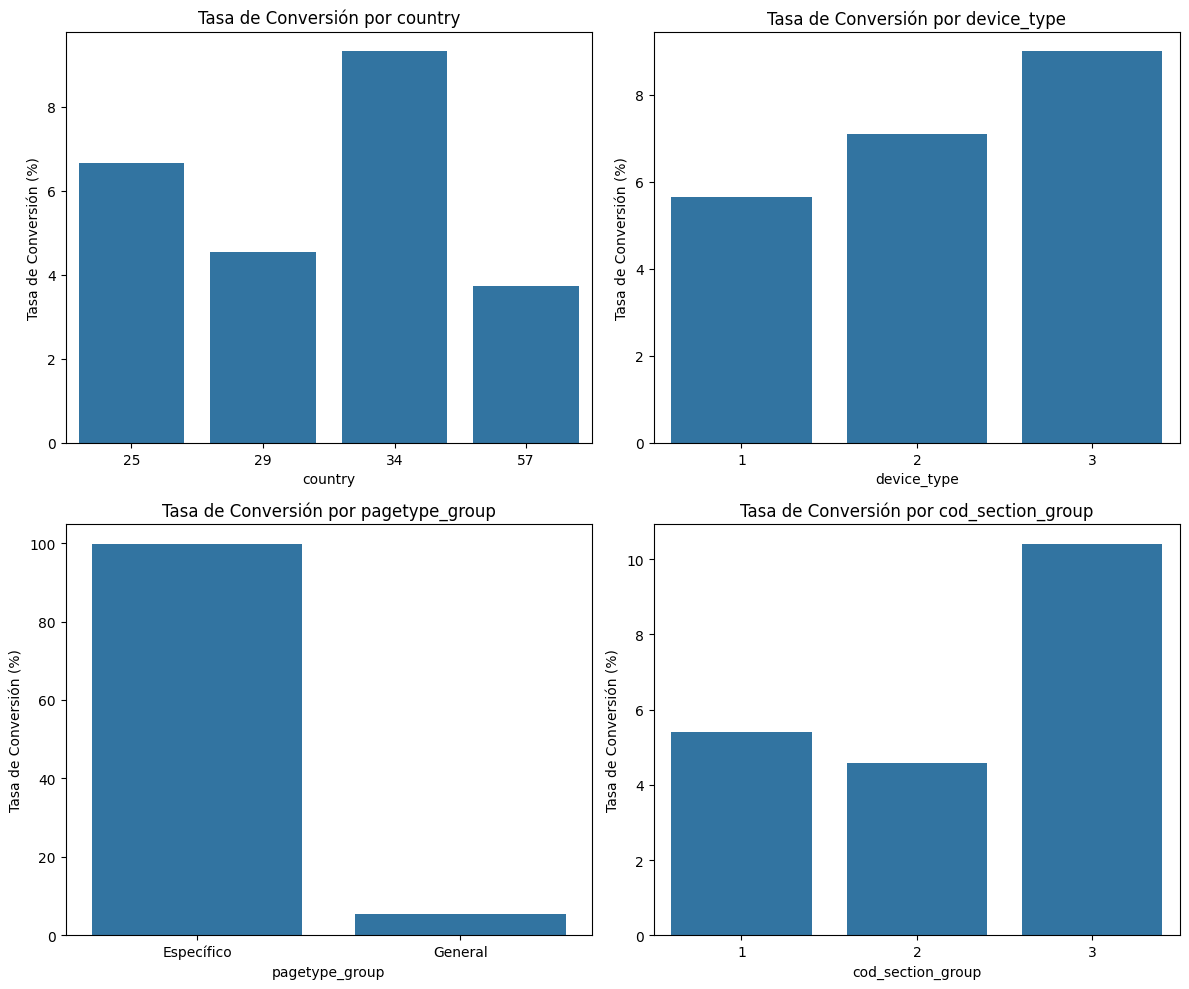

In [6]:
# 📌 2️⃣ Distribución de `add_to_cart` en variables categóricas
categorical_vars = ["country", "device_type", "pagetype_group", "cod_section_group"]
conversion_rates = {}

for col in categorical_vars:
    conversion_rates[col] = train.groupby(col)["add_to_cart"].mean() * 100

# 📊 Mostrar tasas de conversión
print("\n📊 Tasa de Conversión por Categoría:")
for col, rates in conversion_rates.items():
    print(f"\n🔹 {col}:\n{rates}")

# 📊 Graficar tasas de conversión
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.barplot(x=conversion_rates[col].index, y=conversion_rates[col].values, ax=axes[i])
    axes[i].set_title(f"Tasa de Conversión por {col}")
    axes[i].set_ylabel("Tasa de Conversión (%)")

plt.tight_layout()
plt.show()

## **·** Importancia de variables con LightGBM

/tmp/ipykernel_117753/1048438150.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_sample = train.groupby("add_to_cart", group_keys=False).apply(lambda x: x.sample(int(sample_size * len(x) / len(train)), random_state=42))



📊 Importancia de Variables (LightGBM):
              Feature  Importance
9              family         212
1             country         171
14    embedding_pca_5         166
7                hour         159
13    embedding_pca_4         148
11    embedding_pca_2         124
23   embedding_pca_14         117
18    embedding_pca_9         113
5   cod_section_group         112
12    embedding_pca_3         109
15    embedding_pca_6         109
10    embedding_pca_1         108
27   embedding_pca_18          98
19   embedding_pca_10          97
21   embedding_pca_12          92
16    embedding_pca_7          89
25   embedding_pca_16          87
8            color_id          86
24   embedding_pca_15          85
17    embedding_pca_8          84
3         device_type          83
26   embedding_pca_17          82
4      pagetype_group          80
29   embedding_pca_20          79
20   embedding_pca_11          75
2          partnumber          69
22   embedding_pca_13          56
28   emb

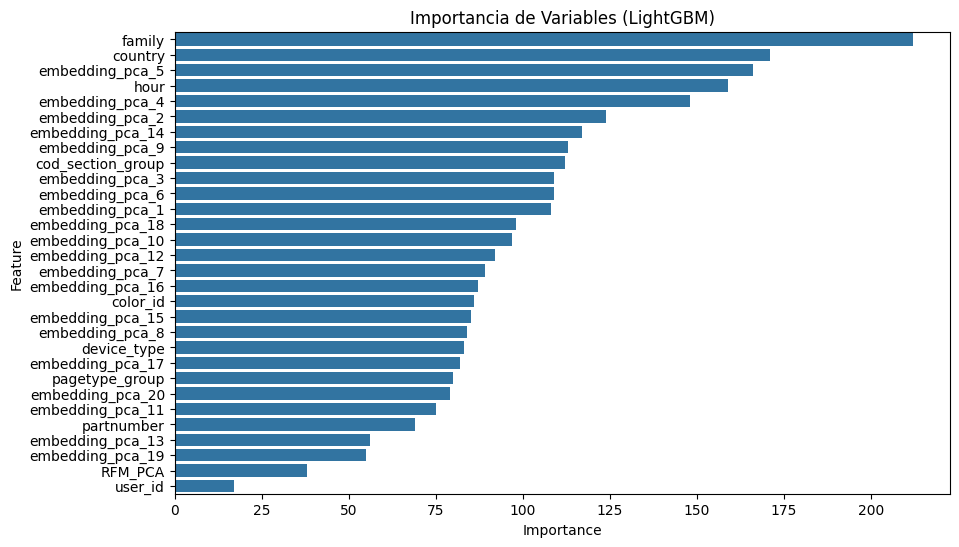

In [4]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🚀 1️⃣ Muestreo estratificado para mantener la proporción de clases
sample_size = 20_000_000  # Ajustar según capacidad de memoria
train_sample = train.groupby("add_to_cart", group_keys=False).apply(lambda x: x.sample(int(sample_size * len(x) / len(train)), random_state=42))

# 🚀 2️⃣ Preparar datos para LightGBM
features = [col for col in train_sample.columns if col not in ["session_id", "add_to_cart"]]
X_train = train_sample[features]
y_train = train_sample["add_to_cart"]

lgb_train = lgb.Dataset(X_train, label=y_train)
params = {"objective": "binary", "boosting_type": "gbdt", "metric": "auc", "verbosity": -1}

# 🚀 3️⃣ Entrenar modelo
model = lgb.train(params, lgb_train, num_boost_round=100)

# 📊 4️⃣ Mostrar importancia de variables
importance_df = pd.DataFrame({"Feature": features, "Importance": model.feature_importance()})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("\n📊 Importancia de Variables (LightGBM):")
print(importance_df)

# 📊 5️⃣ Graficar importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(y=importance_df["Feature"], x=importance_df["Importance"])
plt.title("Importancia de Variables (LightGBM)")
plt.show()


## **·** MDI - MDA

In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Sample del dataset (ajusta según memoria disponible)
sample_size = 10_000_000
train_sample = train.sample(n=sample_size, random_state=42)

# 🚀 1️⃣ Preparar datos
features = [col for col in train_sample.columns if col not in ["session_id", "add_to_cart"]]
X_train, X_val, y_train, y_val = train_test_split(train_sample[features], train_sample["add_to_cart"], test_size=0.2, random_state=42)

# Convertir variables categóricas a categoría en LightGBM
categorical_features = X_train.select_dtypes(include=["category"]).columns.tolist()
for col in categorical_features:
    X_train[col] = X_train[col].cat.codes
    X_val[col] = X_val[col].cat.codes

# 🚀 2️⃣ Entrenar modelo LightGBM
params = {"objective": "binary", "boosting_type": "gbdt", "metric": "auc"}
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train, categorical_feature=categorical_features)
model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100, callbacks=[lgb.callback.log_evaluation(period=10)])

# 🚀 3️⃣ MDI (Mean Decrease in Impurity)
mdi_importance = model.feature_importance(importance_type="split")
mdi_df = pd.DataFrame({"Feature": features, "MDI": mdi_importance}).sort_values(by="MDI", ascending=False)

# 🚀 4️⃣ MDA (Mean Decrease in Accuracy)
baseline_auc = roc_auc_score(y_val, model.predict(X_val))
mda_importance = {}

for feature in features:
    X_val_shuffled = X_val.copy()
    if feature in categorical_features:
        X_val_shuffled[feature] = np.random.permutation(X_val_shuffled[feature].values)  # Permutamos categorías codificadas
    else:
        X_val_shuffled[feature] = np.random.permutation(X_val_shuffled[feature].values)

    shuffled_auc = roc_auc_score(y_val, model.predict(X_val_shuffled))
    mda_importance[feature] = baseline_auc - shuffled_auc

mda_df = pd.DataFrame.from_dict(mda_importance, orient="index", columns=["MDA"]).reset_index().rename(columns={"index": "Feature"})
mda_df = mda_df.sort_values(by="MDA", ascending=False)

# 📊 Mostrar resultados
print("\n📊 Importancia de Variables - MDI:")
print(mdi_df.head(10))

print("\n📊 Importancia de Variables - MDA:")
print(mda_df.head(10))

# 📊 Graficar importancias
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=mdi_df.head(20), x="MDI", y="Feature", ax=axes[0])
axes[0].set_title("Importancia de Variables (MDI)")

sns.barplot(data=mda_df.head(20), x="MDA", y="Feature", ax=axes[1])
axes[1].set_title("Importancia de Variables (MDA)")

plt.tight_layout()
plt.show()


NameError: name 'train' is not defined

# **Modelo BENCHMARCK - Lightgbm básico - Sin técnicas de optimización**


## Modelo

In [3]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 📌 Cargar datos
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Sampleamos los datos para reducir el tamaño y acelerar el entrenamiento
train_sample = train.sample(n=30_000_000, random_state=42)  # Ajusta según RAM disponible

# 📌 Definir features y target
features = [col for col in train_sample.columns if col not in ["session_id", "add_to_cart"]]
X_train, X_val, y_train, y_val = train_test_split(train_sample[features], train_sample["add_to_cart"], test_size=0.2, random_state=42)

# 📌 Crear datasets de LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

# 📌 Definir parámetros del modelo
params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "verbosity": -1
}

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100, callbacks=callbacks)

# 📊 Evaluación inicial
y_pred_val = model.predict(X_val)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"\n🔍 AUC en validación: {auc_score:.5f}")

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_benchmark.txt')
print(f"\n📥 Modelo guardado")


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.691796
Evaluated only: auc

🔍 AUC en validación: 0.69180

📥 Modelo guardado


In [ ]:
# 📥 Guardar el modelo entrenado
# model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_benchmark.txt')# 

In [ ]:
# 📤 Cargar el modelo guardado
# loaded_model = lgb.Booster(model_file='lightgbm_model.txt')

# Ahora puedes usar loaded_model para hacer predicciones
# y_pred_loaded = loaded_model.predict(X_val)

## Predicciones + respaldo productos populares

In [ ]:
import json
import pandas as pd

# 📌 Cargar el dataset de test
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Cargar train para calcular productos populares
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Calcular productos más populares
top_products = (
    train[train["add_to_cart"] == 1]["partnumber"]
    .value_counts()
    .index[:10]
    .tolist()
)

print(f"📊 Top productos de respaldo: {top_products}")

# 📌 Predecir probabilidades para test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones principales
recommendations = (
    test.groupby("session_id")
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)


# 📌 Aplicar respaldo con productos populares
for session, products in recommendations.items():
    unique_products = list(dict.fromkeys(products))  # Eliminar duplicados manteniendo orden
    while len(unique_products) < 5:
        for p in top_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break
    recommendations[session] = unique_products[:5]  # Asegurar que solo sean 5 productos

# 📌 Guardar predicciones en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/predictions/predictions_3_benchmark.json"
with open(output_path, "w") as f:
    json.dump({"target": recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")


📊 Top productos de respaldo: [40779, 24271, 2763, 5222, 8778, 37733, 22168, 25032, 12808, 32624]

✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/predictions/predictions_3_benchmark.json


/tmp/ipykernel_117753/2870922397.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


## Predicciones + respaldo optimizado

### Descripción respaldo

#### **📌 Estrategia de Respaldo Inteligente**
##### **1️⃣ Casos ideales (sin respaldo)**
   - Si la sesión tiene **5 productos únicos recomendados por el modelo**, no tocamos nada. ✅

##### **2️⃣ Si la sesión tiene recomendaciones repetidas o menos de 5 productos**
   - Eliminamos duplicados manteniendo el orden natural de la recomendación.  
   - Luego, **según el tipo de usuario, aplicamos un respaldo adaptado**.

##### **3️⃣ Identificación del usuario**
Para cada `session_id`, podemos revisar el `user_id` en **test**:
   - Si `user_id` es **-1** → Usuario **no logueado**.
   - Si `user_id` está presente en `train` → Usuario con **datos previos**.

##### **4️⃣ Respaldo según el tipo de usuario**
###### **🟢 Caso 1: No logueado, nuevo, sin datos previos**
   - No está en `train`, ni en `test` con datos previos.
   - **Solución**: Se usan los productos **más populares** globalmente.

###### **🟡 Caso 2: No logueado, nuevo, pero con datos previos en la sesión**
   - No está en `train`, pero ha interactuado en la sesión actual.
   - **Solución**: Se recomienda productos **similares a los que ya vio** en la sesión.
   - Podemos basarnos en **family, country y los PCA más importantes**.

###### **🟠 Caso 3: Logueado con pocos o ningún dato previo**
   - Está en `train`, pero con muy pocos datos o solo un par de compras.
   - **Solución**: Se recomienda en base a su país (`country`) y sus compras previas.

###### **🔴 Caso 4: Logueado con muchos datos previos**
   - Está en `train` con suficiente historial.
   - **Solución**: Se buscan productos que hayan sido **comprados por usuarios similares** a él.


### Código predicciones + respaldo optimizado

In [ ]:
# predictions_3_benchmark_respaldo_opt
import json
import pandas as pd
from collections import defaultdict

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_benchmark_respaldo_opt.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


In [ ]:
#  predictions_3_benchmark_respaldo_opt_v2 - Back_up json mejorado MAL
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_benchmark.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train.loc[train["add_to_cart"] == 1, "partnumber"].value_counts().index[:10].tolist()

# 📌 Obtener productos populares por país y familia (precomputar para evitar cálculos repetitivos)
popular_by_country = train[train["add_to_cart"] == 1].groupby("country")["partnumber"].value_counts().unstack(fill_value=0)
popular_by_family = train[train["add_to_cart"] == 1].groupby("family")["partnumber"].value_counts().unstack(fill_value=0)

# 📌 Obtener información de usuarios en train (precomputado para evitar búsquedas repetidas)
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "partnumber": lambda x: list(x)}
).to_dict(orient="index")

# 📌 Obtener tasa de conversión por producto (precomputado)
conversion_rate = train.groupby("partnumber")["add_to_cart"].mean().sort_values(ascending=False)

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión de manera más eficiente
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(lambda x: x.head(5).tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente optimizado
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    unique_products = list(dict.fromkeys(recommended_products))

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id in user_profiles:
            user_data = user_profiles[user_id]
            past_purchases = user_data["partnumber"]

            # 🟢 Agregar productos que el usuario compró antes (si existen)
            backup_products.extend(past_purchases)

            # 🔵 Agregar productos similares según conversión
            if past_purchases:
                most_bought_product = past_purchases[0]
                product_family = user_data["family"]
                product_cod_section = train.loc[train["partnumber"] == most_bought_product, "cod_section_group"].values[0]
                
                similar_products = conversion_rate.loc[
                    (train["family"] == product_family) & 
                    (train["cod_section_group"] == product_cod_section)
                ].index.tolist()

                backup_products.extend(similar_products)

        # 🟡 Productos populares por país y familia
        session_data = test[test["session_id"] == session_id]
        session_family = session_data["family"].mode()[0]
        session_country = session_data["country"].mode()[0]

        if session_country in popular_by_country:
            backup_products.extend(popular_by_country.loc[session_country].index[:10].tolist())

        if session_family in popular_by_family:
            backup_products.extend(popular_by_family.loc[session_family].index[:10].tolist())

        # 🔴 Productos populares globales (última opción)
        backup_products.extend(top_products)

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        seen = set(unique_products)
        for p in backup_products:
            if p not in seen:
                seen.add(p)
                unique_products.append(p)
            if len(unique_products) == 5:
                break

    final_recommendations[session_id] = unique_products[:5]

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_benchmark_respaldo_opt_v2.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar JSON generado
validate_predictions(output_path)



In [ ]:
# Analizamos el json si ha fallado para saber en que ha podido fallar.
import json
import pandas as pd
from collections import Counter

# 📌 Cargar datasets
train_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet"
test_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet"
json_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_benchmark_respaldo_opt.json"

train = pd.read_parquet(train_path)
test = pd.read_parquet(test_path)

# 📌 Cargar JSON generado
with open(json_path, "r") as f:
    predictions = json.load(f)["target"]

# 📌 Detectar sesiones con errores
errors = {}
for session_id, products in predictions.items():
    product_counts = Counter(products)
    duplicates = [p for p, count in product_counts.items() if count > 1]
    
    if len(products) < 5 or duplicates:
        errors[session_id] = {
            "num_products": len(products),
            "duplicates": duplicates,
            "original_products": products
        }

# 📌 Analizar casos con errores
print(f"\n🔍 **Total sesiones con errores:** {len(errors)}")
for session_id, info in list(errors.items())[:10]:  # Mostrar 10 ejemplos
    print(f"\n📌 **Session ID:** {session_id}")
    print(f"  🔸 Productos generados: {info['original_products']}")
    print(f"  🔸 Cantidad de productos: {info['num_products']} (deberían ser 5)")
    print(f"  🔸 Productos duplicados: {info['duplicates']}")

    # 📌 Revisar información del usuario en test
    session_data = test[test["session_id"] == int(session_id)]
    user_id = session_data["user_id"].values[0] if not session_data.empty else None

    print(f"  🔸 User ID: {user_id}")
    if user_id and user_id in train["user_id"].values:
        user_data = train[train["user_id"] == user_id]
        print(f"  🔸 Datos en train: {len(user_data)} interacciones previas")

    # 📌 Revisar respaldo aplicado
    print(f"  🔸 ¿Se aplicó respaldo?: {'Sí' if len(info['original_products']) < 5 else 'No'}")


In [ ]:
# Analisis de los ids que fallaron.
import pandas as pd

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Lista de user_id con fallos en recomendaciones
problematic_users = [
    13487, 408362, 133367, 313782, 72258, 8685, 409779, 492753, 340764, 200903
]

# 📌 Filtrar train por los user_id problemáticos
user_analysis = train[train["user_id"].isin(problematic_users)]

# 📌 Agrupar por usuario y ver estadísticas
user_stats = user_analysis.groupby("user_id").agg(
    interactions=("session_id", "count"),
    unique_products=("partnumber", "nunique"),
    country=("country", "first"),
    family=("family", "first"),
    device_type=("device_type", "first"),
    pagetype_group=("pagetype_group", "first"),
    cod_section_group=("cod_section_group", "first")
).reset_index()

# 📌 Ver productos que estos usuarios han añadido al carrito antes
user_products = user_analysis[user_analysis["add_to_cart"] == 1].groupby("user_id")["partnumber"].apply(list)

# 📌 Mostrar resultados
print("\n📊 Estadísticas de usuarios problemáticos:")
print(user_stats)

print("\n📌 Productos añadidos al carrito por cada usuario:")
print(user_products)


# **Modelo LightGBM - Optimizaciones - Añadimos métricas** 

### Código entrenamiento modelo

In [5]:
import pandas as pd
# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Cargar dataset
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Muestreo eficiente
sample_size = 30_000_000  # Ajusta según RAM
train_sample = train.sample(n=sample_size, random_state=42).reset_index(drop=True)

del train  # 🚀 Liberar memoria

# 📌 🔹 Guardar `session_id` antes de eliminarlo
session_ids = train_sample["session_id"]

# 📌 Seleccionar solo las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir características y target (sin eliminar `session_id` aún)
X = train_sample[selected_features]
y = train_sample["add_to_cart"]

# 📌 Dividir en Train y Validation
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    X, y, session_ids, test_size=0.2, random_state=42
)

# 📌 🔹 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 🚀 Crear datasets para LightGBM con `group` (query groups)
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

# 📌 Configuración optimizada de LightGBM con `lambdarank`
params = {
    "objective": "lambdarank",
    "metric": "ndcg",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "verbosity": -1,
    "feature_pre_filter": False,
}

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100, callbacks=callbacks)

print(f"\n✅ Modelo entrenado correctamente sobre muestra de {sample_size} registros")

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features.txt')
print("\n📥 Modelo guardado")


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[97]	valid_0's ndcg@1: 0.942707	valid_0's ndcg@2: 0.954536	valid_0's ndcg@3: 0.960581	valid_0's ndcg@4: 0.963827	valid_0's ndcg@5: 0.965786
Evaluated only: ndcg@1

✅ Modelo entrenado correctamente sobre muestra de 30000000 registros

📥 Modelo guardado


### Evaluación con métricas de ranking

In [ ]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


### Predicciones

In [ ]:
# predictions_3_modelo_opt_features.json
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features.txt')

features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_modelo_opt_features.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


In [6]:
# 📌 Validar predicciones
validate_predictions(output_path)


🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# **Modelo LightGBM - Optimizaciones - Tratamos debilidades de los datasets** 

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Cargar dataset
train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Muestreo eficiente
# sample_size = 40_000_000  # Ajusta según RAM
# train_sample = train.sample(n=sample_size, random_state=42).reset_index(drop=True)

# del train  # 🚀 Liberar memoria

# 📌 🔹 Guardar `session_id` antes de eliminarlo
session_ids = train_sample["session_id"]

# 📌 Seleccionar solo las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir características y target (sin eliminar `session_id` aún)
X = train_sample[selected_features]
y = train_sample["add_to_cart"]

# 📌 Dividir en Train y Validation
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    X, y, session_ids, test_size=0.2, random_state=42
)

# 📌 🔹 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 🚀 Crear datasets para LightGBM con `group` (query groups)
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"⚖️ Ratio de clases (Negativos/Positivos): {scale_pos_weight:.2f}")

# 📌 Configuración optimizada de LightGBM con `lambdarank`
params = {
    "objective": "lambdarank",
    "metric": "ndcg",
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 127,
    "max_depth": 10,
    "verbosity": -1,
    "feature_pre_filter": False,
    'scale_pos_weight': min(scale_pos_weight, 10),
    "feature_fraction": 0.8,  # Usa solo el 80% de features en cada iteración
    "bagging_fraction": 0.9,  # Usa solo el 90% de los datos en cada iteración
    "bagging_freq": 5,  # Se aplica bagging cada 5 iteraciones
    "lambda_l1": 1.0,  # Regularización L1 para evitar features irrelevantes
    "lambda_l2": 1.0,  # Regularización L2 para evitar sobreajuste en pesos grandes
}

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=5, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# print(f"\n✅ Modelo entrenado correctamente sobre muestra de {sample_size} registros")

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features_opt.txt')
print("\n📥 Modelo guardado")


⚖️ Ratio de clases (Negativos/Positivos): 15.95
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's ndcg@1: 0.92408	valid_0's ndcg@2: 0.936729	valid_0's ndcg@3: 0.944166	valid_0's ndcg@4: 0.948507	valid_0's ndcg@5: 0.951276
Evaluated only: ndcg@1

📥 Modelo guardado


In [6]:
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features_opt.txt')

from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7315
MAP@5: 0.6594
MRR: 0.6815
Hit Rate @5: 0.8963


In [7]:
# predictions_3_modelo_opt_features_params
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# # 📤 Cargar el modelo guardado
# model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features.txt')

features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_modelo_opt_features_params.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


/tmp/ipykernel_466049/957663446.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_modelo_opt_features_params.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# **Modelo LightGBM - Optimizaciones - Sin query groups con session id** 

In [8]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Cargar dataset
train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Guardar `session_id`
session_ids = train_sample["session_id"]

# 📌 Seleccionar solo las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir características y target
X = train_sample[selected_features]
y = train_sample["add_to_cart"]

# 📌 Dividir en Train y Validation
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    X, y, session_ids, test_size=0.2, random_state=42
)

# 📌 Calcular `query`
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 📌 Calcular desbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"⚖️ Ratio de clases (Negativos/Positivos): {scale_pos_weight:.2f}")

# 🚀 Crear datasets para LightGBM con `group`
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

# 📌 Configuración optimizada de LightGBM con `lambdarank`
params = {
    "objective": "lambdarank",
    "metric": "ndcg",
    "boosting_type": "gbdt",
    "learning_rate": 0.015,  # 🔹 Ajuste de LR
    "num_leaves": 255,  # 🔹 Más flexibilidad
    "max_depth": 12,  # 🔹 Más profundidad
    "verbosity": -1,
    "feature_pre_filter": False,
    'scale_pos_weight': min(scale_pos_weight, 10),
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 1.0,
    "lambda_l2": 1.0
}

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]  # 🔹 Más agresivo

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features_opt_no_group.txt')
print("\n📥 Modelo guardado")


⚖️ Ratio de clases (Negativos/Positivos): 15.95
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	valid_0's ndcg@1: 0.924672	valid_0's ndcg@2: 0.937321	valid_0's ndcg@3: 0.944721	valid_0's ndcg@4: 0.949068	valid_0's ndcg@5: 0.951784
Evaluated only: ndcg@1

📥 Modelo guardado


In [19]:
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features_opt_no_group.txt')

from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")




📊 Métricas de Evaluación:
NDCG@5: 0.7058
MAP@5: 0.6307
MRR: 0.6715
Hit Rate @5: 0.8751


In [11]:
# predictions_3_features_no_group
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# # 📤 Cargar el modelo guardado
# model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features.txt')

features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_features_no_group.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


/tmp/ipykernel_466049/2716850836.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_features_no_group.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# **Modelo LightGBM - Binary (sustituimos LambdaRank) sin query=session_id** 

In [21]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Cargar dataset
train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Seleccionar solo las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir características y target
X = train_sample[selected_features]
y = train_sample["add_to_cart"]

# 📌 Dividir en Train y Validation (SIN query=session_id)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # 🔹 Estratificación para balancear clases
)

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 📌 Calcular desbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"⚖️ Ratio de clases (Negativos/Positivos): {scale_pos_weight:.2f}")

# 🚀 Crear datasets para LightGBM (SIN group)
lgb_train = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train, free_raw_data=False)

# 📌 Configuración de LightGBM SIN `lambdarank`
params = {
    "objective": "binary",  # 🔹 Cambio a clasificación binaria
    "metric": ["auc", "binary_logloss", "binary_error", "average_precision", "aucpr"],  
    "boosting_type": "gbdt",
    "learning_rate": 0.015,
    "num_leaves": 255,
    "max_depth": 12,
    "verbosity": -1,
    "feature_pre_filter": False,
    'scale_pos_weight': min(scale_pos_weight, 10),
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 1.0,
    "lambda_l2": 1.0
}

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_no_query.txt')
print("\n📥 Modelo guardado")


⚖️ Ratio de clases (Negativos/Positivos): 15.95
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's auc: 0.698261	valid_0's binary_logloss: 0.447008	valid_0's binary_error: 0.11679	valid_0's average_precision: 0.246598
Evaluated only: auc

📥 Modelo guardado


In [22]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7083
MAP@5: 0.6331
MRR: 0.6747
Hit Rate @5: 0.8766


In [14]:
# predictions_3_binary
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# # 📤 Cargar el modelo guardado
# model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features.txt')

features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


/tmp/ipykernel_466049/4265221783.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# **Modelo LightGBM - Binary con query=session_id** 

In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Cargar dataset
train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Guardar `session_id`
session_ids = train_sample["session_id"]

# 📌 Seleccionar solo las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir características y target
X = train_sample[selected_features]
y = train_sample["add_to_cart"]

# 📌 Dividir en Train y Validation con `session_id`
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    X, y, session_ids, test_size=0.2, random_state=42
)

# 📌 🔹 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 🚀 Crear datasets para LightGBM con `group` (query groups)
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

# 📌 Calcular `scale_pos_weight` para manejar desbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"⚖️ Ratio de clases (Negativos/Positivos): {scale_pos_weight:.2f}")

# 📌 Configuración optimizada de LightGBM con `binary`
params = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss", "binary_error", "average_precision", "aucpr"],
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 127,
    "max_depth": 10,
    "verbosity": -1,
    "feature_pre_filter": False,
    'scale_pos_weight': min(scale_pos_weight, 10),
    "feature_fraction": 0.8,  # Usa solo el 80% de features en cada iteración
    "bagging_fraction": 0.9,  # Usa solo el 90% de los datos en cada iteración
    "bagging_freq": 5,  # Se aplica bagging cada 5 iteraciones
    "lambda_l1": 1.0,  # Regularización L1 para evitar features irrelevantes
    "lambda_l2": 1.0,  # Regularización L2 para evitar sobreajuste en pesos grandes
}

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_binary_with_query.txt')
print("\n📥 Modelo guardado")


⚖️ Ratio de clases (Negativos/Positivos): 15.95
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's auc: 0.691667	valid_0's binary_logloss: 0.444188	valid_0's binary_error: 0.102466	valid_0's average_precision: 0.242404
Evaluated only: auc

📥 Modelo guardado


In [3]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7375
MAP@5: 0.6658
MRR: 0.6886
Hit Rate @5: 0.9008


In [4]:
# predictions_3_binary_query
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# # 📤 Cargar el modelo guardado
# model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_binary_with_query.txt')

features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary_query.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


/tmp/ipykernel_547325/3500932162.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary_query.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# **Modelo LightGBM - Binary con query=session_id optimized** 

In [11]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Cargar dataset
train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 🔹 Guardar `session_id` antes de eliminarlo
session_ids = train_sample["session_id"]

# 📌 Seleccionar solo las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir características y target
X = train_sample[selected_features]
y = train_sample["add_to_cart"]

# 📌 Dividir en Train y Validation
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    X, y, session_ids, test_size=0.2, random_state=42
)

# 📌 🔹 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 🚀 Crear datasets para LightGBM con `group` (query groups)
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

# 📌 Calcular balance de clases
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"⚖️ Ratio de clases (Negativos/Positivos): {scale_pos_weight:.2f}")

# 📌 Configuración optimizada de LightGBM con `binary` y mejoras
params = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss", "binary_error", "average_precision", "aucpr"],
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 127,  # 🔹 Reducción de hojas para evitar sobreajuste
    "max_depth": 10,  # 🔹 Limitar la profundidad
    "min_gain_to_split": 0.005,  # 🔹 Evita divisiones con poco aporte
    "path_smooth": 0.05,  # 🔹 Suaviza el impacto de datos escasos en nodos
    "extra_trees": False,  # 🔹 Mayor aleatorización en los árboles
    "feature_fraction": 0.7,  # 🔹 Menos correlación entre features
    "bagging_fraction": 0.8,  # 🔹 Mayor aleatorización en los datos
    "bagging_freq": 5,
    "lambda_l1": 0.5,
    "lambda_l2": 0.5,
    "scale_pos_weight": min(scale_pos_weight, 10),
    "verbosity": -1,
    "feature_pre_filter": False,
}
'''
params = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss", "binary_error", "average_precision", "aucpr"],
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 127,  # 🔹 Reducción de hojas para evitar sobreajuste
    "max_depth": 10,  # 🔹 Limitar la profundidad
    "min_gain_to_split": 0.05,  # 🔹 Evita divisiones con poco aporte
    "path_smooth": 0.5,  # 🔹 Suaviza el impacto de datos escasos en nodos
    "extra_trees": False,  # 🔹 Mayor aleatorización en los árboles
    "feature_fraction": 0.7,  # 🔹 Menos correlación entre features
    "bagging_fraction": 0.8,  # 🔹 Mayor aleatorización en los datos
    "bagging_freq": 5,
    "lambda_l1": 0.5,
    "lambda_l2": 0.5,
    "scale_pos_weight": min(scale_pos_weight, 10),
    "verbosity": -1,
    "feature_pre_filter": False,
}'''

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_binary_query_optimized.txt')
print("\n📥 Modelo guardado")


⚖️ Ratio de clases (Negativos/Positivos): 15.95
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's auc: 0.692358	valid_0's binary_logloss: 0.445241	valid_0's binary_error: 0.101041	valid_0's average_precision: 0.242956
Evaluated only: auc

📥 Modelo guardado


In [12]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7385
MAP@5: 0.6667
MRR: 0.6898
Hit Rate @5: 0.9019


In [10]:
# predictions_3_binary_query_optimized
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# # 📤 Cargar el modelo guardado
# model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_binary_query_optimized.txt')

features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary_query_optimized.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


/tmp/ipykernel_547325/3169608289.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary_query_optimized.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# **Modelo LightGBM - rank_xendcg** 

In [4]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 📌 Cargar dataset
train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Guardar `session_id`
session_ids = train_sample["session_id"]

# 📌 Seleccionar las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir X e y
X = train_sample[selected_features]
y = train_sample["add_to_cart"]

# 📌 Dividir Train/Validation
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    X, y, session_ids, test_size=0.2, random_state=42
)

# 📌 Query para ranking
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 🚀 Crear datasets para LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

# 📌 Parámetros optimizados para `rank_xendcg`
params = {
    "objective": "rank_xendcg",
    "metric": "ndcg",
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 80,  # Reducido para evitar sobreajuste
    "max_depth": 8,  # Controlar la profundidad
    "verbosity": -1,
    "feature_pre_filter": False,
    "lambdarank_truncation_level": 15,  # Experimentar con 10-20
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 1.0,
    "lambda_l2": 1.0,
    'is_unbalance': True
}

# 🚀 Entrenar el modelo
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# 📥 Guardar modelo
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_rank_xendcg.txt')

print("\n📥 Modelo guardado")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[35]	valid_0's ndcg@1: 0.923382	valid_0's ndcg@2: 0.936048	valid_0's ndcg@3: 0.943532	valid_0's ndcg@4: 0.94792	valid_0's ndcg@5: 0.950708
Evaluated only: ndcg@1

📥 Modelo guardado


In [5]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7244
MAP@5: 0.6515
MRR: 0.6730
Hit Rate @5: 0.8921


In [ ]:
# predictions_3_rank_xendcg
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# # 📤 Cargar el modelo guardado
# model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_rank_xendcg.txt')

features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_rank_xendcg.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


# **Modelo LightGBM - Binary + Cluster Centroids Sampling + scale_pos_weight dinamic + cross_entropy + is_unbalance + stratify** 

✅ Binary classification con Query Session ID
✅ Cluster Centroids Sampling (Undersampling Inteligente)
✅ scale_pos_weight dinámico
✅ cross_entropy en lugar de binary_logloss
✅ is_unbalance=True
✅ stratify en train_test_split
✅ Muestreo eficiente del 10% de los datos
✅ Corrección de SettingWithCopyWarning
✅ Label Encoding seguro (LabelEncoder)
✅ Optimización de LightGBM (bagging, feature_fraction, L1/L2 regularización, early stopping)

In [16]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler  # 🔹 Usamos Random en vez de ClusterCentroids

# 📌 Cargar dataset
train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Reducir el tamaño del dataset (5% en vez de 10%)
sample_fraction = 1  # 🔹 Menos datos para reducir RAM y CPU
train_sample = train_sample.sample(frac=sample_fraction, random_state=42).reset_index(drop=True)

# 📌 Guardar `session_id`
session_ids = train_sample["session_id"]

# 📌 Seleccionar solo las features más importantes
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Definir características y target
X = train_sample[selected_features].copy()  # 🔹 Evita modificar una vista del DataFrame
y = train_sample["add_to_cart"]

# 📌 Aplicar LabelEncoder a las columnas categóricas
categorical_cols = ["country", "cod_section_group", "family", "pagetype_group"]
le = LabelEncoder()

for col in categorical_cols:
    X[col] = X[col].astype("category")  # 🔹 Convertir a categoría explícitamente
    X[col] = le.fit_transform(X[col]).astype(np.int16)  # 🔹 Convertir resultado a int16 para ahorrar memoria

# 📌 Aplicar **RandomUnderSampler** en vez de ClusterCentroids
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
print("Nueva distribución de clases:", pd.Series(y_resampled).value_counts(normalize=True))

# 📌 Estratificación en train_test_split
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    X_resampled, y_resampled, session_ids.loc[y_resampled.index], 
    test_size=0.2, random_state=42, stratify=y_resampled
)

# 📌 🔹 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Asegurar que `y_val` sea un vector 1D
y_val = y_val.squeeze()

# 🚀 Crear datasets para LightGBM con `group` (query groups)
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

# 📌 Calcular `scale_pos_weight` para manejar desbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"⚖️ Ratio de clases (Negativos/Positivos): {scale_pos_weight:.2f}")

# 📌 Configuración optimizada de LightGBM
params = {
    "objective": "cross_entropy",  # 🔹 Usamos cross_entropy en lugar de binary_logloss
    "metric": ["auc", "binary_logloss", "binary_error", "average_precision", "aucpr"],
    "boosting_type": "gbdt",
    "learning_rate": 0.015,
    "num_leaves": 70,  # 🔹 Reducimos para menor profundidad
    "max_depth": 10,  # 🔹 Evita sobreajuste y reduce tiempo de entrenamiento
    "verbosity": -1,
    "feature_pre_filter": False,
    "scale_pos_weight": 7,  # 🔹 Ajuste dinámico
    "feature_fraction": 0.8,  # 🔹 Usa solo el 80% de features en cada iteración
    "bagging_fraction": 0.85,  # 🔹 Usa solo el 90% de los datos en cada iteración
    "bagging_freq": 5,  # 🔹 Se aplica bagging cada 5 iteraciones
    "lambda_l1": 0.5,  # 🔹 Regularización L1 para evitar features irrelevantes
    "lambda_l2": 3,  # 🔹 Regularización L2 para evitar sobreajuste en pesos grandes
    "force_row_wise": True,  # 🔹 Reduce uso de memoria en CPU
    'extra_trees':True
}

# 🚀 Entrenar el modelo con early stopping callback
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_binary_with_query.txt')
print("\n📥 Modelo guardado")


Nueva distribución de clases: add_to_cart
0    0.5
1    0.5
Name: proportion, dtype: float64
⚖️ Ratio de clases (Negativos/Positivos): 1.00
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.640612	valid_0's binary_logloss: 0.678008	valid_0's binary_error: 0.407406	valid_0's average_precision: 0.674856
Evaluated only: auc

📥 Modelo guardado


In [17]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train_sample.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train_sample.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.9613
MAP@5: 0.9405
MRR: 0.9517
Hit Rate @5: 0.9994


In [18]:
# predictions_3_binary_with_query
import json
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# 📤 Cargar el modelo entrenado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_binary_with_query.txt')

# 📌 Definir las features usadas en entrenamiento
features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales (Top 50 más comprados en train)
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Aplicar Label Encoding a `test` con los mismos mapeos de `train`
categorical_cols = ["country", "cod_section_group", "family", "pagetype_group"]
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train[col] = train[col].astype("category")  # 🔹 Convertimos a categoría
    train[col] = le.fit_transform(train[col]).astype(np.int16)  # 🔹 Codificamos
    
    # 🔹 Guardamos el encoder para aplicarlo a `test`
    encoders[col] = le

# 📌 Asegurar que `test` use los mismos encoders sin nuevas categorías
for col in categorical_cols:
    test[col] = test[col].astype("category")
    test[col] = test[col].map(lambda x: encoders[col].transform([x])[0] if x in encoders[col].classes_ else -1).astype(np.int16)

# 📌 Predecir probabilidades en `test`
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión ordenadas por score
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = [p for p in top_products if p not in unique_products]
        
        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        unique_products.extend(backup_products[:5 - len(unique_products)])

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary_with_query.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

validate_predictions(output_path)


/tmp/ipykernel_1199700/1527307548.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_binary_with_query.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# **Modelo LightGBM - Binary + Cluster Centroids Sampling + scale_pos_weight dinamic + cross_entropy + is_unbalance + stratify** 

In [ ]:
# import lightgbm as lgb
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE  # 🔹 Mejor que RandomUnderSampler para balanceo

# # 📌 Cargar dataset
# train_sample = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# # 📌 Reducir el tamaño del dataset (5% en vez de 10%)
# sample_fraction = 0.10  # 🔹 Tomamos todo el dataset por ahora
# train_sample = train_sample.sample(frac=sample_fraction, random_state=42).reset_index(drop=True)

# # 📌 Guardar `session_id`
# session_ids = train_sample["session_id"]

# # 📌 Seleccionar solo las features más importantes
# selected_features = [
#     "country", "cod_section_group", "family", "pagetype_group", "hour",
#     "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
#     "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
# ]

# # 📌 Definir características y target
# X = train_sample[selected_features].copy()  # 🔹 Evita modificar una vista del DataFrame
# y = train_sample["add_to_cart"]

# # 📌 Aplicar LabelEncoder a las columnas categóricas
# categorical_cols = ["country", "cod_section_group", "family", "pagetype_group"]
# le = LabelEncoder()

# for col in categorical_cols:
#     X[col] = X[col].astype("category")  # 🔹 Convertir a categoría explícitamente
#     X[col] = le.fit_transform(X[col]).astype(np.int16)  # 🔹 Convertir resultado a int16 para ahorrar memoria

# # 📌 Aplicar **SMOTE** en vez de RandomUnderSampler
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# print("Nueva distribución de clases:", pd.Series(y_resampled).value_counts(normalize=True))

# # 📌 Configuración optimizada de LightGBM
# params = {
#     "objective": "cross_entropy",  # 🔹 Usamos cross_entropy en lugar de binary_logloss
#     "metric": ["auc", "binary_logloss", "binary_error", "average_precision", "aucpr"],
#     "boosting_type": "gbdt",
#     "learning_rate": 0.015,
#     "num_leaves": 50,  # 🔹 Reducimos para menor profundidad y evitar overfitting
#     "max_depth": 7,  # 🔹 Reduce sobreajuste
#     "verbosity": -1,
#     "feature_pre_filter": False,
#     "scale_pos_weight": 10,  # 🔹 Mayor penalización para la clase minoritaria
#     "feature_fraction": 0.75,  # 🔹 Menos features por iteración para mayor diversidad
#     "bagging_fraction": 0.75,  # 🔹 Más diversidad en los datos usados por iteración
#     "bagging_freq": 5,  # 🔹 Se aplica bagging cada 5 iteraciones
#     "lambda_l1": 1.0,  # 🔹 Más regularización L1 para evitar features irrelevantes
#     "lambda_l2": 5.0,  # 🔹 Mayor regularización L2 para evitar sobreajuste
#     "force_row_wise": True,  # 🔹 Reduce uso de memoria en CPU
#     "devide": "gpu",
#     "num_threads": 4
# }

# # 📌 K-Fold Cross Validation
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# fold = 1

# for train_index, val_index in kf.split(X_resampled, y_resampled):
#     print(f"\n🔹 Fold {fold} en ejecución...")

#     X_train, X_val = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
#     y_train, y_val = y_resampled.iloc[train_index], y_resampled.iloc[val_index]

#     session_train, session_val = session_ids.loc[y_resampled.index].iloc[train_index], session_ids.loc[y_resampled.index].iloc[val_index]

#     # 📌 Calcular `query` correctamente
#     query_train = session_train.value_counts().sort_index().tolist()
#     query_val = session_val.value_counts().sort_index().tolist()

#     # 📌 Asegurar que `y_val` sea un vector 1D
#     y_val = y_val.squeeze()

#     # 🚀 Crear datasets para LightGBM con `group` (query groups)
#     lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, free_raw_data=False)
#     lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, free_raw_data=False)

#     # 🚀 Entrenar el modelo con early stopping callback
#     callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

#     model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

#     # 📥 Guardar el modelo entrenado por fold
#     model_path = f'/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_binary_fold_{fold}.txt'
#     model.save_model(model_path)
#     print(f"\n📥 Modelo Fold {fold} guardado en {model_path}")

#     fold += 1


# SHAP Features


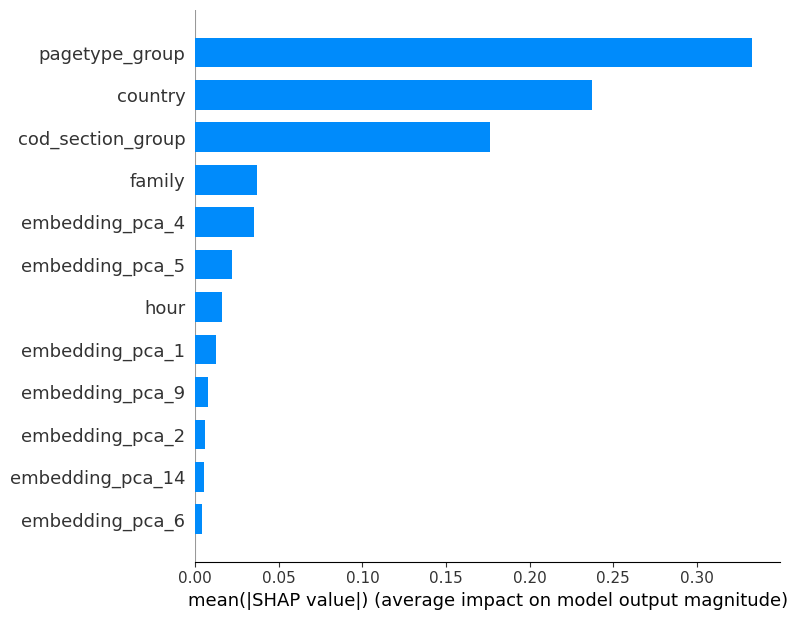

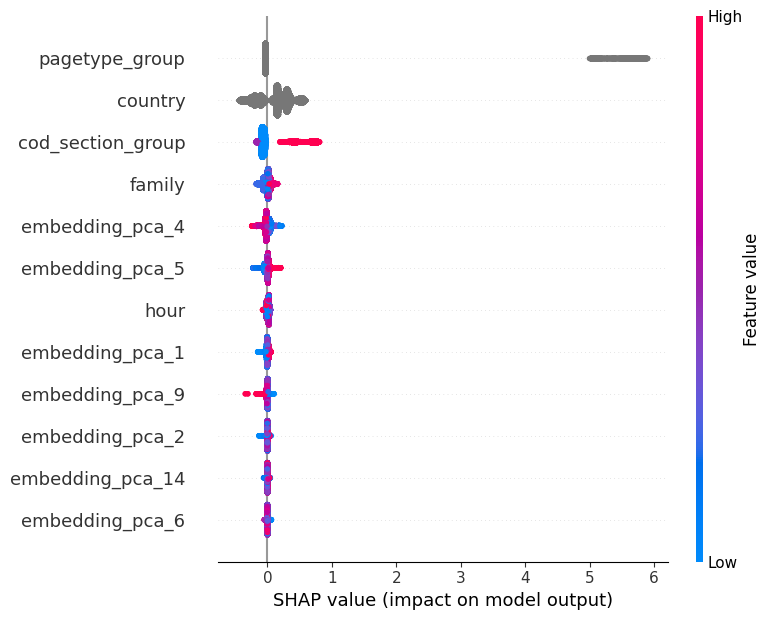

In [2]:
import shap
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Cargar el modelo
model_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_model_lambdarank_features.txt"
model = lgb.Booster(model_file=model_path)

# 📌 Cargar dataset de test
test_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet"
test = pd.read_parquet(test_path)

# 📌 Seleccionar las mismas features usadas en entrenamiento
features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]
X_test = test[features]

# 📌 Calcular valores SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# 📌 Graficar resumen de SHAP
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")  # Importancia de las features
plt.show()

# 📌 Graficar la distribución de impacto de las variables
shap.summary_plot(shap_values, X_test)

# Modelo All Features para comparar - 237/900


In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 📌 Cargar dataset
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Guardar `session_id`
session_ids = train["session_id"]

# 📌 Definir todas las features excepto la variable objetivo y session_id
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    train[features], train["add_to_cart"], session_ids, test_size=0.2, random_state=42
)

# 📌 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Crear datasets de LightGBM con `group` (query groups)
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train)

# 📌 Definir parámetros optimizados del modelo
params = {
    "objective": "lambdarank",
    "boosting_type": "gbdt",
    "metric": "ndcg",
    "learning_rate": 0.01,
    "num_leaves": 127,
    "max_depth": 10,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 1.0,
    "lambda_l2": 1.0
}

# 🚀 Entrenar el modelo con early stopping
callbacks = [lgb.early_stopping(stopping_rounds=10, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=400, callbacks=callbacks)

# 📊 Evaluación inicial
y_pred_val = model.predict(X_val)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"\n🔍 AUC en validación: {auc_score:.5f}")

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_all_features.txt')
print("\n📥 Modelo guardado")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[50]	valid_0's ndcg@1: 0.924474	valid_0's ndcg@2: 0.937092	valid_0's ndcg@3: 0.944464	valid_0's ndcg@4: 0.948816	valid_0's ndcg@5: 0.951544
Evaluated only: ndcg@1

🔍 AUC en validación: 0.68918

📥 Modelo guardado


In [2]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCG
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7320
MAP@5: 0.6597
MRR: 0.6819
Hit Rate @5: 0.8974


In [ ]:
# predictions_3_all_features.json
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_all_features.txt')

# 📌 Cargar datasets
# train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión sin `DeprecationWarning`
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_all_features.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


### SHAP

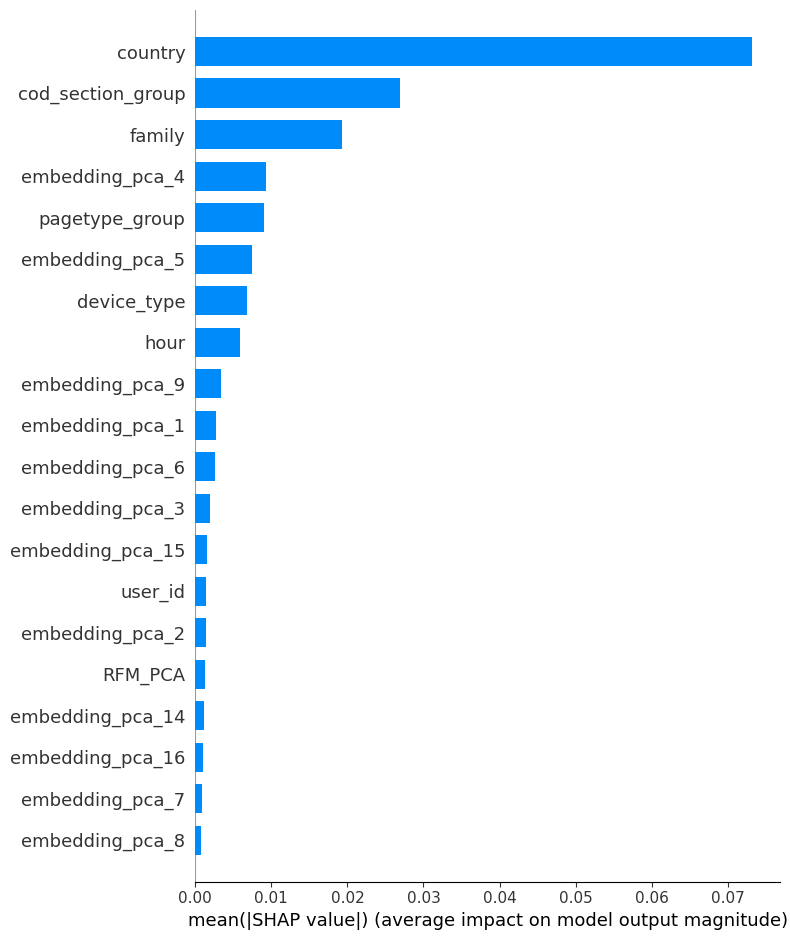

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

# Suponiendo que ya has entrenado tu modelo y tienes `model`, `X_val`, `features`

# Asegurarse de que X_sample solo contenga las características utilizadas en el entrenamiento
X_sample = X_val[features].copy()

# Crear el explainer para el modelo de LightGBM
explainer = shap.TreeExplainer(model)

# Calcular los valores SHAP para nuestra muestra
shap_values = explainer.shap_values(X_sample)

# 📊 Gráficos resumen de importancia de características

## Gráfico de barras de importancia
shap.summary_plot(shap_values, X_sample, plot_type="bar")

## Gráfico de dispersión detallado
shap.summary_plot(shap_values, X_sample)

# 🔄 Generar gráficos de dependencia para todas las características

# Opción 1: Para todas las características
for feature in features:
    shap.dependence_plot(feature, shap_values, X_sample)
    plt.show()

# Opción 2: Para las N características más importantes
# importances = np.abs(shap_values).mean(axis=0)
# importance_df = pd.DataFrame({'feature': features, 'importance': importances})
# importance_df = importance_df.sort_values('importance', ascending=False)

# top_n = 10  # Número de características que deseas analizar
# top_features = importance_df['feature'].head(top_n)

# for feature in top_features:
#     shap.dependence_plot(feature, shap_values, X_sample)
#     plt.show()

# Modelo All Features - Optimizaciones

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23275722 entries, 4175485 to 7256438
Data columns (total 32 columns):
 #   Column             Dtype   
---  ------             -----   
 0   session_id         int32   
 1   add_to_cart        int8    
 2   user_id            int32   
 3   country            category
 4   partnumber         int64   
 5   device_type        int8    
 6   pagetype_group     category
 7   cod_section_group  int8    
 8   RFM_PCA            float32 
 9   hour               int8    
 10  color_id           int16   
 11  family             int16   
 12  embedding_pca_1    float32 
 13  embedding_pca_2    float32 
 14  embedding_pca_3    float32 
 15  embedding_pca_4    float32 
 16  embedding_pca_5    float32 
 17  embedding_pca_6    float32 
 18  embedding_pca_7    float32 
 19  embedding_pca_8    float32 
 20  embedding_pca_9    float32 
 21  embedding_pca_10   float32 
 22  embedding_pca_11   float32 
 23  embedding_pca_12   float32 
 24  embedding_pca_13   flo

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   session_id         29275 non-null  int32   
 1   user_id            29275 non-null  int32   
 2   country            29275 non-null  category
 3   partnumber         29275 non-null  int64   
 4   device_type        29275 non-null  int8    
 5   pagetype_group     29275 non-null  category
 6   cod_section_group  29275 non-null  int8    
 7   RFM_PCA            29275 non-null  float32 
 8   color_id           29275 non-null  int16   
 9   family             29275 non-null  int16   
 10  embedding_pca_1    29275 non-null  float32 
 11  embedding_pca_2    29275 non-null  float32 
 12  embedding_pca_3    29275 non-null  float32 
 13  embedding_pca_4    29275 non-null  float32 
 14  embedding_pca_5    29275 non-null  float32 
 15  embedding_pca_6    29275 non-null  float32 
 16  embe

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

print("Cargamos train...")
# 📌 Cargar dataset
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Convertir variables categóricas codificadas como enteros a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    train[col] = train[col].astype('category')

# 📌 Definir todas las features excepto la variable objetivo y session_id
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]
target = "add_to_cart"

# 📌 Guardar `session_id`
session_ids = train["session_id"]

print("train_test_split...")
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    train[features], train[target], session_ids, test_size=0.2, random_state=42
)

# 📌 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Actualizar X_train y X_val después de convertir las variables categóricas
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

print("Crear datasets de LightGBM...")

# 📌 Definir las características categóricas
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# 📌 Crear datasets de LightGBM con `group` (query groups) y características categóricas
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, categorical_feature=categorical_features)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, categorical_feature=categorical_features)

# 📌 Definir parámetros optimizados del modelo
params = {
    "objective": "lambdarank",
    "boosting_type": "gbdt",
    "metric": ["ndcg", "map"],
    "learning_rate": 0.01,
    "min_data_in_leaf": 100,
    "num_leaves": 63,
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 5.0,
    "lambda_l2": 5.0,
    "lambdarank_norm": True,
    "label_gain": [0,20],
    "eval_at": [5], 
    "num_threads" : 0,
    # "is_unbalance": True,  # Eliminado
}

print("Entrenamiento del modelo...\n")

# 🚀 Entrenar el modelo con early stopping
callbacks = [lgb.early_stopping(stopping_rounds=30, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=2000, callbacks=callbacks)

# 📊 Evaluación inicial
y_pred_val = model.predict(X_val)


# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_all_features_opt_lamdarank.txt')
print("\n📥 Modelo guardado")

In [3]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCGa
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7477
MAP@5: 0.6764
MRR: 0.7002
Hit Rate @5: 0.9086


In [ ]:
# predictions_3_all_features.json
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_all_features.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Aplicar respaldo inteligente
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    # 1️⃣ Eliminar duplicados manteniendo el orden
    seen = set()
    unique_products = []
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)

    # 2️⃣ Aplicar respaldo si faltan productos
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 Caso 1: No logueado sin datos previos
            backup_products = [p for p in top_products if p not in unique_products]

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Caso 3: Logueado con pocos datos
                backup_products = [p for p in top_products if p not in unique_products]
            else:
                # 🔴 Caso 4: Logueado con datos suficientes
                backup_products = [p for p in user_products if p not in unique_products]

        else:
            # 🟡 Caso 2: No logueado pero con datos en la sesión
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ Asegurar que haya exactamente 5 recomendaciones únicas
        for p in backup_products:
            if p not in unique_products:
                unique_products.append(p)
            if len(unique_products) == 5:
                break

        # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
        while len(unique_products) < 5:
            for p in top_products:
                if p not in unique_products:
                    unique_products.append(p)
                    if len(unique_products) == 5:
                        break

    final_recommendations[str(session_id)] = unique_products[:5]  # Convertir claves a str

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_all_features.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)


In [15]:
# predictions_3_model_only.json -->> SOLO USAMOS LAS RECOMENDACIONES DEL MODELO PARA CREAR EL JSON
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_all_features_opt_lamdarank.txt')

# 📌 Cargar datasets
# train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión (sin respaldo)
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_model_only.json"
with open(output_path, "w") as f:
    json.dump({"target": session_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_model_only.json


/tmp/ipykernel_409955/3997515381.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


# Modelo Lambdarank - Respaldo con productos similares

In [10]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score

print("Cargando datos...")

# 📌 Cargar dataset
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet').sample(frac=0.30, random_state=42)

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    train[col] = train[col].astype('category')

# 📌 Definir características y etiqueta
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]
target = "add_to_cart"

print("Preparando folds de validación...")

# 📌 Usar GroupKFold para evitar fuga entre sesiones
group_kfold = GroupKFold(n_splits=5)
folds = list(group_kfold.split(train[features], train[target], groups=train["session_id"]))

# 📌 Definir las características categóricas
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# 📌 Calcular scale_pos_weight para manejar desbalanceo de clases
neg_count = train[target].value_counts()[0]
pos_count = train[target].value_counts()[1]
scale_pos_weight = neg_count / pos_count

# 📌 Definir parámetros del modelo
params = {
    "objective": "lambdarank",
    "boosting_type": "gbdt",
    "metric": ["ndcg", "map"],
    "learning_rate": 0.015,
    "min_data_in_leaf": 100,
    "num_leaves": 127,
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 5.0,
    "lambda_l2": 15.0,
    "lambdarank_norm": True,
    "label_gain": [0, 20],
    "eval_at": [5],
    "num_threads": 0,
    "scale_pos_weight": scale_pos_weight,  # Manejar desbalanceo
}

print("Entrenando el modelo con validación cruzada...\n")

# 🚀 Entrenar usando GroupKFold
models = []
for fold, (train_idx, val_idx) in enumerate(folds):
    print(f"Fold {fold + 1}/{len(folds)}")
    X_train = train.iloc[train_idx][features]
    y_train = train.iloc[train_idx][target]
    session_train = train.iloc[train_idx]["session_id"]
    X_val = train.iloc[val_idx][features]
    y_val = train.iloc[val_idx][target]
    session_val = train.iloc[val_idx]["session_id"]

    # 📌 Calcular `query` correctamente
    query_train = session_train.value_counts().sort_index().tolist()
    query_val = session_val.value_counts().sort_index().tolist()

    # 📌 Crear datasets de LightGBM con `group` y características categóricas
    lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, categorical_feature=categorical_features, free_raw_data=False)
    lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, categorical_feature=categorical_features, free_raw_data=False)

    # 🚀 Entrenar el modelo con early stopping
    callbacks = [lgb.early_stopping(stopping_rounds=30, first_metric_only=True, verbose=True)]
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=2000, callbacks=callbacks)
    models.append(model)
    
    print("\n")

# 📥 Guardar el último modelo entrenado
models[-1].save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar.txt')
print("\n📥 Modelo guardado")

Cargando datos...
Preparando folds de validación...
Entrenando el modelo con validación cruzada...

Fold 1/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	valid_0's ndcg@5: 0.934802	valid_0's map@5: 0.922002
Evaluated only: ndcg@5


Fold 2/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	valid_0's ndcg@5: 0.934692	valid_0's map@5: 0.921682
Evaluated only: ndcg@5


Fold 3/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	valid_0's ndcg@5: 0.934174	valid_0's map@5: 0.921153
Evaluated only: ndcg@5


Fold 4/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[932]	valid_0's ndcg@5: 0.935432	valid_0's map@5: 0.92263
Evaluated only: ndcg@5


Fold 5/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[46]	valid_0's ndcg@5: 0.933824	valid_0'

In [11]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCGa
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.6992
MAP@5: 0.6275
MRR: 0.6455
Hit Rate @5: 0.8667


In [12]:
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from sklearn.neighbors import NearestNeighbors
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Preparando embeddings y modelo de vecinos más cercanos...")

# 📌 Preparar los embeddings
embedding_cols = [f'embedding_pca_{i}' for i in range(1, 21)]
item_embeddings = train.drop_duplicates('partnumber')[['partnumber'] + embedding_cols].set_index('partnumber')

# 📌 Entrenar el modelo de NearestNeighbors
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(item_embeddings.values)

# 📌 Función para obtener artículos similares
def get_similar_items(item_id, n_neighbors=10):
    if item_id not in item_embeddings.index:
        return []
    item_vector = item_embeddings.loc[item_id].values.reshape(1, -1)
    distances, indices = nn_model.kneighbors(item_vector, n_neighbors=n_neighbors)
    similar_items = item_embeddings.iloc[indices[0]].index.tolist()
    return similar_items[1:]  # Excluir el propio item

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales...")

# 📌 Generar recomendaciones finales asegurando 5 artículos únicos por sesión
final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares
    if len(unique_items) < 5:
        for item in items:
            similar_items = get_similar_items(item)
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

Cargando modelo y datos...
Realizando predicciones...


/tmp/ipykernel_1466489/1971479925.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


Preparando embeddings y modelo de vecinos más cercanos...
Calculando artículos populares...
Generando recomendaciones finales...
Guardando recomendaciones en JSON...

✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup.json


In [6]:
validate_predictions(output_path)


🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# Modelo Lambdarank - Respaldo con productos similares v2


In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score

print("Cargando datos...")

# 📌 Cargar dataset y tomar una muestra del 30%
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet').sample(frac=0.50, random_state=42)

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    train[col] = train[col].astype('category')

# 📌 Definir características y etiqueta
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]
target = "add_to_cart"

print("Preparando folds de validación...")

# 📌 Usar GroupKFold para evitar fuga entre sesiones
group_kfold = GroupKFold(n_splits=5)
folds = list(group_kfold.split(train[features], train[target], groups=train["session_id"]))

# 📌 Definir las características categóricas
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# 📌 Calcular scale_pos_weight para manejar desbalanceo de clases
neg_count = train[target].value_counts()[0]
pos_count = train[target].value_counts()[1]
scale_pos_weight = neg_count / pos_count

# 📌 Definir parámetros del modelo con mayor regularización
params = {
    "objective": "lambdarank",
    "boosting_type": "gbdt",
    "metric": ["ndcg", "map"],
    "learning_rate": 0.015,
    "min_data_in_leaf": 100,
    "num_leaves": 127,
    "max_depth": 7,
    "verbosity": -1,
    # "feature_fraction": 0.8,
    # "bagging_fraction": 0.9,
    # "bagging_freq": 5,
    "lambda_l1": 20.0,    # Incrementado de 5.0 a 20.0
    "lambda_l2": 50.0,    # Incrementado de 15.0 a 50.0
    "lambdarank_norm": True,
    "label_gain": [0, 1],
    "eval_at": [5],
    "num_threads": 0,
    "scale_pos_weight": scale_pos_weight,  # Manejar desbalanceo
}

print("Entrenando el modelo con validación cruzada...\n")

# 🚀 Entrenar usando GroupKFold
models = []
for fold, (train_idx, val_idx) in enumerate(folds):
    print(f"Fold {fold + 1}/{len(folds)}")
    X_train = train.iloc[train_idx][features]
    y_train = train.iloc[train_idx][target]
    session_train = train.iloc[train_idx]["session_id"]
    X_val = train.iloc[val_idx][features]
    y_val = train.iloc[val_idx][target]
    session_val = train.iloc[val_idx]["session_id"]

    # 📌 Calcular `query` correctamente
    query_train = session_train.value_counts().sort_index().tolist()
    query_val = session_val.value_counts().sort_index().tolist()

    # 📌 Crear datasets de LightGBM con `group` y características categóricas
    lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, categorical_feature=categorical_features, free_raw_data=False)
    lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, categorical_feature=categorical_features, free_raw_data=False)

    # 🚀 Entrenar el modelo con early stopping
    callbacks = [lgb.early_stopping(stopping_rounds=30, first_metric_only=True, verbose=True)]
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=2000, callbacks=callbacks)
    models.append(model)
    
    print("\n")

# 📥 Guardar el último modelo entrenado
models[-1].save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')
print("📥 Modelo guardado")

Cargando datos...
Preparando folds de validación...
Entrenando el modelo con validación cruzada...

Fold 1/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1266]	valid_0's ndcg@5: 0.907625	valid_0's map@5: 0.891042
Evaluated only: ndcg@5


Fold 2/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1258]	valid_0's ndcg@5: 0.907465	valid_0's map@5: 0.890861
Evaluated only: ndcg@5


Fold 3/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1598]	valid_0's ndcg@5: 0.907572	valid_0's map@5: 0.890944
Evaluated only: ndcg@5


Fold 4/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	valid_0's ndcg@5: 0.907638	valid_0's map@5: 0.891065
Evaluated only: ndcg@5


Fold 5/5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1367]	valid_0's ndcg@5: 0.907569	va

In [2]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCGa
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.6797
MAP@5: 0.6117
MRR: 0.6250
Hit Rate @5: 0.8405


In [ ]:
# predictions_with_embeddings_backup_v2_cosine
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from sklearn.neighbors import NearestNeighbors
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Preparando embeddings y modelo de vecinos más cercanos...")

# 📌 Preparar los embeddings y añadir las categorías
embedding_cols = [f'embedding_pca_{i}' for i in range(1, 21)]
item_features = train.drop_duplicates('partnumber')[['partnumber', 'family'] + embedding_cols].set_index('partnumber')

# 📌 Entrenar modelos de NearestNeighbors con diferentes métricas
distance_metrics = ['euclidean', 'manhattan', 'cosine']
n_neighbors = 15  # Podemos ajustar este valor según sea necesario

nn_models = {}
for metric in distance_metrics:
    nn_model = NearestNeighbors(metric=metric, algorithm='brute')
    nn_model.fit(item_features[embedding_cols].values)
    nn_models[metric] = nn_model

# 📌 Función para obtener artículos similares con filtros
def get_similar_items(item_id, n_neighbors=15, metric='cosine'):
    if item_id not in item_features.index:
        return []
    item_vector = item_features.loc[item_id, embedding_cols].values.reshape(1, -1)
    item_family = item_features.loc[item_id, 'family']  # Obtener la categoría 'family' del item
    nn_model = nn_models[metric]
    distances, indices = nn_model.kneighbors(item_vector, n_neighbors=n_neighbors)
    similar_items = item_features.iloc[indices[0]].index.tolist()
    # Excluir el propio item
    similar_items = [item for item in similar_items if item != item_id]
    # Filtrar por la misma 'family'
    similar_items_filtered = [item for item in similar_items if item_features.loc[item, 'family'] == item_family]
    return similar_items_filtered

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales...")

# 📌 Elegir métrica de distancia y número de vecinos
chosen_metric = 'cosine'  # Puedes cambiar a 'euclidean' o 'manhattan' para probar
n_neighbors = 15          # Puedes ajustar este valor

# 📌 Generar recomendaciones finales asegurando 5 artículos únicos por sesión
final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con filtros
    if len(unique_items) < 5:
        for item in items:
            similar_items = get_similar_items(item, n_neighbors=n_neighbors, metric=chosen_metric)
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v2_cosine.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

validate_predictions(output_path)

In [ ]:
# predictions_with_embeddings_backup_v2_euclidean
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from sklearn.neighbors import NearestNeighbors
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Preparando embeddings y modelo de vecinos más cercanos...")

# 📌 Preparar los embeddings y añadir las categorías
embedding_cols = [f'embedding_pca_{i}' for i in range(1, 21)]
item_features = train.drop_duplicates('partnumber')[['partnumber', 'family'] + embedding_cols].set_index('partnumber')

# 📌 Entrenar modelos de NearestNeighbors con diferentes métricas
distance_metrics = ['euclidean', 'manhattan', 'cosine']
n_neighbors = 20  # Podemos ajustar este valor según sea necesario

nn_models = {}
for metric in distance_metrics:
    nn_model = NearestNeighbors(metric=metric, algorithm='brute')
    nn_model.fit(item_features[embedding_cols].values)
    nn_models[metric] = nn_model

# 📌 Función para obtener artículos similares con filtros
def get_similar_items(item_id, n_neighbors=15, metric='cosine'):
    if item_id not in item_features.index:
        return []
    item_vector = item_features.loc[item_id, embedding_cols].values.reshape(1, -1)
    item_family = item_features.loc[item_id, 'country']  # Obtener la categoría 'family' del item
    nn_model = nn_models[metric]
    distances, indices = nn_model.kneighbors(item_vector, n_neighbors=n_neighbors)
    similar_items = item_features.iloc[indices[0]].index.tolist()
    # Excluir el propio item
    similar_items = [item for item in similar_items if item != item_id]
    # Filtrar por la misma 'family'
    similar_items_filtered = [item for item in similar_items if item_features.loc[item, 'country'] == item_family]
    return similar_items_filtered

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales...")

# 📌 Elegir métrica de distancia y número de vecinos
chosen_metric = 'euclidean'  # Puedes cambiar a 'euclidean' o 'manhattan' para probar
n_neighbors = 20          # Puedes ajustar este valor

# 📌 Generar recomendaciones finales asegurando 5 artículos únicos por sesión
final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con filtros
    if len(unique_items) < 5:
        for item in items:
            similar_items = get_similar_items(item, n_neighbors=n_neighbors, metric=chosen_metric)
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v2_euclidean.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

validate_predictions(output_path)

In [7]:
# predictions_with_embeddings_backup_v2_manhattan
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from sklearn.neighbors import NearestNeighbors
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Preparando embeddings y modelo de vecinos más cercanos...")

# 📌 Preparar los embeddings y añadir las categorías
embedding_cols = [f'embedding_pca_{i}' for i in range(1, 21)]
item_features = train.drop_duplicates('partnumber')[['partnumber', 'family'] + embedding_cols].set_index('partnumber')

# 📌 Entrenar modelos de NearestNeighbors con diferentes métricas
distance_metrics = ['euclidean', 'manhattan', 'cosine']
n_neighbors = 15  # Podemos ajustar este valor según sea necesario

nn_models = {}
for metric in distance_metrics:
    nn_model = NearestNeighbors(metric=metric, algorithm='brute')
    nn_model.fit(item_features[embedding_cols].values)
    nn_models[metric] = nn_model

# 📌 Función para obtener artículos similares con filtros
def get_similar_items(item_id, n_neighbors=15, metric='cosine'):
    if item_id not in item_features.index:
        return []
    item_vector = item_features.loc[item_id, embedding_cols].values.reshape(1, -1)
    item_family = item_features.loc[item_id, 'family']  # Obtener la categoría 'family' del item
    nn_model = nn_models[metric]
    distances, indices = nn_model.kneighbors(item_vector, n_neighbors=n_neighbors)
    similar_items = item_features.iloc[indices[0]].index.tolist()
    # Excluir el propio item
    similar_items = [item for item in similar_items if item != item_id]
    # Filtrar por la misma 'family'
    similar_items_filtered = [item for item in similar_items if item_features.loc[item, 'family'] == item_family]
    return similar_items_filtered

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales...")

# 📌 Elegir métrica de distancia y número de vecinos
chosen_metric = 'manhattan'  # Puedes cambiar a 'euclidean' o 'manhattan' para probar
n_neighbors = 15          # Puedes ajustar este valor

# 📌 Generar recomendaciones finales asegurando 5 artículos únicos por sesión
final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con filtros
    if len(unique_items) < 5:
        for item in items:
            similar_items = get_similar_items(item, n_neighbors=n_neighbors, metric=chosen_metric)
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v2_manhattan.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

validate_predictions(output_path)

Cargando modelo y datos...
Realizando predicciones...


/tmp/ipykernel_1502475/1034058949.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


Preparando embeddings y modelo de vecinos más cercanos...
Calculando artículos populares...
Generando recomendaciones finales...
Guardando recomendaciones en JSON...

✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v2_manhattan.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# ----------------------------------------------------------------------------------------------

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, average_precision_score

print("Cargando datos...")

# 📌 Cargar dataset y tomar una muestra del 50% (ajusta el tamaño según tus recursos)
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet').sample(frac=0.50, random_state=42)

# 📌 Submuestreo de la clase mayoritaria para manejar el desbalanceo
neg_samples = train[train[target] == 0].sample(frac=0.1, random_state=42)  # Muestrear solo el 10% de la clase 0
pos_samples = train[train[target] == 1]
train = pd.concat([neg_samples, pos_samples]).sample(frac=1, random_state=42)  # Mezclar

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    train[col] = train[col].astype('category')

# 📌 Definir características y etiqueta
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]
target = "add_to_cart"

print("Preparando folds de validación...")

# 📌 Usar GroupKFold para evitar fuga entre sesiones
group_kfold = GroupKFold(n_splits=5)
folds = list(group_kfold.split(train[features], train[target], groups=train["session_id"]))

# 📌 Definir las características categóricas
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# 📌 Calcular scale_pos_weight para manejar desbalanceo de clases
neg_count = train[target].value_counts()[0]
pos_count = train[target].value_counts()[1]
scale_pos_weight = neg_count / pos_count

# 📌 Definir parámetros del modelo ajustados
params = {
    "objective": "xentropy",
    "boosting_type": "gbdt",
    "metric": ["auc", "average_precision"],
    "learning_rate": 0.005,  # Tasa de aprendizaje más baja
    "min_data_in_leaf": 100,  # Menor regularización
    "num_leaves": 127,  # Más hojas para mayor complejidad
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 10.0,  # Regularización L1 reducida
    "lambda_l2": 20.0,  # Regularización L2 reducida
    "scale_pos_weight": scale_pos_weight,
    "num_threads": 0,
}

print("Entrenando el modelo con validación cruzada...\n")

# 🚀 Entrenar usando GroupKFold
models = []
auc_scores = []
ap_scores = []

for fold, (train_idx, val_idx) in enumerate(folds):
    print(f"Fold {fold + 1}/{len(folds)}")
    X_train = train.iloc[train_idx][features]
    y_train = train.iloc[train_idx][target]
    session_train = train.iloc[train_idx]["session_id"]
    X_val = train.iloc[val_idx][features]
    y_val = train.iloc[val_idx][target]
    session_val = train.iloc[val_idx]["session_id"]

    # 📌 Crear datasets de LightGBM
    lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train, categorical_feature=categorical_features, free_raw_data=False)

    # 🚀 Entrenar el modelo con early stopping
    callbacks = [
        lgb.early_stopping(stopping_rounds=100, first_metric_only=True, verbose=True),  # Más paciencia
        lgb.log_evaluation(period=50)
    ]
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=5000, callbacks=callbacks)  # Más iteraciones
    models.append(model)
    
    # 📌 Evaluar el modelo en el conjunto de validación
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    ap = average_precision_score(y_val, y_pred)
    auc_scores.append(auc)
    ap_scores.append(ap)
    
    print(f"Fold {fold + 1} - ROC AUC: {auc:.4f}, Average Precision: {ap:.4f}\n")

# 📌 Calcular métricas promedio en validación
mean_auc = np.mean(auc_scores)
mean_ap = np.mean(ap_scores)
print(f"ROC AUC Promedio: {mean_auc:.4f}")
print(f"Average Precision Promedio: {mean_ap:.4f}")

# 📥 Guardar el mejor modelo basado en el rendimiento en validación
best_model_idx = np.argmax(auc_scores)
best_model = models[best_model_idx]
best_model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_xentropy_best_model.txt')
print("📥 Mejor modelo guardado")

# Modelo xentropy - xentropy 50% - submuestreo de la clase mayoritaria


In [4]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, average_precision_score

print("Cargando datos...")

# 📌 Definir la variable target
target = "add_to_cart"

# 📌 Cargar dataset y tomar una muestra del 50% (ajusta el tamaño según tus recursos)
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet').sample(frac=0.50, random_state=42)

# 📌 Submuestreo de la clase mayoritaria para manejar el desbalanceo
neg_samples = train[train[target] == 0].sample(frac=0.1, random_state=42)  # Muestrear solo el 10% de la clase 0
pos_samples = train[train[target] == 1]
train = pd.concat([neg_samples, pos_samples]).sample(frac=1, random_state=42)  # Mezclar

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    train[col] = train[col].astype('category')

# 📌 Definir características
features = [col for col in train.columns if col not in ["session_id", target]]

print("Preparando folds de validación...")

# 📌 Usar GroupKFold para evitar fuga entre sesiones
group_kfold = GroupKFold(n_splits=5)
folds = list(group_kfold.split(train[features], train[target], groups=train["session_id"]))

# 📌 Definir las características categóricas
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# 📌 Calcular scale_pos_weight para manejar desbalanceo de clases
neg_count = train[target].value_counts()[0]
pos_count = train[target].value_counts()[1]
scale_pos_weight = neg_count / pos_count

# 📌 Definir parámetros del modelo ajustados
params = {
    "objective": "xentropy",
    "boosting_type": "gbdt",
    "metric": ["auc", "average_precision"],
    "learning_rate": 0.001,  # Tasa de aprendizaje más baja
    "min_data_in_leaf": 50,  # Menor regularización
    "num_leaves": 255,  # Más hojas para mayor complejidad
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 5.0,  # Regularización L1 reducida
    "lambda_l2": 10.0,  # Regularización L2 reducida
    "scale_pos_weight": scale_pos_weight,
    "num_threads": 0,
}

print("Entrenando el modelo con validación cruzada...\n")

# 🚀 Entrenar usando GroupKFold
models = []
auc_scores = []
ap_scores = []

for fold, (train_idx, val_idx) in enumerate(folds):
    print(f"Fold {fold + 1}/{len(folds)}")
    X_train = train.iloc[train_idx][features]
    y_train = train.iloc[train_idx][target]
    session_train = train.iloc[train_idx]["session_id"]
    X_val = train.iloc[val_idx][features]
    y_val = train.iloc[val_idx][target]
    session_val = train.iloc[val_idx]["session_id"]

    # 📌 Crear datasets de LightGBM
    lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train, categorical_feature=categorical_features, free_raw_data=False)

    # 🚀 Entrenar el modelo con early stopping
    callbacks = [
        lgb.early_stopping(stopping_rounds=200, first_metric_only=True, verbose=True),  # Más paciencia
        lgb.log_evaluation(period=50)
    ]
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=5000, callbacks=callbacks)  # Más iteraciones
    models.append(model)
    
    # 📌 Evaluar el modelo en el conjunto de validación
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    ap = average_precision_score(y_val, y_pred)
    auc_scores.append(auc)
    ap_scores.append(ap)
    
    print(f"Fold {fold + 1} - ROC AUC: {auc:.4f}, Average Precision: {ap:.4f}\n")

# 📌 Calcular métricas promedio en validación
mean_auc = np.mean(auc_scores)
mean_ap = np.mean(ap_scores)
print(f"ROC AUC Promedio: {mean_auc:.4f}")
print(f"Average Precision Promedio: {mean_ap:.4f}")

# 📥 Guardar el mejor modelo basado en el rendimiento en validación
best_model_idx = np.argmax(auc_scores)
best_model = models[best_model_idx]
best_model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_xentropy_best_model_v2.txt')
print("📥 Mejor modelo guardado")

Cargando datos...
Preparando folds de validación...
Entrenando el modelo con validación cruzada...

Fold 1/5
Training until validation scores don't improve for 200 rounds
[50]	valid_0's auc: 0.683308	valid_0's average_precision: 0.619263
[100]	valid_0's auc: 0.683384	valid_0's average_precision: 0.619356
[150]	valid_0's auc: 0.683601	valid_0's average_precision: 0.619627
[200]	valid_0's auc: 0.683759	valid_0's average_precision: 0.619782
[250]	valid_0's auc: 0.683808	valid_0's average_precision: 0.619833
[300]	valid_0's auc: 0.683894	valid_0's average_precision: 0.619929
[350]	valid_0's auc: 0.684057	valid_0's average_precision: 0.620076
[400]	valid_0's auc: 0.684164	valid_0's average_precision: 0.620192
[450]	valid_0's auc: 0.684286	valid_0's average_precision: 0.620306
[500]	valid_0's auc: 0.684374	valid_0's average_precision: 0.620405
[550]	valid_0's auc: 0.684483	valid_0's average_precision: 0.620521
[600]	valid_0's auc: 0.684535	valid_0's average_precision: 0.620593
[650]	valid_0'

In [5]:
# predictions_with_embeddings_backup_v3_Item2Vec --
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from gensim.models import Word2Vec
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_xentropy_best_model_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Entrenando modelo Item2Vec...")

# 📌 Obtener secuencias de productos por sesión en el conjunto de entrenamiento
train_sessions = train.groupby('session_id')['partnumber'].apply(list)

# Convertir los IDs de productos a strings (Word2Vec requiere strings)
train_sessions = train_sessions.apply(lambda x: [str(item) for item in x])

# Lista de secuencias para entrenar el modelo
sentences = train_sessions.tolist()

# 📌 Entrenar el modelo Word2Vec
model_i2v = Word2Vec(
    sentences,
    vector_size=128,        # Ajuste de vector_size
    window=10,              # Ajuste de window
    min_count=2,            # Ajuste de min_count
    workers=4,
    sg=1,                   # Uso de Skip-Gram // 0 CBOW 
    negative=20,            # Muestreo negativo +
    epochs=20,              # Aumento de épocas +
    sample=1e-5,            # +     
    min_alpha=0.0001,      # Tasa de aprendizaje mínima       
)

# Objeto para obtener los embeddings de productos
product_embeddings = model_i2v.wv

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales usando Item2Vec...")

# Número de productos similares a obtener
top_n_similar = 10

final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con Item2Vec
    if len(unique_items) < 5:
        for item in items:
            similar_items = []
            try:
                # Obtener similares con Item2Vec
                similar_items = product_embeddings.most_similar(str(item), topn=top_n_similar)
                # Convertir los IDs de productos a enteros
                similar_items = [int(sim_item[0]) for sim_item in similar_items]
            except KeyError:
                # Si el producto no está en el vocabulario
                continue
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_xentropy_Item2Vec.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

Cargando modelo y datos...
Realizando predicciones...


/tmp/ipykernel_1431/1733981466.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


Entrenando modelo Item2Vec...
Calculando artículos populares...
Generando recomendaciones finales usando Item2Vec...
Guardando recomendaciones en JSON...

✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_xentropy_Item2Vec.json


# Item2Vec para Encontrar Artículos Similares


In [ ]:
# predictions_with_embeddings_backup_v2_Item2Vec
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from gensim.models import Word2Vec
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Entrenando modelo Item2Vec...")

# 📌 Obtener secuencias de productos por sesión en el conjunto de entrenamiento
train_sessions = train.groupby('session_id')['partnumber'].apply(list)

# Convertir los IDs de productos a strings (Word2Vec requiere strings)
train_sessions = train_sessions.apply(lambda x: [str(item) for item in x])

# Lista de secuencias para entrenar el modelo
sentences = train_sessions.tolist()

# 📌 Entrenar el modelo Word2Vec
model_i2v = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

# Objeto para obtener los embeddings de productos
product_embeddings = model_i2v.wv

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales usando Item2Vec...")

# Número de productos similares a obtener
top_n_similar = 10

final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con Item2Vec
    if len(unique_items) < 5:
        for item in items:
            similar_items = []
            try:
                # Obtener similares con Item2Vec
                similar_items = product_embeddings.most_similar(str(item), topn=top_n_similar)
                # Convertir los IDs de productos a enteros
                similar_items = [int(sim_item[0]) for sim_item in similar_items]
            except KeyError:
                # Si el producto no está en el vocabulario
                continue
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v2_Item2Vec.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

In [3]:
# predictions_with_embeddings_backup_v3_Item2Vec -- epochs=40 -- 253/900
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from gensim.models import Word2Vec
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Entrenando modelo Item2Vec...")

# 📌 Obtener secuencias de productos por sesión en el conjunto de entrenamiento
train_sessions = train.groupby('session_id')['partnumber'].apply(list)

# Convertir los IDs de productos a strings (Word2Vec requiere strings)
train_sessions = train_sessions.apply(lambda x: [str(item) for item in x])

# Lista de secuencias para entrenar el modelo
sentences = train_sessions.tolist()

# 📌 Entrenar el modelo Word2Vec

model_i2v = Word2Vec(
    sentences,
    vector_size=110,        # Ajuste de vector_size
    window=8,              # Ajuste de window
    min_count=2,            # Ajuste de min_count
    workers=8,
    sg=0,                   # Uso de Skip-Gram // 0 CBOW 
    negative=20,            # Muestreo negativo +
    epochs=60,              # Aumento de épocas +
    sample=1e-4,            # +     
    # min_alpha=0.0001,      # Tasa de aprendizaje mínima       
)

# Objeto para obtener los embeddings de productos
product_embeddings = model_i2v.wv

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales usando Item2Vec...")

# Número de productos similares a obtener
top_n_similar = 5

final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con Item2Vec
    if len(unique_items) < 5:
        for item in items:
            similar_items = []
            try:
                # Obtener similares con Item2Vec
                similar_items = product_embeddings.most_similar(str(item), topn=top_n_similar)
                # Convertir los IDs de productos a enteros
                similar_items = [int(sim_item[0]) for sim_item in similar_items]
            except KeyError:
                # Si el producto no está en el vocabulario
                continue
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_final.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

Cargando modelo y datos...
Realizando predicciones...


/tmp/ipykernel_493461/3846871638.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


Entrenando modelo Item2Vec...
Calculando artículos populares...
Generando recomendaciones finales usando Item2Vec...
Guardando recomendaciones en JSON...

✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_final.json


---

In [2]:
# predictions_with_session_embeddings
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex

print("Cargando modelo y datos...")

model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/models/lightgbm_enhanced_model_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir scores en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", as_index=False)
    .apply(lambda x: x.sort_values("score", ascending=False)[["session_id", "partnumber", "score"]])
    .reset_index(drop=True)
)

print("Entrenando modelo Word2Vec...")

# 📌 Obtener secuencias de productos por sesión en el conjunto de entrenamiento
train_sessions = train.groupby('session_id')['partnumber'].apply(list)

# Convertir los IDs de productos a strings (Word2Vec requiere strings)
train_sessions = train_sessions.apply(lambda x: [str(item) for item in x])

# Lista de secuencias para entrenar el modelo
sentences = train_sessions.tolist()

# 📌 Entrenar el modelo Word2Vec con la configuración que te dio mejor puntuación
model_i2v = Word2Vec(
    sentences,
    vector_size=150,        # Ajuste de vector_size
    window=12,              # Ajuste de window
    min_count=4,
    workers=8,              # Ajuste de workers (número de threads)
    sg=1,
    negative=20,
    epochs=30,
    sample=1e-3,
    min_alpha=0.0001,
)

# Objeto para obtener los embeddings de productos
product_embeddings = model_i2v.wv

print("Construyendo índice Annoy para búsqueda rápida de similitudes...")

# Obtener todos los IDs de productos y sus embeddings
all_product_ids = list(product_embeddings.index_to_key)
all_product_ids_int = [int(pid) for pid in all_product_ids]
embedding_size = model_i2v.vector_size

# Crear índice Annoy para búsqueda aproximada de vecinos más cercanos
index = AnnoyIndex(embedding_size, 'angular')

for i, pid in enumerate(all_product_ids_int):
    index.add_item(i, product_embeddings[str(pid)])

n_trees = 10  # Puedes ajustar este valor
index.build(n_trees)

# Mapear índices a IDs de productos
idx_to_pid = {i: pid for i, pid in enumerate(all_product_ids_int)}

print("Calculando embeddings de sesiones...")

# Obtener las sesiones y los productos vistos en test
test_session_items = test.groupby('session_id')['partnumber'].apply(list).reset_index()

# Calcular el embedding de cada sesión en test
session_embeddings = {}
for idx, row in test_session_items.iterrows():
    session_id = row['session_id']
    items = row['partnumber']
    item_embeddings = []
    for item in items:
        item_str = str(item)
        if item_str in product_embeddings:
            item_embeddings.append(product_embeddings[item_str])
    if item_embeddings:
        # Promediar los embeddings de los items en la sesión
        session_embedding = np.mean(item_embeddings, axis=0)
        session_embeddings[session_id] = session_embedding
    else:
        session_embeddings[session_id] = None  # No hay embeddings para esta sesión

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales usando embeddings de sesión y Annoy...")

final_recommendations = {}

for session_id, items_df in session_recommendations.groupby('session_id'):
    # Obtener las recomendaciones iniciales basadas en el modelo
    items = items_df['partnumber'].tolist()
    unique_items = []
    seen_items = set()
    
    for item in items:
        if item not in seen_items:
            unique_items.append(int(item))
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, usar embeddings de la sesión
    if len(unique_items) < 5:
        session_embedding = session_embeddings.get(session_id)
        if session_embedding is not None:
            # Buscar los vecinos más cercanos usando Annoy
            n_neighbors = 50  # Puedes ajustar este valor
            nearest_indices = index.get_nns_by_vector(session_embedding, n_neighbors, include_distances=False)
            for idx in nearest_indices:
                sim_item = idx_to_pid[idx]
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
        else:
            # Si no hay embedding de la sesión, saltar esta parte
            pass
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(int(item))
                seen_items.add(item)
            if len(unique_items) == 5:
                break
    
    final_recommendations[int(session_id)] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_sesion_embeddings.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

Cargando modelo y datos...
Realizando predicciones...


ValueError: train and valid dataset categorical_feature do not match.

In [3]:
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from gensim.models import Word2Vec
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Entrenando modelo Item2Vec con paralelismo...")

# 📌 Obtener secuencias de productos por sesión en el conjunto de entrenamiento
train_sessions = train.groupby('session_id')['partnumber'].apply(list)

# Convertir los IDs de productos a strings (Word2Vec requiere strings)
train_sessions = train_sessions.apply(lambda x: [str(item) for item in x])

# Lista de secuencias para entrenar el modelo
sentences = train_sessions.tolist()

# 📌 Entrenar el modelo Word2Vec con paralelismo
model_i2v = Word2Vec(
    sentences,
    vector_size=256,        # Tamaño de embedding más grande
    window=15,              # Ventana más grande para capturar relaciones más amplias
    min_count=1,            # Incluir productos con menos frecuencia
    workers=10,             # Usar 10 hilos para paralelismo (ajusta según tu CPU)
    sg=1,                   # Uso de Skip-Gram
    negative=25,            # Muestreo negativo aumentado
    epochs=30,              # Más épocas para mejorar la calidad
    sample=1e-5,            # Muestreo de palabras frecuentes
    min_alpha=0.0001,       # Tasa de aprendizaje mínima
)

# Objeto para obtener los embeddings de productos
product_embeddings = model_i2v.wv

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

# Función para obtener productos similares con filtrado por similitud
def get_similar_items(item, top_n=20, similarity_threshold=0.5):
    try:
        similar_items = product_embeddings.most_similar(str(item), topn=top_n)
        # Filtrar por similitud
        similar_items = [int(sim_item[0]) for sim_item in similar_items if sim_item[1] > similarity_threshold]
        return similar_items
    except KeyError:
        # Si el producto no está en el vocabulario
        return []

print("Generando recomendaciones finales usando Item2Vec...")

# Número de productos similares a obtener
top_n_similar = 20
similarity_threshold = 0.5  # Umbral de similitud más bajo

final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con Item2Vec
    if len(unique_items) < 5:
        for item in items:
            similar_items = get_similar_items(item, top_n=top_n_similar, similarity_threshold=similarity_threshold)
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_xentropy_Item2Vec_v3.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

Cargando modelo y datos...
Realizando predicciones...


/tmp/ipykernel_1440/2762479481.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


Entrenando modelo Item2Vec con paralelismo...
Calculando artículos populares...
Generando recomendaciones finales usando Item2Vec...
Guardando recomendaciones en JSON...

✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_xentropy_Item2Vec_v3.json


## FastText

In [3]:
# predictions_with_embeddings_backup_v2_Item2Vec_FastText
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from gensim.models import Word2Vec, FastText
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Entrenando modelo Item2Vec...")

# 📌 Obtener secuencias de productos por sesión en el conjunto de entrenamiento
train_sessions = train.groupby('session_id')['partnumber'].apply(list)

# Convertir los IDs de productos a strings (Word2Vec requiere strings)
train_sessions = train_sessions.apply(lambda x: [str(item) for item in x])

# Lista de secuencias para entrenar el modelo
sentences = train_sessions.tolist()

# 📌 Entrenar el modelo FastText
model_i2v = FastText(
    sentences,
    vector_size=256,        # Ajuste de vector_size
    window=20,              # Ajuste de window
    min_count=2,            # Ajuste de min_count
    workers=4,
    sg=1,                   # Uso de Skip-Gram // 0 CBOW 
    negative=20,            # Muestreo negativo +
    epochs=40,              # Aumento de épocas +
    sample=1e-6,            # + 
    alpha=0.01,    
    min_alpha=0.0005,      # Tasa de aprendizaje mínima       
)

# Objeto para obtener los embeddings de productos
product_embeddings = model_i2v.wv

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales usando Item2Vec...")

# Número de productos similares a obtener
top_n_similar = 10

final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares con Item2Vec
    if len(unique_items) < 5:
        for item in items:
            similar_items = []
            try:
                # Obtener similares con Item2Vec
                similar_items = product_embeddings.most_similar(str(item), topn=top_n_similar)
                # Convertir los IDs de productos a enteros
                similar_items = [int(sim_item[0]) for sim_item in similar_items]
            except KeyError:
                # Si el producto no está en el vocabulario
                continue
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v3_Item2Vec_FastText.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")


Cargando modelo y datos...
Realizando predicciones...


/tmp/ipykernel_2537/1130743606.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())


Entrenando modelo Item2Vec...
Calculando artículos populares...
Generando recomendaciones finales usando Item2Vec...
Guardando recomendaciones en JSON...

✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v3_Item2Vec_FastText.json


## Coo-matrix + 

In [ ]:
# predictions_with_embeddings_backup_v2_Item2Vec_Cooccurrence
import json
import pandas as pd
from collections import defaultdict
import lightgbm as lgb
from gensim.models import Word2Vec
import numpy as np
from scipy.sparse import coo_matrix

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Entrenando modelo Word2Vec...")

# 📌 Obtener secuencias de productos por sesión en el conjunto de entrenamiento
train_sessions = train.groupby('session_id')['partnumber'].apply(list)

# Convertir los IDs de productos a strings (Word2Vec requiere strings)
train_sessions = train_sessions.apply(lambda x: [str(item) for item in x])

# Lista de secuencias para entrenar el modelo
sentences = train_sessions.tolist()

# 📌 Entrenar el modelo Word2Vec con tus últimos hiperparámetros
model_i2v = Word2Vec(
    sentences,
    vector_size=128,
    window=10,
    min_count=2,
    workers=4,
    sg=1,
    negative=20,
    epochs=20,
    sample=1e-5,
    min_alpha=0.0001,
)

# Objeto para obtener los embeddings de productos
product_embeddings = model_i2v.wv

print("Calculando matriz de co-ocurrencia...")

# Crear mapeos de productos y sesiones a índices
product_encoder = {partnumber: idx for idx, partnumber in enumerate(train['partnumber'].unique())}
product_decoder = {idx: partnumber for partnumber, idx in product_encoder.items()}
session_encoder = {session_id: idx for idx, session_id in enumerate(train['session_id'].unique())}

train['product_idx'] = train['partnumber'].map(product_encoder)
train['session_idx'] = train['session_id'].map(session_encoder)

# Crear la matriz de interacciones (sesiones x productos)
interaction_matrix = coo_matrix(
    (np.ones(train.shape[0]), (train['session_idx'], train['product_idx'])),
    shape=(len(session_encoder), len(product_encoder))
)

# Calcular la matriz de co-ocurrencia (productos x productos)
cooc_matrix = interaction_matrix.T.dot(interaction_matrix)

# Eliminar la diagonal (auto-coocurrencia)
cooc_matrix.setdiag(0)

# Convertir a CSR para un acceso eficiente
cooc_matrix = cooc_matrix.tocsr()

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales combinando Word2Vec y co-ocurrencia...")

# Número de productos similares a obtener
top_n_similar = 10

def get_similar_items_combined(item_id, top_n=10):
    combined_scores = defaultdict(float)
    item_str = str(item_id)
    
    # Similares por Word2Vec
    try:
        similar_items_i2v = product_embeddings.most_similar(item_str, topn=top_n)
        for sim_item_str, score in similar_items_i2v:
            sim_item = int(sim_item_str)
            combined_scores[sim_item] += 0.5 * score  # Peso para Word2Vec
    except KeyError:
        pass
    
    # Similares por co-ocurrencia
    if item_id in product_encoder:
        item_idx = product_encoder[item_id]
        cooc_data = cooc_matrix[item_idx].toarray().flatten()
        cooc_indices = cooc_data.nonzero()[0]
        for idx in cooc_indices:
            sim_item = product_decoder[idx]
            score = cooc_data[idx]
            combined_scores[sim_item] += 1.0 * score  # Peso para co-ocurrencia
    else:
        pass  # El producto no está en el encoder
    
    # Ordenar los productos combinados
    sorted_items = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
    similar_items = [item for item, score in sorted_items[:top_n]]
    return similar_items

final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(int(item))
            seen_items.add(item)
        if len(unique_items) == 5:
            break

    # Si no tenemos suficientes, buscar artículos similares combinados
    if len(unique_items) < 5:
        for item in items:
            similar_items = get_similar_items_combined(item, top_n=top_n_similar)
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(int(sim_item))
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break

    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(int(item))
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[int(session_id)] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_with_embeddings_backup_v2_Item2Vec_Cooccurrence.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# Co-ocurrencia de Productos en Sesiones para Encontrar Artículos Similares

In [ ]:
# predicciones_con_coocurrencia
import json
import pandas as pd
from collections import defaultdict, Counter
from itertools import combinations
import lightgbm as lgb
import numpy as np

print("Cargando modelo y datos...")

# 📤 Cargar el modelo guardado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_lamdarank_similar_v2.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir las características como en el entrenamiento
features = [col for col in train.columns if col not in ["session_id", "add_to_cart"]]

# 📌 Convertir variables categóricas a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    test[col] = test[col].astype('category')

# 📌 Asegurar que las columnas de test están en el mismo orden que en el entrenamiento
test = test[["session_id"] + features]

print("Realizando predicciones...")

# 📌 Predecir probabilidades en test
test["score"] = model.predict(test[features])

# 📌 Generar primeras recomendaciones por sesión
session_recommendations = (
    test.groupby("session_id", group_keys=False)
    .apply(lambda x: x.sort_values("score", ascending=False)["partnumber"].tolist())
    .to_dict()
)

print("Calculando matriz de co-ocurrencia de productos...")

# Obtener todas las sesiones y los productos en ellas
sessions = train.groupby('session_id')['partnumber'].apply(set)

# Contador para pares de productos
co_occurrence = Counter()

for session_products in sessions:
    for pair in combinations(session_products, 2):
        co_occurrence[pair] += 1

# Crear un diccionario de similitud
product_co_occurrence = {}

for (prod1, prod2), count in co_occurrence.items():
    if prod1 not in product_co_occurrence:
        product_co_occurrence[prod1] = {}
    product_co_occurrence[prod1][prod2] = count

    if prod2 not in product_co_occurrence:
        product_co_occurrence[prod2] = {}
    product_co_occurrence[prod2][prod1] = count

print("Calculando artículos populares...")

# 📌 Calcular los artículos más populares como último recurso
popular_items = train.loc[train['add_to_cart'] == 1, 'partnumber'].value_counts().index.tolist()

print("Generando recomendaciones finales usando co-ocurrencia...")

# Número de productos similares a obtener
top_n_similar = 10

def get_similar_items_cooc(item_id, top_n=10):
    if item_id not in product_co_occurrence:
        return []
    similar_items = product_co_occurrence[item_id]
    # Ordenar los productos por la cantidad de co-ocurrencia
    sorted_items = sorted(similar_items.items(), key=lambda x: x[1], reverse=True)
    # Obtener los IDs de los productos
    similar_items = [item[0] for item in sorted_items[:top_n]]
    return similar_items

final_recommendations = {}

for session_id, items in session_recommendations.items():
    unique_items = []
    seen_items = set()
    
    # Añadir items del modelo asegurando unicidad
    for item in items:
        if item not in seen_items:
            unique_items.append(item)
            seen_items.add(item)
        if len(unique_items) == 5:
            break
    
    # Si no tenemos suficientes, buscar artículos similares por co-ocurrencia
    if len(unique_items) < 5:
        for item in items:
            similar_items = get_similar_items_cooc(item, top_n=top_n_similar)
            for sim_item in similar_items:
                if sim_item not in seen_items:
                    unique_items.append(sim_item)
                    seen_items.add(sim_item)
                if len(unique_items) == 5:
                    break
            if len(unique_items) == 5:
                break
    
    # Si aún no tenemos suficientes, completar con artículos populares
    if len(unique_items) < 5:
        for item in popular_items:
            if item not in seen_items:
                unique_items.append(item)
                seen_items.add(item)
            if len(unique_items) == 5:
                break

    final_recommendations[session_id] = unique_items

print("Guardando recomendaciones en JSON...")

# 📌 Guardar en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predicciones_con_coocurrencia.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

validate_predictions(output_path)

# -------------------------------------------------------------------------------------------------


# Modelo sin partnumber en el entrenamiento

In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

print("Cargamos train...")
# 📌 Cargar dataset
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Convertir variables categóricas codificadas como enteros a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    train[col] = train[col].astype('category')

# 📌 Definir todas las features excepto la variable objetivo, session_id y partnumber
features = [col for col in train.columns if col not in ["session_id", "add_to_cart", "partnumber"]]
target = "add_to_cart"

# 📌 Guardar `session_id`
session_ids = train["session_id"]

print("train_test_split...")
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    train[features], train[target], session_ids, test_size=0.2, random_state=42
)

# 📌 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Actualizar X_train y X_val después de convertir las variables categóricas
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

print("Crear datasets de LightGBM...")

# 📌 Definir las características categóricas
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# 🚀 Crear datasets de LightGBM con `group` (query groups) y características categóricas
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, categorical_feature=categorical_features)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, categorical_feature=categorical_features)

# 📌 Definir parámetros optimizados del modelo
params = {
    "objective": "lambdarank",
    "boosting_type": "gbdt",
    "metric": ["ndcg", "map"],
    "learning_rate": 0.01,
    "min_data_in_leaf": 100,
    "num_leaves": 63,
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 5.0,
    "lambda_l2": 5.0,
    "lambdarank_norm": True,
    "label_gain": [0,20],
    "eval_at": [5], 
    "num_threads" : 0,
}

print("Entrenamiento del modelo...\n")

# 🚀 Entrenar el modelo con early stopping
callbacks = [lgb.early_stopping(stopping_rounds=30, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=2000, callbacks=callbacks)

# 📊 Evaluación inicial
y_pred_val = model.predict(X_val)

# 👥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_no_partnumber.txt')
print("\n👥 Modelo guardado")


Cargamos train...
train_test_split...
Crear datasets de LightGBM...
Entrenamiento del modelo...

Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[1995]	valid_0's ndcg@5: 0.953099	valid_0's map@5: 0.942908
Evaluated only: ndcg@5

👥 Modelo guardado


In [5]:
# EVALUACIÓN

from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCGa
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7472
MAP@5: 0.6758
MRR: 0.6996
Hit Rate @5: 0.9082


In [4]:
import json
import pandas as pd
import lightgbm as lgb

# 📤 Cargar el modelo actualizado (sin partnumber)
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_no_partnumber.txt')

# 📌 Cargar dataset de test
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir features a partir del modelo entrenado (y no de test)
features = model.feature_name()  # Asegura que usamos exactamente las mismas columnas

# Obtener las características categóricas del modelo
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# Asegurar que test tiene las mismas columnas y el mismo tipo de datos
for col in categorical_features:
    if col in test.columns:
        test[col] = test[col].astype("category")

# 📌 Asegurar que test tiene solo las columnas necesarias
test = test[["session_id", "partnumber"] + features]

# 📌 Generar predicciones con el modelo
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Aplicar respaldo inteligente para asegurar 5 recomendaciones únicas por sesión
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    unique_products = []
    seen = set()

    # 1️⃣ Mantener solo los primeros 5 productos predichos, eliminando duplicados
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)
        if len(unique_products) == 5:
            break
            
    # 2️⃣ Si hay menos de 5 productos, aplicar respaldo con productos más populares
    if len(unique_products) < 5:
        backup_products = (
            test["partnumber"]
            .value_counts()
            .index[:50]
            .tolist()
        )

        for p in backup_products:
            if p not in seen:
                unique_products.append(p)
                seen.add(p)
            if len(unique_products) == 5:
                break
            
    # 📌 Guardar recomendaciones finales asegurando 5 productos únicos
    final_recommendations[str(session_id)] = unique_products

# 📌 Guardar las predicciones en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_no_partnumber.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_no_partnumber.json


In [16]:
import json
import pandas as pd
import lightgbm as lgb

# 📤 Cargar el modelo actualizado (sin `partnumber`)
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_no_partnumber.txt')

# 📌 Cargar datasets
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Obtener las `features` usadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `test` tiene las mismas columnas y tipos de datos
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_features:
    if col in test.columns:
        test[col] = test[col].astype("category")

# 📌 Mantener solo las columnas necesarias en `test`
test = test[["session_id", "partnumber"] + features]

# 📌 Generar predicciones con el modelo
test["score"] = model.predict(test[features])

# 📌 Obtener productos populares globales
top_products = train[train["add_to_cart"] == 1]["partnumber"].value_counts().index[:50].tolist()

# 📌 Obtener información de usuarios en train
user_profiles = train.groupby("user_id").agg(
    {"family": "first", "country": "first", "pagetype_group": "first", "cod_section_group": "first", "partnumber": list}
).to_dict(orient="index")

# 📌 Generar recomendaciones ordenadas por sesión
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Aplicar respaldo para asegurar **5 productos únicos por sesión**
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    user_id = test.loc[test["session_id"] == session_id, "user_id"].values[0]

    unique_products = []
    seen = set()

    # 1️⃣ **Eliminar duplicados manteniendo el orden**
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)
        if len(unique_products) == 5:
            break

    # 2️⃣ **Si hay menos de 5 productos, aplicar respaldo inteligente**
    if len(unique_products) < 5:
        backup_products = []

        if user_id == -1:
            # 🟢 No logueado, sin datos previos → Usar productos populares
            backup_products = top_products

        elif user_id in user_profiles:
            user_data = user_profiles[user_id]
            user_products = user_data["partnumber"]

            if len(user_products) < 3:
                # 🟠 Logueado con pocos datos → Usar productos populares
                backup_products = top_products
            else:
                # 🔴 Logueado con datos suficientes → Usar historial del usuario
                backup_products = user_products

        else:
            # 🟡 No logueado pero con datos en la sesión → Buscar productos similares
            session_data = test[test["session_id"] == session_id]
            session_family = session_data["family"].mode()[0]
            session_country = session_data["country"].mode()[0]
            session_pagetype = session_data["pagetype_group"].mode()[0]
            session_cod_section = session_data["cod_section_group"].mode()[0]

            backup_products = (
                train[
                    ((train["family"] == session_family) | (train["country"] == session_country))
                    & ((train["pagetype_group"] == session_pagetype) | (train["cod_section_group"] == session_cod_section))
                ]["partnumber"]
                .value_counts()
                .index[:50]
                .tolist()
            )

        # 3️⃣ **Asegurar que haya exactamente 5 recomendaciones únicas**
        for p in backup_products:
            if p not in seen:
                unique_products.append(p)
                seen.add(p)
            if len(unique_products) == 5:
                break

    # 4️⃣ **Respaldo final con productos populares si aún faltan productos**
    while len(unique_products) < 5:
        for p in top_products:
            if p not in seen:
                unique_products.append(p)
                seen.add(p)
            if len(unique_products) == 5:
                break

    # 📌 Guardar recomendaciones finales asegurando **5 productos únicos**
    final_recommendations[str(session_id)] = unique_products

# 📌 Guardar las predicciones en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_no_partnumber_v3.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

# 📌 Validar predicciones
validate_predictions(output_path)



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_no_partnumber_v3.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

In [11]:
import json
import pandas as pd
import lightgbm as lgb

# 📤 Cargar el modelo actualizado (sin partnumber)
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_no_partnumber.txt')

# 📌 Cargar dataset de test
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Definir features a partir del modelo entrenado (y no de test)
features = model.feature_name()  # Asegura que usamos exactamente las mismas columnas

# Obtener las características categóricas del modelo
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# Asegurar que test tiene las mismas columnas y el mismo tipo de datos
for col in categorical_features:
    if col in test.columns:
        test[col] = test[col].astype("category")

# 📌 Asegurar que test tiene solo las columnas necesarias
test = test[["session_id", "partnumber"] + features]

# 📌 Generar predicciones con el modelo
test["score"] = model.predict(test[features])

# 📌 Generar recomendaciones por sesión
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Aplicar respaldo inteligente para asegurar 5 recomendaciones únicas por sesión
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    unique_products = []
    seen = set()

    # 1️⃣ Mantener solo los primeros 5 productos predichos, eliminando duplicados
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)
        if len(unique_products) == 5:
            break
            '''
    # 2️⃣ Si hay menos de 5 productos, aplicar respaldo con productos más populares
    if len(unique_products) < 5:
        backup_products = (
            test["partnumber"]
            .value_counts()
            .index[:50]
            .tolist()
        )

        for p in backup_products:
            if p not in seen:
                unique_products.append(p)
                seen.add(p)
            if len(unique_products) == 5:
                break
            '''
    # 📌 Guardar recomendaciones finales asegurando 5 productos únicos
    final_recommendations[str(session_id)] = unique_products

# 📌 Guardar las predicciones en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_no_partnumber_no_backup.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_3_no_partnumber_no_backup.json


# Modelo sustituyendo features

In [17]:
train.columns

Index(['session_id', 'add_to_cart', 'user_id', 'country', 'partnumber',
       'device_type', 'pagetype_group', 'cod_section_group', 'RFM_PCA', 'hour',
       'color_id', 'family', 'embedding_pca_1', 'embedding_pca_2',
       'embedding_pca_3', 'embedding_pca_4', 'embedding_pca_5',
       'embedding_pca_6', 'embedding_pca_7', 'embedding_pca_8',
       'embedding_pca_9', 'embedding_pca_10', 'embedding_pca_11',
       'embedding_pca_12', 'embedding_pca_13', 'embedding_pca_14',
       'embedding_pca_15', 'embedding_pca_16', 'embedding_pca_17',
       'embedding_pca_18', 'embedding_pca_19', 'embedding_pca_20'],
      dtype='object')

In [18]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

print("Cargamos train...")
# 📌 Cargar dataset
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Convertir variables categóricas codificadas como enteros a tipo 'category'
categorical_columns = ['family', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_columns:
    train[col] = train[col].astype('category')

# 📌 Definir todas las features excepto la variable objetivo, session_id y partnumber
features = [col for col in train.columns if col not in ["session_id", "add_to_cart", "partnumber", "user_id"]]
target = "add_to_cart"

# 📌 Guardar `session_id`
session_ids = train["session_id"]

print("train_test_split...")
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    train[features], train[target], session_ids, test_size=0.2, random_state=42
)

# 📌 Calcular `query` correctamente
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Actualizar X_train y X_val después de convertir las variables categóricas
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

print("Crear datasets de LightGBM...")

# 📌 Definir las características categóricas
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']

# 🚀 Crear datasets de LightGBM con `group` (query groups) y características categóricas
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, categorical_feature=categorical_features)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, categorical_feature=categorical_features)

# 📌 Definir parámetros optimizados del modelo
params = {
    "objective": "lambdarank",
    "boosting_type": "gbdt",
    "metric": ["ndcg", "map"],
    "learning_rate": 0.01,
    "min_data_in_leaf": 100,
    "num_leaves": 63,
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 5.0,
    "lambda_l2": 5.0,
    "lambdarank_norm": True,
    "label_gain": [0,20],
    "eval_at": [5], 
    "num_threads" : 0,
}

print("Entrenamiento del modelo...\n")

# 🚀 Entrenar el modelo con early stopping
callbacks = [lgb.early_stopping(stopping_rounds=30, first_metric_only=True, verbose=True)]

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=2000, callbacks=callbacks)

# 📊 Evaluación inicial
y_pred_val = model.predict(X_val)

# 👥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_no_partnumber.txt')
print("\n👥 Modelo guardado")


Cargamos train...
train_test_split...
Crear datasets de LightGBM...
Entrenamiento del modelo...

Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[1997]	valid_0's ndcg@5: 0.953115	valid_0's map@5: 0.942927
Evaluated only: ndcg@5

👥 Modelo guardado


In [19]:
# EVALUACIÓN

from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCGa
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7477
MAP@5: 0.6763
MRR: 0.7003
Hit Rate @5: 0.9085


In [20]:
import json
import pandas as pd
import lightgbm as lgb

# 📤 Cargar el modelo actualizado (sin `partnumber`)
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_no_partnumber.txt')

# 📌 Cargar dataset de test
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Obtener las `features` usadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `test` tiene las mismas columnas y tipos de datos
categorical_features = ['family', 'country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour']
for col in categorical_features:
    if col in test.columns:
        test[col] = test[col].astype("category")

# 📌 Mantener solo las columnas necesarias en `test`
test = test[["session_id", "partnumber", "user_id"] + features]

# 📌 Generar predicciones con el modelo
test["score"] = model.predict(test[features])

# 📌 Obtener productos populares globales
top_products = (
    test["partnumber"]
    .value_counts()
    .index[:50]
    .tolist()
)

# 📌 Generar recomendaciones ordenadas por sesión
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Aplicar respaldo para asegurar **5 productos únicos por sesión**
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    unique_products = []
    seen = set()

    # 1️⃣ **Mantener solo los primeros 5 productos predichos, eliminando duplicados**
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)
        if len(unique_products) == 5:
            break

    # 2️⃣ **Si hay menos de 5 productos, aplicar respaldo sin alterar el orden inicial**
    if len(unique_products) < 5:
        for p in top_products:
            if p not in seen:
                unique_products.append(p)
                seen.add(p)
            if len(unique_products) == 5:
                break

    # 📌 Guardar recomendaciones finales asegurando **5 productos únicos**
    final_recommendations[str(session_id)] = unique_products

# 📌 Guardar las predicciones en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_no_partnumber_no_user_id.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}") 



✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_no_partnumber_no_user_id.json


# Exploración más detallada de train y test

In [21]:
from scipy.stats import ks_2samp

for col in features:
    stat, p_value = ks_2samp(train[col].dropna(), test[col].dropna())
    print(f"{col}: KS p-value={p_value:.4f}")

country: KS p-value=0.0000
device_type: KS p-value=0.0000
pagetype_group: KS p-value=0.0000
cod_section_group: KS p-value=0.0000
RFM_PCA: KS p-value=0.0000
hour: KS p-value=0.0000
color_id: KS p-value=0.0000
family: KS p-value=0.0000
embedding_pca_1: KS p-value=0.0000
embedding_pca_2: KS p-value=0.0000
embedding_pca_3: KS p-value=0.0000
embedding_pca_4: KS p-value=0.0024
embedding_pca_5: KS p-value=0.0000
embedding_pca_6: KS p-value=0.0000
embedding_pca_7: KS p-value=0.0000
embedding_pca_8: KS p-value=0.0000
embedding_pca_9: KS p-value=0.0000
embedding_pca_10: KS p-value=0.0000
embedding_pca_11: KS p-value=0.0000
embedding_pca_12: KS p-value=0.0000
embedding_pca_13: KS p-value=0.0000
embedding_pca_14: KS p-value=0.0000
embedding_pca_15: KS p-value=0.0000
embedding_pca_16: KS p-value=0.0000
embedding_pca_17: KS p-value=0.0000
embedding_pca_18: KS p-value=0.0000
embedding_pca_19: KS p-value=0.0000
embedding_pca_20: KS p-value=0.0000


In [22]:
train.sample(5)



,session_id,add_to_cart,user_id,country,partnumber,device_type,pagetype_group,cod_section_group,RFM_PCA,hour,...,embedding_pca_11,embedding_pca_12,embedding_pca_13,embedding_pca_14,embedding_pca_15,embedding_pca_16,embedding_pca_17,embedding_pca_18,embedding_pca_19,embedding_pca_20
8107476,4345636,0,-1,57,29870,3,General,2,-0.666087,6,...,2.581491,1.215134,-1.912589,0.200710,-0.305367,-0.787180,-0.626068,-0.749955,2.072800,1.857001
31717723,4545550,0,-1,29,42952,1,General,3,-0.666087,23,...,0.786797,0.672390,2.134385,-0.199129,0.309546,-0.183541,-0.709819,-2.170344,-0.329740,0.970353
23883751,285251,0,410454,25,39093,1,General,2,4.396179,12,...,-0.242733,-0.303852,1.031222,-0.418893,0.737470,0.181257,1.004866,-0.093196,-0.291776,-0.105073
27486189,2966811,0,341048,25,14862,1,General,1,2.486401,17,...,2.677025,0.207314,-1.004894,-0.175951,-0.191156,-0.426670,1.205228,1.107059,-1.897317,-2.128208
46270498,3858812,0,-1,29,32700,1,General,1,-0.666087,12,...,-1.644356,-1.067298,2.414225,0.467419,-0.165763,-0.716943,-2.681545,-0.496138,-0.951372,0.923312


In [23]:
test.sample(5)

,session_id,partnumber,user_id,country,device_type,pagetype_group,cod_section_group,RFM_PCA,hour,color_id,...,embedding_pca_12,embedding_pca_13,embedding_pca_14,embedding_pca_15,embedding_pca_16,embedding_pca_17,embedding_pca_18,embedding_pca_19,embedding_pca_20,score
16358,2922479,16499,-1,34,1,General,1,-0.791971,19,28,...,0.727409,3.201583,0.115838,-1.518784,-2.345815,0.332844,-0.135759,-0.507694,-0.238955,0.035528
4051,708018,8096,-1,57,1,General,1,-0.791971,4,64,...,-1.282080,-0.495699,-0.411827,0.706672,-0.254675,0.364943,-1.980251,1.175437,0.387257,-0.471123
10021,1813450,9141,246696,25,1,General,1,2.128386,21,72,...,0.865950,2.496337,0.812394,1.618725,1.755427,1.521815,-1.024715,-2.294320,-2.198559,-0.602825
21557,3833271,17406,-1,34,1,General,3,-0.791971,8,83,...,-0.295919,0.139536,-0.368271,-0.614217,-0.719625,1.271444,-1.184484,-0.235518,1.915436,0.372239
19218,3426784,32949,-1,34,1,General,1,-0.791971,16,338,...,0.746633,0.097338,1.074145,0.749946,0.183052,-0.684789,-0.327345,-0.131669,0.990614,-0.438192


In [24]:
for col in ["country", "device_type", "pagetype_group", "cod_section_group", "family"]:
    print(f"{col} (train):", train[col].unique()[:10])
    print(f"{col} (test):", test[col].unique()[:10])
    print("-" * 50)


country (train): ['29', '57', '25', '34']
Categories (4, object): ['25', '29', '34', '57']
country (test): ['57', '34', '25', '29']
Categories (4, object): ['25', '29', '34', '57']
--------------------------------------------------
device_type (train): [1, 3, 2]
Categories (3, int8): [1, 2, 3]
device_type (test): [1, 3, 2]
Categories (3, int8): [1, 2, 3]
--------------------------------------------------
pagetype_group (train): ['General', 'Específico']
Categories (2, object): ['Específico', 'General']
pagetype_group (test): ['General', 'Específico']
Categories (2, object): ['Específico', 'General']
--------------------------------------------------
cod_section_group (train): [1, 2, 3]
Categories (3, int8): [1, 2, 3]
cod_section_group (test): [1, 3, 2]
Categories (3, int8): [1, 2, 3]
--------------------------------------------------
family (train): [22, 73, 156, 53, 4, 195, 196, 23, 182, 79]
Categories (217, int16): [1, 2, 3, 4, ..., 214, 215, 216, 217]
family (test): [30, 146, 53, 29

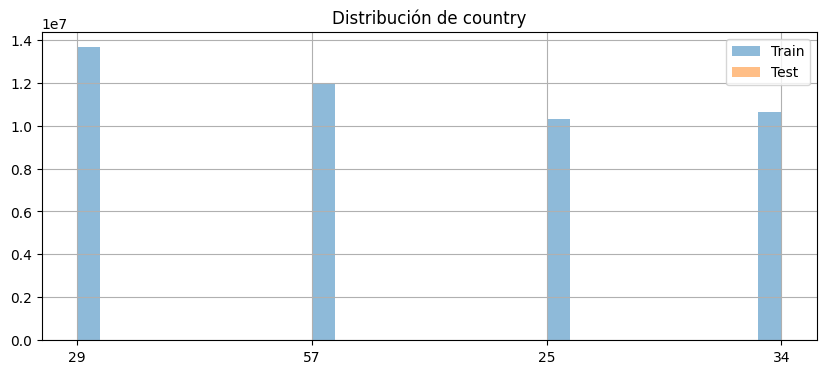

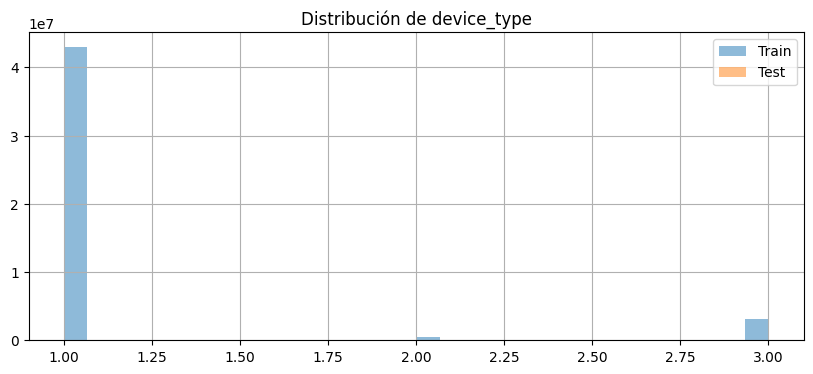

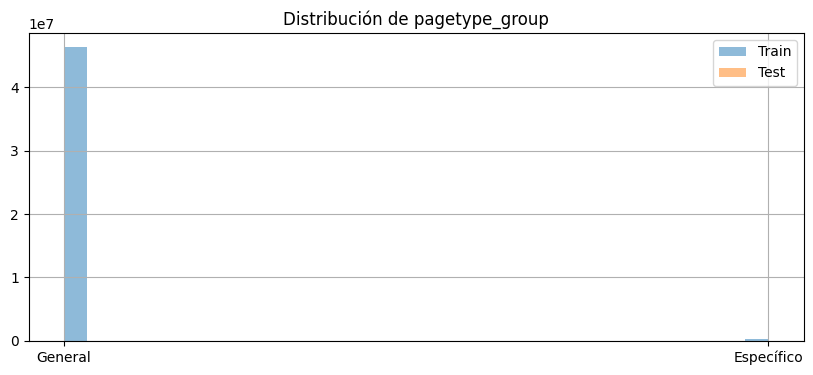

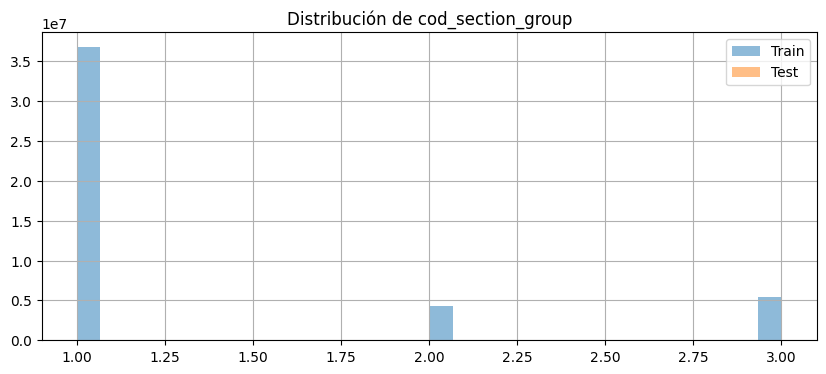

In [25]:
import matplotlib.pyplot as plt

for col in ["country", "device_type", "pagetype_group", "cod_section_group"]:
    plt.figure(figsize=(10, 4))
    train[col].hist(alpha=0.5, label="Train", bins=30)
    test[col].hist(alpha=0.5, label="Test", bins=30)
    plt.title(f"Distribución de {col}")
    plt.legend()
    plt.show()


In [26]:
# 📊 Contar la frecuencia de user_id == -1 en train y test
train_user_counts = train['user_id'].value_counts(normalize=True)
test_user_counts = test['user_id'].value_counts(normalize=True)

# 📌 Mostrar porcentaje de sesiones sin usuario logueado
print(f"🔍 Train: {train_user_counts.get(-1, 0):.2%} de las sesiones son de user_id == -1")
print(f"🔍 Test: {test_user_counts.get(-1, 0):.2%} de las sesiones son de user_id == -1")

# 📊 Comparar distribución completa de user_id en train vs test
print("\n📊 Top 10 valores de user_id en Train:")
print(train_user_counts.head(10))

print("\n📊 Top 10 valores de user_id en Test:")
print(test_user_counts.head(10))

🔍 Train: 85.27% de las sesiones son de user_id == -1
🔍 Test: 80.30% de las sesiones son de user_id == -1

📊 Top 10 valores de user_id en Train:
user_id
-1         0.852706
 436999    0.000074
 304018    0.000052
 88890     0.000045
 447794    0.000045
 184051    0.000045
 31534     0.000041
 271256    0.000040
 327156    0.000039
 445138    0.000037
Name: proportion, dtype: float64

📊 Top 10 valores de user_id en Test:
user_id
-1         0.803040
 180676    0.000683
 270414    0.000615
 314026    0.000581
 177306    0.000376
 19559     0.000342
 53979     0.000342
 68384     0.000342
 314341    0.000342
 83612     0.000342
Name: proportion, dtype: float64


# Modelo tras nueva exploración.

In [27]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

print("📥 Cargando dataset...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📌 Convertir variables categóricas
categorical_features = ['family', 'cod_section_group', 'pagetype_group', 'country', 'hour']
for col in categorical_features:
    train[col] = train[col].astype('category')

# 📌 Selección de features más estricta
selected_features = [
    "country", "cod_section_group", "family", "pagetype_group", "hour",
    "embedding_pca_1", "embedding_pca_2", "embedding_pca_4", "embedding_pca_5",
    "embedding_pca_6", "embedding_pca_9", "embedding_pca_14"
]
target = "add_to_cart"

# 📌 División Train/Validation
session_ids = train["session_id"]
X_train, X_val, y_train, y_val, session_train, session_val = train_test_split(
    train[selected_features], train[target], session_ids, test_size=0.2, random_state=42
)

# 📌 Calcular `query` (longitud de sesiones)
query_train = session_train.value_counts().sort_index().tolist()
query_val = session_val.value_counts().sort_index().tolist()

# 📌 Crear datasets de LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train, group=query_train, categorical_feature=categorical_features)
lgb_val = lgb.Dataset(X_val, label=y_val, group=query_val, reference=lgb_train, categorical_feature=categorical_features)

# 📌 Parámetros ajustados con balance de clases
params = {
    "objective": "lambdarank",
    "boosting_type": "gbdt",
    "metric": ["ndcg", "map"],
    "learning_rate": 0.015,
    "num_leaves": 127,
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 15.0,
    "lambda_l2": 15.0,
    "lambdarank_norm": True,
    "label_gain": [0, 20],
    "eval_at": [5],
    "num_threads": 0,
    "scale_pos_weight": 15  # 🔥 Ajustar según la proporción de clases
}


print("🚀 Entrenando el modelo con features seleccionadas y balanceo de clases...")
callbacks = [lgb.early_stopping(stopping_rounds=30, first_metric_only=True, verbose=True)]
model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=3000, callbacks=callbacks)

# 📊 Evaluación
y_pred_val = model.predict(X_val)

# 📥 Guardar el modelo entrenado
model.save_model('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_balanced_selected.txt')
print("\n✅ Modelo guardado con balance de clases y features optimizadas.")


📥 Cargando dataset...
🚀 Entrenando el modelo con features seleccionadas y balanceo de clases...
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[1997]	valid_0's ndcg@5: 0.95236	valid_0's map@5: 0.942085
Evaluated only: ndcg@5

✅ Modelo guardado con balance de clases y features optimizadas.


In [28]:
# EVALUACIÓN

from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd


# 📌 Restaurar `session_id` y `partnumber` en `X_val`
X_val["session_id"] = session_val.values  
X_val["partnumber"] = train.loc[X_val.index, "partnumber"]  # Recuperamos el producto real

# 📌 Crear `y_val_df` asegurando que `session_id` y `partnumber` estén presentes
y_val_df = pd.DataFrame({
    "session_id": np.ravel(session_val),  
    "partnumber": train.loc[y_val.index, "partnumber"],  # Recuperamos productos comprados
    "add_to_cart": np.ravel(y_val)
})

# 📌 Obtener las características utilizadas en el entrenamiento
features = model.feature_name()

# 📌 Asegurar que `X_val` tenga exactamente las mismas columnas antes de predecir
X_val_pred = X_val[features]

# 📌 Generar predicciones en el conjunto de validación
X_val["score"] = model.predict(X_val_pred)

# 📌 Obtener recomendaciones por sesión (productos en lugar de índices)
session_recommendations = (
    X_val.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)  # Ahora obtenemos productos en lugar de índices
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val_df[y_val_df["add_to_cart"] == 1]
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación corregida
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Filtrar sesiones sin suficientes elementos para evaluar NDCGa
        if len(true_list) < 2 or len(recommended_items) < 2:
            continue  

        # 📌 Asegurar que y_true es 2D con valores de relevancia binarios
        y_true = np.array([[(1 if i in true_list else 0) for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])

        # 📌 Calcular métricas solo si hay al menos un relevante
        if np.sum(y_true) > 0:
            ndcg_scores.append(ndcg_score(y_true, y_score))
            map_scores.append(average_precision_score(y_true[0], y_score[0]))
            mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
            hit_rates.append(1)
        else:
            ndcg_scores.append(0)
            map_scores.append(0)
            mrr_scores.append(0)
            hit_rates.append(0)

    return {
        "NDCG@5": np.mean(ndcg_scores) if ndcg_scores else 0,
        "MAP@5": np.mean(map_scores) if map_scores else 0,
        "MRR": np.mean(mrr_scores) if mrr_scores else 0,
        "Hit Rate @5": np.mean(hit_rates) if hit_rates else 0,
    }

# 📌 Evaluar el modelo
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 Métricas de Evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



📊 Métricas de Evaluación:
NDCG@5: 0.7438
MAP@5: 0.6722
MRR: 0.6959
Hit Rate @5: 0.9057


In [30]:
import json
import pandas as pd
import lightgbm as lgb

# 📤 Cargar el modelo actualizado
model = lgb.Booster(model_file='/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/lightgbm_balanced_selected.txt')

# 📌 Cargar dataset de test
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Obtener las `features` usadas en el entrenamiento
features = model.feature_name()

# 📌 Convertir variables categóricas
categorical_features = ["family", "country", "pagetype_group", "cod_section_group", "hour"]
for col in categorical_features:
    if col in test.columns:
        test[col] = test[col].astype("category")

# 📌 Mantener solo las columnas necesarias en `test`
test = test[["session_id", "partnumber"] + features]

# 📌 Generar predicciones con el modelo
test["score"] = model.predict(test[features])

# 📌 Obtener productos populares globales
top_products = (
    test["partnumber"]
    .value_counts()
    .index[:50]
    .tolist()
)

# 📌 Generar recomendaciones ordenadas por sesión
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Aplicar respaldo inteligente para garantizar **5 productos únicos por sesión**
final_recommendations = {}

for session_id, recommended_products in session_recommendations.items():
    unique_products = []
    seen = set()

    # 1️⃣ **Mantener solo los primeros 5 productos predichos, eliminando duplicados**
    for p in recommended_products:
        if p not in seen:
            seen.add(p)
            unique_products.append(p)
        if len(unique_products) == 5:
            break

    # 2️⃣ **Si hay menos de 5 productos, aplicar respaldo sin alterar el orden inicial**
    if len(unique_products) < 5:
        for p in top_products:
            if p not in seen:
                unique_products.append(p)
                seen.add(p)
            if len(unique_products) == 5:
                break

    # 📌 Guardar recomendaciones finales asegurando **5 productos únicos**
    final_recommendations[str(session_id)] = unique_products

# 📌 Guardar las predicciones en JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_balanced_selected.json"
with open(output_path, "w") as f:
    json.dump({"target": final_recommendations}, f, indent=4)

print(f"\n✅ Archivo de predicciones guardado en: {output_path}")

validate_predictions(output_path)


✅ Archivo de predicciones guardado en: /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_balanced_selected.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 0

🎯 ¡El JSON de predicciones cumple con todas las condiciones! ✅


True

# Cambio de Modelo: Deep Factorization Machines (DeepFM)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# 📥 Cargar datos
print("📥 Cargando datos...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📉 Muestreo del 10% para pruebas rápidas
train = train.sample(frac=0.3, random_state=42)

# 📌 Definir features categóricas y numéricas
categorical_features = ['country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour', 'family']
numerical_features = [col for col in train.columns if col not in ["session_id", "add_to_cart", "partnumber"] + categorical_features]

print("📥 Normalizando datos...")
# 📊 Normalización de las variables numéricas
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# 📌 Convertir variables categóricas a índices únicos
for col in categorical_features:
    train[col] = train[col].astype('category').cat.codes

print("📥 Separando features y target...")
# 📌 Separar features y target
X_train, X_val, y_train, y_val = train_test_split(
    train[categorical_features + numerical_features], 
    train["add_to_cart"], test_size=0.2, random_state=42
)

print("📥 Convertiendo a tensores de PyTorch...")
# 📌 Convertir a tensores de PyTorch
X_train_cat = torch.tensor(X_train[categorical_features].values, dtype=torch.long)
X_train_num = torch.tensor(X_train[numerical_features].values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_cat = torch.tensor(X_val[categorical_features].values, dtype=torch.long)
X_val_num = torch.tensor(X_val[numerical_features].values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# 📌 Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, X_cat, X_num, y):
        self.X_cat = X_cat
        self.X_num = X_num
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_num[idx], self.y[idx]

# 📌 DataLoaders
train_dataset = CustomDataset(X_train_cat, X_train_num, y_train_tensor)
val_dataset = CustomDataset(X_val_cat, X_val_num, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

# 📌 Definir el modelo DeepFM corregido
class DeepFM(nn.Module):
    def __init__(self, num_features, cat_sizes, emb_size=8):
        super(DeepFM, self).__init__()

        # 📌 Embeddings para features categóricas
        self.embeddings = nn.ModuleList([nn.Embedding(cat_size, emb_size) for cat_size in cat_sizes])

        # 📌 Capa lineal FM
        self.fm_linear = nn.Linear(num_features + len(cat_sizes) * emb_size, 1)

        # 📌 Red neuronal profunda (DNN)
        self.deep = nn.Sequential(
            nn.Linear(num_features + len(cat_sizes) * emb_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x_cat, x_num):
        cat_emb = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        cat_emb = torch.cat(cat_emb, dim=1)

        x_all = torch.cat([x_num, cat_emb], dim=1)

        linear_part = self.fm_linear(x_all)
        deep_part = self.deep(x_all)

        return linear_part + deep_part

# 📌 Configuración del modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
cat_sizes = [train[col].nunique() for col in categorical_features]
model = DeepFM(num_features=len(numerical_features), cat_sizes=cat_sizes).to(device)

# 📌 Optimización y pérdida con pesos balanceados
class_counts = train["add_to_cart"].value_counts().to_dict()
pos_weight = torch.tensor([class_counts[0] / class_counts[1]], dtype=torch.float32).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 📌 Entrenamiento del modelo
print("🚀 Entrenando DeepFM...")
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs_cat, inputs_num, labels in train_loader:
        inputs_cat, inputs_num, labels = inputs_cat.to(device), inputs_num.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs_cat, inputs_num)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"🔹 Epoch {epoch+1} - Loss: {running_loss/len(train_loader):.4f}")

print("✅ Entrenamiento finalizado")


📥 Cargando datos...
📥 Normalizando datos...
📥 Separando features y target...
📥 Convertiendo a tensores de PyTorch...
cuda
🚀 Entrenando DeepFM...
🔹 Epoch 1 - Loss: 1.1738
🔹 Epoch 2 - Loss: 1.1668
🔹 Epoch 3 - Loss: 1.1634
🔹 Epoch 4 - Loss: 1.1609
🔹 Epoch 5 - Loss: 1.1591
🔹 Epoch 6 - Loss: 1.1578
🔹 Epoch 7 - Loss: 1.1566
🔹 Epoch 8 - Loss: 1.1557
🔹 Epoch 9 - Loss: 1.1548
🔹 Epoch 10 - Loss: 1.1541
✅ Entrenamiento finalizado


In [2]:
torch.save(model.state_dict(), "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/deepfm_benchmark.pth")
print("✅ Modelo DeepFM guardado correctamente")

# model.load_state_dict(torch.load("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/deepfm_benchmark.pth"))
# model.to(device)
# model.eval()  # Ponerlo en modo evaluación
# print("✅ Modelo DeepFM cargado correctamente")


✅ Modelo DeepFM guardado correctamente


In [ ]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd

test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')


# 📌 Crear DataFrame para `X_val` incluyendo `session_id`
X_val_df = X_val.copy()
X_val_df["session_id"] = test.loc[X_val.index, "session_id"]  # Restaurar `session_id`
X_val_df["partnumber"] = test.loc[X_val.index, "partnumber"]  # Restaurar `partnumber`

# 📌 Pasar datos a PyTorch
X_val_cat = X_val_cat.to(device)
X_val_num = X_val_num.to(device)

# 📌 Generar predicciones
model.eval()
with torch.no_grad():
    val_scores = model(X_val_cat, X_val_num).cpu().numpy().flatten()

# 📌 Agregar scores al DataFrame
X_val_df["score"] = val_scores

# 📌 Generar recomendaciones ordenadas por sesión
session_recommendations = (
    X_val_df.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Obtener ground truth (productos realmente añadidos al carrito)
true_items = (
    y_val[y_val == 1]
    .groupby(X_val_df["session_id"])["partnumber"]
    .apply(list)
    .to_dict()
)

# 📌 Función de evaluación
def evaluate_ranking(predictions, ground_truth, k=5):
    ndcg_scores, map_scores, mrr_scores, hit_rates = [], [], [], []

    for session_id, recommended_items in predictions.items():
        true_list = ground_truth.get(session_id, [])

        # 📌 Ignorar sesiones sin productos relevantes
        if not true_list or not recommended_items:
            continue  

        # 📌 Crear vectores de relevancia
        y_true = np.array([[1 if i in true_list else 0 for i in recommended_items[:k]]])
        y_score = np.array([[k - i for i in range(min(k, len(recommended_items)))]])
        
        # 📌 Calcular métricas
        ndcg_scores.append(ndcg_score(y_true, y_score))
        map_scores.append(average_precision_score(y_true[0], y_score[0]) if np.sum(y_true) > 0 else 0)
        mrr_scores.append(next((1 / (i + 1) for i, val in enumerate(y_true[0]) if val == 1), 0))
        hit_rates.append(1 if np.sum(y_true) > 0 else 0)

    return {
        "NDCG@5": np.mean(ndcg_scores),
        "MAP@5": np.mean(map_scores),
        "MRR": np.mean(mrr_scores),
        "Hit Rate @5": np.mean(hit_rates),
    }

# 📌 Evaluar
metrics = evaluate_ranking(session_recommendations, true_items)
print("\n📊 **Métricas de Evaluación DeepFM:**")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


## Modelo optimizado

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# 📥 Cargar datos
print("📥 Cargando datos...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📉 Muestreo del 30% para pruebas rápidas
train = train.sample(frac=0.30, random_state=42)

# 📌 Definir features categóricas y numéricas
categorical_features = ['country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour', 'family']
numerical_features = [col for col in train.columns if col not in ["session_id", "add_to_cart", "partnumber"] + categorical_features]

print("📥 Normalizando datos...")
# 📊 Normalización de las variables numéricas
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# 📌 Convertir variables categóricas a índices únicos
for col in categorical_features:
    train[col] = train[col].astype('category').cat.codes

print("📥 Separando features y target...")
X_train, X_val, y_train, y_val = train_test_split(
    train[categorical_features + numerical_features], 
    train["add_to_cart"], test_size=0.2, random_state=42
)

print("📥 Convertiendo a tensores de PyTorch...")
X_train_cat = torch.tensor(X_train[categorical_features].values, dtype=torch.long)
X_train_num = torch.tensor(X_train[numerical_features].values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_cat = torch.tensor(X_val[categorical_features].values, dtype=torch.long)
X_val_num = torch.tensor(X_val[numerical_features].values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# 📌 Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, X_cat, X_num, y):
        self.X_cat = X_cat
        self.X_num = X_num
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_num[idx], self.y[idx]

# 📌 DataLoaders
train_dataset = CustomDataset(X_train_cat, X_train_num, y_train_tensor)
val_dataset = CustomDataset(X_val_cat, X_val_num, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

# 📌 Definir el modelo DeepFM mejorado
class DeepFM(nn.Module):
    def __init__(self, num_features, cat_sizes, emb_size=8):
        super(DeepFM, self).__init__()
        
        self.embeddings = nn.ModuleList([nn.Embedding(cat_size, emb_size) for cat_size in cat_sizes])
        
        self.fm_linear = nn.Linear(num_features + len(cat_sizes) * emb_size, 1)
        
        self.deep = nn.Sequential(
            nn.Linear(num_features + len(cat_sizes) * emb_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )
    
    def forward(self, x_cat, x_num):
        cat_emb = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        cat_emb = torch.cat(cat_emb, dim=1)
        
        x_all = torch.cat([x_num, cat_emb], dim=1)
        
        linear_part = self.fm_linear(x_all)
        deep_part = self.deep(x_all)
        
        return linear_part + deep_part

# 📌 Configuración del modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
cat_sizes = [train[col].nunique() for col in categorical_features]
model = DeepFM(num_features=len(numerical_features), cat_sizes=cat_sizes).to(device)

# 📌 Focal Loss para manejar desbalance
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return focal_loss.mean()

criterion = FocalLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)

# 📌 Entrenamiento
print("🚀 Entrenando DeepFM mejorado...")
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs_cat, inputs_num, labels in train_loader:
        inputs_cat, inputs_num, labels = inputs_cat.to(device), inputs_num.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs_cat, inputs_num)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)
        optimizer.step()
    
    scheduler.step()
    print(f"🔹 Epoch {epoch+1} - Loss: {loss.item():.4f}")

print("✅ Entrenamiento finalizado")


📥 Cargando datos...
📥 Normalizando datos...
📥 Separando features y target...
📥 Convertiendo a tensores de PyTorch...
cuda
🚀 Entrenando DeepFM mejorado...
🔹 Epoch 1 - Loss: 0.0117
🔹 Epoch 2 - Loss: 0.0126
🔹 Epoch 3 - Loss: 0.0198
🔹 Epoch 4 - Loss: 0.0091
🔹 Epoch 5 - Loss: 0.0161
🔹 Epoch 6 - Loss: 0.0067
🔹 Epoch 7 - Loss: 0.0119
🔹 Epoch 8 - Loss: 0.0135
🔹 Epoch 9 - Loss: 0.0158
🔹 Epoch 10 - Loss: 0.0125
✅ Entrenamiento finalizado


In [2]:
# Guardado modelo
torch.save(model.state_dict(), "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/deepfm_benchmark_opt.pth")
print("✅ Modelo DeepFM guardado correctamente")

✅ Modelo DeepFM guardado correctamente


/tmp/ipykernel_753544/2225659025.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/home/pablost/Hackathon_inditex_data_science/hackathon

✅ Modelo DeepFM cargado correctamente


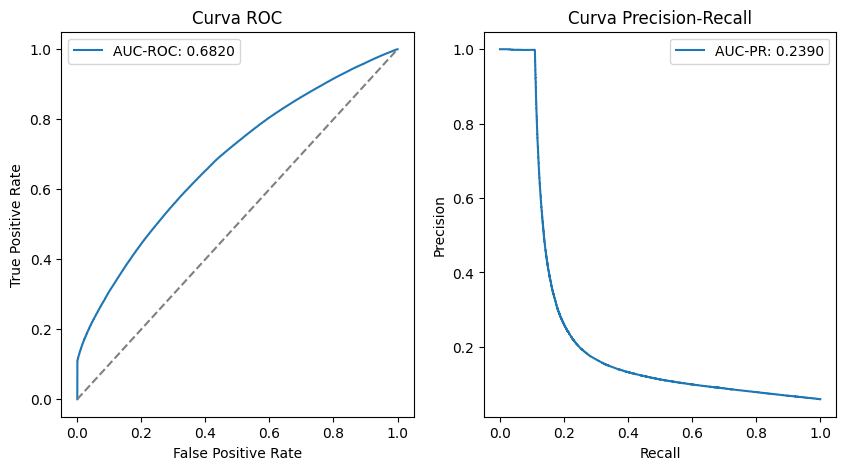


📊 **Métricas de Evaluación:**
AUC-ROC: 0.6820
AUC-PR: 0.2390
F1-score: 0.1964


In [8]:
# Evaluación modelo
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, roc_curve


model.load_state_dict(torch.load("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/deepfm_benchmark_opt.pth"))
model.to(device)
# model.eval()  # Ponerlo en modo evaluación
print("✅ Modelo DeepFM cargado correctamente")

def evaluate_model(model, X_val_cat, X_val_num, y_val_tensor, k=5):
    model.eval()
    with torch.no_grad():
        val_scores = model(X_val_cat, X_val_num).cpu().numpy().flatten()
    
    y_true = y_val_tensor.cpu().numpy().flatten()
    
    # 📊 Cálculo de métricas
    auc_roc = roc_auc_score(y_true, val_scores)
    precision, recall, _ = precision_recall_curve(y_true, val_scores)
    pr_auc = auc(recall, precision)
    
    # 📌 Conversión de scores a etiquetas (umbral 0.5 por defecto)
    y_pred = (val_scores >= 0.5).astype(int)
    f1 = f1_score(y_true, y_pred)
    
    # 📈 Gráfica de la curva ROC
    fpr, tpr, _ = roc_curve(y_true, val_scores)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_roc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend()
    
    # 📈 Gráfica de la curva Precision-Recall
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"AUC-PR: {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.legend()
    plt.show()
    
    return {
        "AUC-ROC": auc_roc,
        "AUC-PR": pr_auc,
        "F1-score": f1
    }

# 📌 Evaluar el modelo
evaluation_metrics = evaluate_model(
    model, 
    X_val_cat.to(device), 
    X_val_num.to(device), 
    y_val_tensor.to(device)
)
print("\n📊 **Métricas de Evaluación:**")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")


In [16]:
# Prediccioens
import torch
import pandas as pd
import json

# \ud83d\udc65 Cargar datos de prueba
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# \ud83d\udccc Asegurar que las variables categóricas sean numéricas
test[categorical_features] = test[categorical_features].apply(lambda x: x.astype('category').cat.codes)

# \ud83d\udccc Preprocesamiento de las características
test_cat = torch.tensor(test[categorical_features].values, dtype=torch.long).to(device)
test_num = torch.tensor(test[numerical_features].values, dtype=torch.float32).to(device)

# \ud83d\udccc Generar predicciones
model.eval()
with torch.no_grad():
    test_scores = model(test_cat, test_num).cpu().numpy().flatten().tolist()

# \ud83d\udccc Crear DataFrame con resultados
test_results = pd.DataFrame({
    "session_id": test["session_id"],
    "partnumber": test["partnumber"],
    "score": test_scores
})

# \ud83d\udccc Ordenar y seleccionar top 5 recomendaciones por sesión
top_recommendations = (
    test_results.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(lambda x: x.unique()[:5].tolist())
    .to_dict()
)

# \ud83d\udc80 Convertir a formato JSON
output_json = {"target": top_recommendations}

# \ud83d\udcc2 Guardar en un archivo JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_deepfm_v1.json"
with open(output_path, "w") as json_file:
    json.dump(output_json, json_file, indent=4)

print(f"✅ Predicciones guardadas en {output_path}")


✅ Predicciones guardadas en /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_deepfm_v1.json


In [15]:
validate_predictions(output_path)


🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 4424

⚠️ ¡Atención! Se encontraron errores en el JSON de predicciones.


False

## Modelo optimizado v2

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from sklearn.model_selection import train_test_split

# 📥 Cargar datos
print("📥 Cargando datos...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📉 Muestreo del 10% para pruebas rápidas
train = train.sample(frac=0.10, random_state=42)

# 📌 Definir features categóricas y numéricas
categorical_features = ['country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour', 'family']
numerical_features = [col for col in train.columns if col not in ["session_id", "add_to_cart", "partnumber"] + categorical_features]

print("📊 Normalizando datos...")
# 📊 Normalización de las variables numéricas
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# 📌 Convertir variables categóricas a índices únicos
for col in categorical_features:
    train[col] = train[col].astype('category').cat.codes

print("📥 Separando features y target...")
X_train, X_val, y_train, y_val = train_test_split(
    train[categorical_features + numerical_features],
    train["add_to_cart"], test_size=0.2, random_state=42
)

print("📥 Convirtiendo a tensores de PyTorch...")
X_train_cat = torch.tensor(X_train[categorical_features].values, dtype=torch.long)
X_train_num = torch.tensor(X_train[numerical_features].values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_cat = torch.tensor(X_val[categorical_features].values, dtype=torch.long)
X_val_num = torch.tensor(X_val[numerical_features].values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# 📌 Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, X_cat, X_num, y):
        self.X_cat = X_cat
        self.X_num = X_num
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_num[idx], self.y[idx]

# 📌 Manejo del desbalance con WeightedRandomSampler
class_counts = y_train.value_counts().to_dict()
weights = [1 / class_counts[label.item()] for label in y_train_tensor]
sampler = WeightedRandomSampler(weights, len(weights), replacement=True)

# 📌 DataLoaders con Sampler
train_dataset = CustomDataset(X_train_cat, X_train_num, y_train_tensor)
val_dataset = CustomDataset(X_val_cat, X_val_num, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

# 📌 Definir el modelo DeepFM
class DeepFM(nn.Module):
    def __init__(self, num_features, cat_sizes, emb_size=10):
        super(DeepFM, self).__init__()

        self.embeddings = nn.ModuleList([nn.Embedding(cat_size, emb_size) for cat_size in cat_sizes])

        self.fm_linear = nn.Linear(num_features + len(cat_sizes) * emb_size, 1)

        self.deep = nn.Sequential(
            nn.Linear(num_features + len(cat_sizes) * emb_size, 1024),
            nn.LeakyReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.LeakyReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )

    def forward(self, x_cat, x_num):
        cat_emb = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        cat_emb = torch.cat(cat_emb, dim=1)

        x_all = torch.cat([x_num, cat_emb], dim=1)

        linear_part = self.fm_linear(x_all)
        deep_part = self.deep(x_all)

        return linear_part + deep_part  # Sin aplicar sigmoid aquí

# 📌 Configuración del modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo usado: {device}")
cat_sizes = [train[col].nunique() for col in categorical_features]
model = DeepFM(num_features=len(numerical_features), cat_sizes=cat_sizes).to(device)

# 📌 Definir la función de pérdida con pesos de clase
class_counts = y_train.value_counts()
class_weights = class_counts.sum() / class_counts
class_weights = torch.tensor(class_weights.values, dtype=torch.float32).to(device)
print(f"Pesos de clase: {class_weights}")

criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])

# 📌 Optimización Avanzada
epochs = 10
optimizer = optim.AdamW(model.parameters(), lr=0.002, weight_decay=1e-5)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.005, steps_per_epoch=len(train_loader), epochs=epochs
)

# 📌 Entrenamiento
print("🚀 Entrenando DeepFM...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs_cat, inputs_num, labels in train_loader:
        inputs_cat, inputs_num, labels = inputs_cat.to(device), inputs_num.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs_cat, inputs_num)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()

    # 📌 Evaluación en validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_cat, inputs_num, labels in val_loader:
            inputs_cat, inputs_num, labels = inputs_cat.to(device), inputs_num.to(device), labels.to(device)
            outputs = model(inputs_cat, inputs_num)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f"🔹 Epoch {epoch+1} - Training Loss: {running_loss/len(train_loader):.4f} - Validation Loss: {val_loss:.4f}")

print("✅ Entrenamiento finalizado")

📥 Cargando datos...
📊 Normalizando datos...
📥 Separando features y target...
📥 Convirtiendo a tensores de PyTorch...
Dispositivo usado: cuda
Pesos de clase: tensor([ 1.0626, 16.9838], device='cuda:0')
🚀 Entrenando DeepFM...
🔹 Epoch 1 - Training Loss: 1.8452 - Validation Loss: 2.5505
🔹 Epoch 2 - Training Loss: 1.8084 - Validation Loss: 2.5416
🔹 Epoch 3 - Training Loss: 1.8040 - Validation Loss: 2.6312
🔹 Epoch 4 - Training Loss: 1.7978 - Validation Loss: 2.5323
🔹 Epoch 5 - Training Loss: 1.7905 - Validation Loss: 2.3210
🔹 Epoch 6 - Training Loss: 1.7822 - Validation Loss: 2.5094
🔹 Epoch 7 - Training Loss: 1.7740 - Validation Loss: 2.4031
🔹 Epoch 8 - Training Loss: 1.7652 - Validation Loss: 2.3894
🔹 Epoch 9 - Training Loss: 1.7591 - Validation Loss: 2.3423
🔹 Epoch 10 - Training Loss: 1.7553 - Validation Loss: 2.3694
✅ Entrenamiento finalizado


In [21]:
# Guardado modelo
torch.save(model.state_dict(), "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/deepfm_benchmark_opt_v2.pth")
print("✅ Modelo DeepFM guardado correctamente")

✅ Modelo DeepFM guardado correctamente


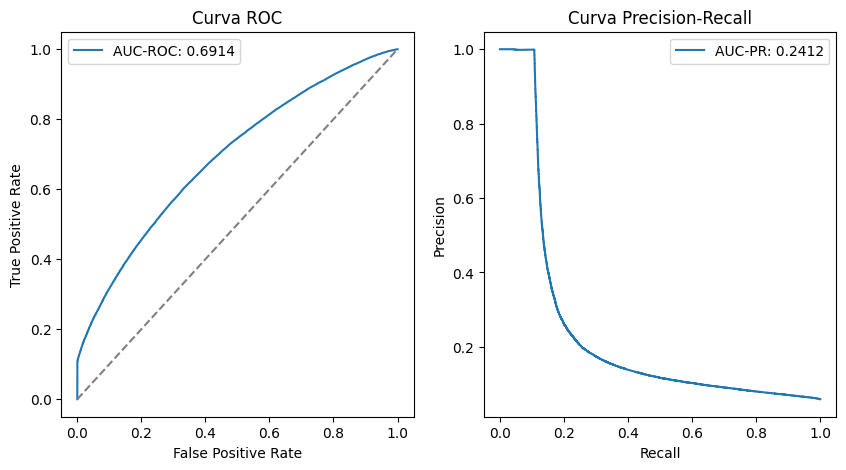


📊 **Métricas de Evaluación:**
AUC-ROC: 0.6914
AUC-PR: 0.2412
F1-score: 0.1156


In [10]:
# Evaluación modelo
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, roc_curve


def evaluate_model(model, X_val_cat, X_val_num, y_val_tensor, k=5):
    model.eval()
    with torch.no_grad():
        val_scores = model(X_val_cat, X_val_num).cpu().numpy().flatten()
    
    y_true = y_val_tensor.cpu().numpy().flatten()
    
    # 📊 Cálculo de métricas
    auc_roc = roc_auc_score(y_true, val_scores)
    precision, recall, _ = precision_recall_curve(y_true, val_scores)
    pr_auc = auc(recall, precision)
    
    # 📌 Conversión de scores a etiquetas (umbral 0.5 por defecto)
    y_pred = (val_scores >= 0.5).astype(int)
    f1 = f1_score(y_true, y_pred)
    
    # 📈 Gráfica de la curva ROC
    fpr, tpr, _ = roc_curve(y_true, val_scores)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_roc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend()
    
    # 📈 Gráfica de la curva Precision-Recall
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"AUC-PR: {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.legend()
    plt.show()
    
    return {
        "AUC-ROC": auc_roc,
        "AUC-PR": pr_auc,
        "F1-score": f1
    }

# 📌 Evaluar el modelo
evaluation_metrics = evaluate_model(
    model, 
    X_val_cat.to(device), 
    X_val_num.to(device), 
    y_val_tensor.to(device)
)
print("\n📊 **Métricas de Evaluación:**")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")


In [33]:
# Prediccioens
import torch
import pandas as pd
import json

# \ud83d\udc65 Cargar datos de prueba
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# \ud83d\udccc Asegurar que las variables categóricas sean numéricas
test[categorical_features] = test[categorical_features].apply(lambda x: x.astype('category').cat.codes)

# \ud83d\udccc Preprocesamiento de las características
test_cat = torch.tensor(test[categorical_features].values, dtype=torch.long).to(device)
test_num = torch.tensor(test[numerical_features].values, dtype=torch.float32).to(device)

# \ud83d\udccc Generar predicciones
model.eval()
with torch.no_grad():
    test_scores = model(test_cat, test_num).cpu().numpy().flatten().tolist()

# \ud83d\udccc Crear DataFrame con resultados
test_results = pd.DataFrame({
    "session_id": test["session_id"],
    "partnumber": test["partnumber"],
    "score": test_scores
})

# \ud83d\udccc Ordenar y seleccionar top 5 recomendaciones por sesión
top_recommendations = (
    test_results.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(lambda x: x.unique()[:5].tolist())
    .to_dict()
)

# \ud83d\udc80 Convertir a formato JSON
output_json = {"target": top_recommendations}

# \ud83d\udcc2 Guardar en un archivo JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_deepfm_v3.json"
with open(output_path, "w") as json_file:
    json.dump(output_json, json_file, indent=4)

print(f"✅ Predicciones guardadas en {output_path}")

validate_predictions(output_path)

✅ Predicciones guardadas en /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_deepfm_v3.json

🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 4424

⚠️ ¡Atención! Se encontraron errores en el JSON de predicciones.


False

## Modelo optimizado - v3

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from sklearn.model_selection import train_test_split

# 📥 Cargar datos
print("📥 Cargando datos...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')

# 📉 Muestreo del 30% para pruebas rápidas
train = train.sample(frac=0.10, random_state=42)

# 📌 Definir features categóricas y numéricas
categorical_features = ['country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour', 'family']
numerical_features = [col for col in train.columns if col not in ["session_id", "add_to_cart", "partnumber"] + categorical_features]

print("📥 Normalizando datos...")
# 📊 Normalización de las variables numéricas
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# 📌 Convertir variables categóricas a índices únicos
for col in categorical_features:
    train[col] = train[col].astype('category').cat.codes

print("📥 Separando features y target...")
X_train, X_val, y_train, y_val = train_test_split(
    train[categorical_features + numerical_features], 
    train["add_to_cart"], test_size=0.2, random_state=42
)

print("📥 Convertiendo a tensores de PyTorch...")
X_train_cat = torch.tensor(X_train[categorical_features].values, dtype=torch.long)
X_train_num = torch.tensor(X_train[numerical_features].values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_cat = torch.tensor(X_val[categorical_features].values, dtype=torch.long)
X_val_num = torch.tensor(X_val[numerical_features].values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# 📌 Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, X_cat, X_num, y):
        self.X_cat = X_cat
        self.X_num = X_num
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_num[idx], self.y[idx]

# 📌 Manejo del Desbalance con Sampler
class_counts = y_train.value_counts().to_dict()
weights = [1 / class_counts[label.item()] for label in y_train_tensor]
sampler = WeightedRandomSampler(weights, len(weights), replacement=True)

# 📌 DataLoaders con Sampler
train_dataset = CustomDataset(X_train_cat, X_train_num, y_train_tensor)
val_dataset = CustomDataset(X_val_cat, X_val_num, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

# 📌 Definir el modelo DeepFM mejorado
class DeepFM(nn.Module):
    def __init__(self, num_features, cat_sizes, emb_size=10):
        super(DeepFM, self).__init__()
        
        self.embeddings = nn.ModuleList([nn.Embedding(cat_size, emb_size) for cat_size in cat_sizes])
        
        self.fm_linear = nn.Linear(num_features + len(cat_sizes) * emb_size, 1)
        
        self.deep = nn.Sequential(
            nn.Linear(num_features + len(cat_sizes) * emb_size, 1024),
            nn.LeakyReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.LeakyReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )
    
    def forward(self, x_cat, x_num):
        cat_emb = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        cat_emb = torch.cat(cat_emb, dim=1)
        
        x_all = torch.cat([x_num, cat_emb], dim=1)
        
        linear_part = self.fm_linear(x_all)
        deep_part = self.deep(x_all)
        
        return torch.sigmoid(linear_part + deep_part)

# 📌 Configuración del modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
cat_sizes = [train[col].nunique() for col in categorical_features]
model = DeepFM(num_features=len(numerical_features), cat_sizes=cat_sizes).to(device)

# 📌 Focal Loss para manejar desbalance
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.75, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return focal_loss.mean()

criterion = FocalLoss()

# 📌 Optimización Avanzada
epochs = 10
optimizer = optim.AdamW(model.parameters(), lr=0.002, weight_decay=1e-5)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.005, steps_per_epoch=len(train_loader), epochs=epochs
)

# 📌 Entrenamiento
print("🚀 Entrenando DeepFM mejorado...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs_cat, inputs_num, labels in train_loader:
        inputs_cat, inputs_num, labels = inputs_cat.to(device), inputs_num.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs_cat, inputs_num)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()

    # 📌 Evaluación en validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_cat, inputs_num, labels in val_loader:
            inputs_cat, inputs_num, labels = inputs_cat.to(device), inputs_num.to(device), labels.to(device)
            outputs = model(inputs_cat, inputs_num)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    print(f"🔹 Epoch {epoch+1} - Training Loss: {running_loss/len(train_loader):.4f} - Validation Loss: {val_loss:.4f}")

    # 📌 Ajustar LR dinámicamente
    scheduler.step(val_loss)

print("✅ Entrenamiento finalizado")


📥 Cargando datos...
📥 Normalizando datos...
📥 Separando features y target...
📥 Convertiendo a tensores de PyTorch...
cuda
🚀 Entrenando DeepFM mejorado...
🔹 Epoch 1 - Training Loss: 0.1224 - Validation Loss: 0.1373


/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/.env/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


🔹 Epoch 2 - Training Loss: 0.1218 - Validation Loss: 0.1389
🔹 Epoch 3 - Training Loss: 0.1217 - Validation Loss: 0.1385
🔹 Epoch 4 - Training Loss: 0.1216 - Validation Loss: 0.1380
🔹 Epoch 5 - Training Loss: 0.1215 - Validation Loss: 0.1401
🔹 Epoch 6 - Training Loss: 0.1214 - Validation Loss: 0.1386
🔹 Epoch 7 - Training Loss: 0.1213 - Validation Loss: 0.1370
🔹 Epoch 8 - Training Loss: 0.1212 - Validation Loss: 0.1388
🔹 Epoch 9 - Training Loss: 0.1212 - Validation Loss: 0.1395
🔹 Epoch 10 - Training Loss: 0.1211 - Validation Loss: 0.1384
✅ Entrenamiento finalizado


In [ ]:
# Guardado modelo
torch.save(model.state_dict(), "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/models/deepfm_benchmark_opt_v3.pth")
print("✅ Modelo DeepFM guardado correctamente")

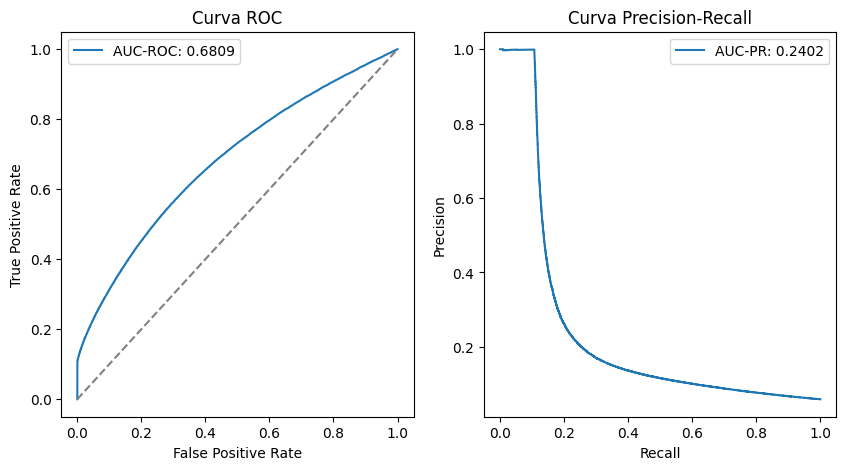


📊 **Métricas de Evaluación:**
AUC-ROC: 0.6809
AUC-PR: 0.2402
F1-score: 0.2088


In [3]:
# Evaluación modelo
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, roc_curve


def evaluate_model(model, X_val_cat, X_val_num, y_val_tensor, k=5):
    model.eval()
    with torch.no_grad():
        val_scores = model(X_val_cat, X_val_num).cpu().numpy().flatten()
    
    y_true = y_val_tensor.cpu().numpy().flatten()
    
    # 📊 Cálculo de métricas
    auc_roc = roc_auc_score(y_true, val_scores)
    precision, recall, _ = precision_recall_curve(y_true, val_scores)
    pr_auc = auc(recall, precision)
    
    # 📌 Conversión de scores a etiquetas (umbral 0.5 por defecto)
    y_pred = (val_scores >= 0.5).astype(int)
    f1 = f1_score(y_true, y_pred)
    
    # 📈 Gráfica de la curva ROC
    fpr, tpr, _ = roc_curve(y_true, val_scores)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_roc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend()
    
    # 📈 Gráfica de la curva Precision-Recall
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"AUC-PR: {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.legend()
    plt.show()
    
    return {
        "AUC-ROC": auc_roc,
        "AUC-PR": pr_auc,
        "F1-score": f1
    }

# 📌 Evaluar el modelo
evaluation_metrics = evaluate_model(
    model, 
    X_val_cat.to(device), 
    X_val_num.to(device), 
    y_val_tensor.to(device)
)
print("\n📊 **Métricas de Evaluación:**")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")


In [ ]:
# Prediccioens
import torch
import pandas as pd
import json

# \ud83d\udc65 Cargar datos de prueba
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# \ud83d\udccc Asegurar que las variables categóricas sean numéricas
test[categorical_features] = test[categorical_features].apply(lambda x: x.astype('category').cat.codes)

# \ud83d\udccc Preprocesamiento de las características
test_cat = torch.tensor(test[categorical_features].values, dtype=torch.long).to(device)
test_num = torch.tensor(test[numerical_features].values, dtype=torch.float32).to(device)

# \ud83d\udccc Generar predicciones
model.eval()
with torch.no_grad():
    test_scores = model(test_cat, test_num).cpu().numpy().flatten().tolist()

# \ud83d\udccc Crear DataFrame con resultados
test_results = pd.DataFrame({
    "session_id": test["session_id"],
    "partnumber": test["partnumber"],
    "score": test_scores
})

# \ud83d\udccc Ordenar y seleccionar top 5 recomendaciones por sesión
top_recommendations = (
    test_results.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(lambda x: x.unique()[:5].tolist())
    .to_dict()
)

# \ud83d\udc80 Convertir a formato JSON
output_json = {"target": top_recommendations}

# \ud83d\udcc2 Guardar en un archivo JSON
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_deepfm_v3.json"
with open(output_path, "w") as json_file:
    json.dump(output_json, json_file, indent=4)

print(f"✅ Predicciones guardadas en {output_path}")

validate_predictions(output_path)

# Modelo Híbrido DeepFM + Lightgbm


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score

# 📥 Cargar datos
print("📥 Cargando datos...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
train = train.sample(frac=0.10, random_state=42)  # Muestreo rápido

# 📌 Definir features categóricas y numéricas
categorical_features = ['country', 'pagetype_group', 'cod_section_group', 'device_type', 'color_id', 'hour', 'family']
numerical_features = [col for col in train.columns if col not in ["session_id", "add_to_cart", "partnumber"] + categorical_features]

print("📥 Normalizando datos...")
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# 📌 Convertir variables categóricas a índices únicos
for col in categorical_features:
    train[col] = train[col].astype('category').cat.codes

print("📥 Separando features y target...")
X_train, X_val, y_train, y_val = train_test_split(
    train[categorical_features + numerical_features], train["add_to_cart"], test_size=0.2, random_state=42
)

# 📌 Convertir a tensores de PyTorch
X_train_cat = torch.tensor(X_train[categorical_features].values, dtype=torch.long)
X_train_num = torch.tensor(X_train[numerical_features].values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_cat = torch.tensor(X_val[categorical_features].values, dtype=torch.long)
X_val_num = torch.tensor(X_val[numerical_features].values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

# 📌 Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, X_cat, X_num, y):
        self.X_cat = X_cat
        self.X_num = X_num
        self.y = y
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_num[idx], self.y[idx]

train_dataset = CustomDataset(X_train_cat, X_train_num, y_train_tensor)
val_dataset = CustomDataset(X_val_cat, X_val_num, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

# 📌 Modelo DeepFM
class DeepFM(nn.Module):
    def __init__(self, num_features, cat_sizes, emb_size=16):
        super(DeepFM, self).__init__()
        self.embeddings = nn.ModuleList([nn.Embedding(cat_size, emb_size) for cat_size in cat_sizes])
        self.deep = nn.Sequential(
            nn.Linear(num_features + len(cat_sizes) * emb_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x_cat, x_num):
        cat_emb = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        cat_emb = torch.cat(cat_emb, dim=1)
        x_all = torch.cat([x_num, cat_emb], dim=1)
        
        deep_features = self.deep[:-1](x_all)  # Extraer features ANTES de la última capa
        output = self.deep[-1](deep_features)  # Última capa
        
        return output, deep_features  # Devolvemos ambas salidas

# 📌 Entrenar DeepFM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
cat_sizes = [train[col].nunique() for col in categorical_features]
model = DeepFM(num_features=len(numerical_features), cat_sizes=cat_sizes).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.002, weight_decay=1e-5)

print("🚀 Entrenando DeepFM...")
for epoch in range(10):  # Aumentamos las epochs para mejorar las features
    model.train()
    for inputs_cat, inputs_num, labels in train_loader:
        inputs_cat, inputs_num, labels = inputs_cat.to(device), inputs_num.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, _ = model(inputs_cat, inputs_num)  # Solo usamos outputs
        loss = criterion(outputs.squeeze(1), labels)
        loss.backward()
        optimizer.step()

print("✅ Entrenamiento DeepFM finalizado")

# 📌 Extraer características intermedias de DeepFM
model.eval()
with torch.no_grad():
    _, train_deepfm_features = model(X_train_cat.to(device), X_train_num.to(device))
    _, val_deepfm_features = model(X_val_cat.to(device), X_val_num.to(device))
    
train_deepfm_features = train_deepfm_features.cpu().numpy()
val_deepfm_features = val_deepfm_features.cpu().numpy()

# 📌 Preparar features para LightGBM
train_deepfm_df = pd.DataFrame(train_deepfm_features, columns=[f"deepfm_feat_{i}" for i in range(train_deepfm_features.shape[1])])
val_deepfm_df = pd.DataFrame(val_deepfm_features, columns=[f"deepfm_feat_{i}" for i in range(val_deepfm_features.shape[1])])
X_train_lgb = pd.concat([X_train.reset_index(drop=True), train_deepfm_df], axis=1)
X_val_lgb = pd.concat([X_val.reset_index(drop=True), val_deepfm_df], axis=1)

# 📌 Entrenar LightGBM con ajuste de peso
print("🚀 Entrenando LightGBM...")
train_data = lgb.Dataset(X_train_lgb, label=y_train)
val_data = lgb.Dataset(X_val_lgb, label=y_val, reference=train_data)

params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc"],
    "learning_rate": 0.02,
    "num_leaves": 127,
    "max_depth": 7,
    "verbosity": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.9,
    "bagging_freq": 5,
    "lambda_l1": 5.0,
    "lambda_l2": 5.0,
    # "lambdarank_norm": True,
    "label_gain": [0, 20],
    "eval_at": [5],
    "num_threads": 0,
    "scale_pos_weight": 12  # 🔥 Ajustar según la proporción de clases
}

lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=700,  # Aumentamos iteraciones
    callbacks=[lgb.early_stopping(20)]  # Early stopping más permisivo
)

# 📌 Evaluación
lgb_preds = lgb_model.predict(X_val_lgb)
auc_roc = roc_auc_score(y_val, lgb_preds)
auc_pr = average_precision_score(y_val, lgb_preds)
print(f"📊 AUC-ROC: {auc_roc:.4f}, AUC-PR: {auc_pr:.4f}")


📥 Cargando datos...
📥 Normalizando datos...
📥 Separando features y target...
cuda
🚀 Entrenando DeepFM...
✅ Entrenamiento DeepFM finalizado
🚀 Entrenando LightGBM...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[960]	valid_0's auc: 0.697638
📊 AUC-ROC: 0.6976, AUC-PR: 0.2456


In [5]:
missing_cols = set(X_train_lgb.columns) - set(X_test_lgb.columns)
extra_cols = set(X_test_lgb.columns) - set(X_train_lgb.columns)

print(f"❌ Columnas faltantes en X_test_lgb: {missing_cols}")
print(f"❌ Columnas extra en X_test_lgb: {extra_cols}")

❌ Columnas faltantes en X_test_lgb: set()
❌ Columnas extra en X_test_lgb: {'partnumber', 'session_id'}


In [6]:
import json

# 📥 Cargar test
print("📥 Cargando test...")
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Aplicar las mismas transformaciones que en train
test[numerical_features] = scaler.transform(test[numerical_features])  # Normalizar
for col in categorical_features:
    test[col] = test[col].astype('category').cat.codes  # Codificar categorías

# 📌 Convertir a tensores de PyTorch
X_test_cat = torch.tensor(test[categorical_features].values, dtype=torch.long).to(device)
X_test_num = torch.tensor(test[numerical_features].values, dtype=torch.float32).to(device)

# 📌 Extraer características de DeepFM
model.eval()
with torch.no_grad():
    _, test_deepfm_features = model(X_test_cat, X_test_num)

# 📌 Preparar input para LightGBM
test_deepfm_df = pd.DataFrame(test_deepfm_features.cpu().numpy(), columns=[f"deepfm_feat_{i}" for i in range(test_deepfm_features.shape[1])])
X_test_lgb = pd.concat([test.reset_index(drop=True), test_deepfm_df], axis=1)

X_test_lgb = X_test_lgb.drop(columns=["partnumber", "session_id"])

# 📌 Generar predicciones con LightGBM
test["score"] = lgb_model.predict(X_test_lgb)

# 📌 Generar recomendaciones por sesión
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(lambda x: list(x[:5]))  # Tomar los top 5 productos por sesión
    .to_dict()
)

# 📌 Guardar JSON en el formato correcto
output_json = {"target": session_recommendations}

output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_hybrid.json"
with open(output_path, "w") as json_file:
    json.dump(output_json, json_file, indent=4)

print(f"✅ Predicciones guardadas en {output_path}")


📥 Cargando test...
✅ Predicciones guardadas en /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_hybrid.json


In [10]:
import torch
import pandas as pd
import numpy as np
import lightgbm as lgb

# 📥 Cargar datos de test
print("📥 Cargando test set...")
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📌 Preprocesamiento de las características (igual que en entrenamiento)
test[numerical_features] = scaler.transform(test[numerical_features])  # Normalizar
for col in categorical_features:
    test[col] = test[col].astype('category').cat.codes  # Codificar categorías

# 📌 Convertir test a tensores de PyTorch
X_test_cat = torch.tensor(test[categorical_features].values, dtype=torch.long).to(device)
X_test_num = torch.tensor(test[numerical_features].values, dtype=torch.float32).to(device)

# 📌 Generar predicciones con DeepFM
model.eval()
with torch.no_grad():
    deepfm_scores, _ = model(X_test_cat, X_test_num)
deepfm_scores = deepfm_scores.cpu().numpy().flatten()

# 📌 Extraer features de DeepFM para LightGBM
_, test_deepfm_features = model(X_test_cat, X_test_num)
test_deepfm_features = test_deepfm_features.detach().cpu().numpy()

# 📌 Preparar test para LightGBM
test_deepfm_df = pd.DataFrame(test_deepfm_features, columns=[f"deepfm_feat_{i}" for i in range(test_deepfm_features.shape[1])])
X_test_lgb = pd.concat([test.reset_index(drop=True), test_deepfm_df], axis=1).drop(columns=["session_id", "partnumber"])  # Asegurar las mismas columnas

# 📌 Generar predicciones con LightGBM
lightgbm_scores = lgb_model.predict(X_test_lgb)

# 📌 Combinar scores con un promedio ponderado
alpha = 0.6  # Peso de LightGBM (ajústalo según validación)
test["score"] = alpha * lightgbm_scores + (1 - alpha) * deepfm_scores

# 📌 Generar recomendaciones por sesión
session_recommendations = (
    test.sort_values(["session_id", "score"], ascending=[True, False])
    .groupby("session_id")["partnumber"]
    .apply(lambda x: list(x[:5]))  # Tomar los top 5 productos por sesión
    .to_dict()
)

# 📌 Guardar el JSON en el formato requerido
output_json = {"target": session_recommendations}
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_hybrid_ponderado.json"

import json
with open(output_path, "w") as json_file:
    json.dump(output_json, json_file, indent=4)

print(f"✅ Predicciones guardadas en {output_path}")


📥 Cargando test set...
✅ Predicciones guardadas en /home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_hybrid_ponderado.json


In [11]:
validate_predictions(output_path)


🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 5727

⚠️ ¡Atención! Se encontraron errores en el JSON de predicciones.


False

# Cambio de Modelo: Transformer-Based Ranking Model

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from transformers import BertModel, BertConfig
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import json
from transformers import get_linear_schedule_with_warmup


# 📥 Cargar datos
print("📥 Cargando datos...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet')
train = train.sample(frac=0.50, random_state=42)  # Muestreo rápido

test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📊 Preprocesamiento
print("📊 Preprocesando datos...")
le = LabelEncoder()
train['partnumber'] = le.fit_transform(train['partnumber'])

# 🔹 Manejo de valores desconocidos en test (Reemplazar -1 por 0)
known_classes = set(le.classes_)
test['partnumber'] = test['partnumber'].apply(lambda x: le.transform([x])[0] if x in known_classes else 0)

# 📌 Verificar valores en test
min_test, max_test = test['partnumber'].min(), test['partnumber'].max()
print(f"🔍 Índices en test: min={min_test}, max={max_test}")

# 📌 Agrupar por sesión
train_sessions = train.groupby('session_id')['partnumber'].apply(list).reset_index()
test_sessions = test.groupby('session_id')['partnumber'].apply(list).reset_index()

# 📌 Dataset para BERT4Rec
class SessionDataset(Dataset):
    def __init__(self, sessions, max_len=10):
        self.sessions = sessions
        self.max_len = max_len
    
    def __len__(self):
        return len(self.sessions)
    
    def __getitem__(self, idx):
        session = self.sessions[idx]
        session_length = min(self.max_len, len(session))

        padding_size = self.max_len - session_length
        padding = [0] * padding_size  

        session = padding + session[-session_length:]  
        attention_mask = [0] * padding_size + [1] * session_length  

        return torch.tensor(session, dtype=torch.long), torch.tensor(attention_mask, dtype=torch.long)

train_dataset = SessionDataset(train_sessions['partnumber'])
test_dataset = SessionDataset(test_sessions['partnumber'])

# 📌 Collate function para DataLoader
def collate_fn(batch):
    sessions, attention_masks = zip(*batch)
    sessions = torch.stack(sessions, dim=0)
    attention_masks = torch.stack(attention_masks, dim=0)
    return sessions, attention_masks

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, collate_fn=collate_fn)

# 📌 Modelo BERT4Rec
# 📌 Ajustar modelo
class BERT4Rec(nn.Module):
    def __init__(self, vocab_size, hidden_size=256, num_layers=4, num_heads=8):
        super(BERT4Rec, self).__init__()
        config = BertConfig(
            vocab_size=vocab_size,
            hidden_size=hidden_size,
            num_hidden_layers=num_layers,
            num_attention_heads=num_heads,
            intermediate_size=1024
        )
        self.bert = BertModel(config)
        self.output_layer = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, attention_mask):
        outputs = self.bert(input_ids=x, attention_mask=attention_mask).last_hidden_state
        return self.output_layer(outputs[:, -1, :])


# 📌 Inicializar modelo con lr_scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_size = len(le.classes_)
model = BERT4Rec(vocab_size).to(device)

# 📌 Configuración del entrenamiento
# criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

epochs = 5

# 📌 Warmup + Decay
num_training_steps = len(train_loader) * epochs  # Pasos totales de entrenamiento
num_warmup_steps = num_training_steps // 10
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)

# 📌 Cambio de Loss Function
criterion = nn.CrossEntropyLoss()

# 📌 Entrenamiento
print("🚀 Entrenando BERT4Rec con mejoras...")
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch, attention_mask in train_loader:
        batch, attention_mask = batch.to(device), attention_mask.to(device)

        optimizer.zero_grad()
        outputs = model(batch, attention_mask)

        # 🛑 MLM: Enmascarar un 15% de los tokens
        mask_prob = 0.15
        mask_token = vocab_size - 1
        mask = torch.rand(batch.shape) < mask_prob
        masked_batch = batch.clone()
        masked_batch[mask] = mask_token

        targets = batch[:, -1]  # Última palabra de la secuencia
        loss = criterion(outputs, targets)  # Ajuste de la función de pérdida
        optimizer.step()
        scheduler.step()  # 🔥 Ajustar LR

        total_loss += loss.item()

    print(f"🔹 Epoch {epoch+1} - Loss: {total_loss/len(train_loader):.4f}")

print("✅ Entrenamiento finalizado")

# 📌 Generar predicciones
print("📝 Generando recomendaciones...")
model.eval()
predictions = {}

with torch.no_grad():
    for batch_idx, (batch, attention_mask) in enumerate(test_loader):
        batch, attention_mask = batch.to(device), attention_mask.to(device)

        # Obtener los session_id correspondientes a este batch
        start_idx = batch_idx * test_loader.batch_size
        end_idx = min(start_idx + test_loader.batch_size, len(test_sessions))
        batch_session_ids = test_sessions['session_id'].iloc[start_idx:end_idx].tolist()

        # 🛑 DEBUG: Verificar batch y sesión asignada
        min_idx, max_idx = batch.min().item(), batch.max().item()
        # print(f"🔍 Batch {batch_idx}: {batch.shape}, Min index: {min_idx}, Max index: {max_idx}, Sessions: {len(batch_session_ids)}")

        if min_idx < 0 or max_idx >= vocab_size:
            print(f"⚠️ Corrigiendo valores fuera de vocabulario en inferencia...")
            batch[batch < 0] = 0  # Reemplazo seguro

        outputs = model(batch, attention_mask)
        top_k_items = torch.topk(outputs, k=5, dim=1).indices.cpu().numpy()

        # Convertir índices a partnumbers evitando errores
        for i, session_id in enumerate(batch_session_ids):
            try:
                recommendations = [le.inverse_transform([idx])[0] for idx in top_k_items[i] if idx in le.classes_]
            except ValueError:
                print(f"⚠️ Error en sesión {session_id}: índices fuera de rango")
                recommendations = []

            predictions[session_id] = recommendations

# 📌 Validación de salida
num_sessions_test = len(test_sessions)
num_sessions_json = len(predictions)
missing_sessions = num_sessions_test - num_sessions_json

print(f"🔍 **Resultados de Validación:**")
print(f"✅ Sesiones en test: {num_sessions_test}")
print(f"✅ Sesiones en JSON: {num_sessions_json}")
print(f"❌ Sesiones faltantes: {missing_sessions}")

# 📌 Guardar JSON asegurando que los valores sean serializables
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/src/models/final/back_up_json/predictions_bert4rec.json"

# Convertir valores a tipos nativos de Python
predictions_serializable = {
    str(session_id): [int(item) for item in items] for session_id, items in predictions.items()
}

with open(output_path, "w") as json_file:
    json.dump({"target": predictions_serializable}, json_file, indent=4)

print(f"✅ Predicciones guardadas en {output_path}")

📥 Cargando datos...
📊 Preprocesando datos...
🔍 Índices en test: min=0, max=38867
🚀 Entrenando BERT4Rec con mejoras...
🔹 Epoch 1 - Loss: 10.7286
🔹 Epoch 2 - Loss: 10.7285


KeyboardInterrupt: 

In [17]:
validate_predictions(output_path)


🔍 **Resultados de Validación:**
✅ Sesiones en test: 7349
✅ Sesiones en JSON: 7349
❌ Sesiones faltantes: 0
❌ Sesiones extra: 0
❌ Sesiones con errores (duplicados o < 5 productos): 4949

⚠️ ¡Atención! Se encontraron errores en el JSON de predicciones.


False

In [25]:
# 📌 Evaluación del modelo (corregido)
def recall_at_k(actual, predicted, k=5):
    actual_set = set(actual)  # Convertir a conjunto para eficiencia
    return len(actual_set & set(predicted[:k])) / len(actual_set) if len(actual_set) > 0 else 0

def precision_at_k(actual, predicted, k=5):
    actual_set = set(actual)
    return len(actual_set & set(predicted[:k])) / k

def ndcg_at_k(actual, predicted, k=5):
    actual_set = set(actual)
    relevance = np.array([1 if item in actual_set else 0 for item in predicted[:k]])
    
    if relevance.sum() == 0:
        return 0  # Evitar divisiones por cero

    dcg = np.sum(relevance / np.log2(np.arange(2, len(relevance) + 2)))
    idcg = np.sum(sorted(relevance, reverse=True) / np.log2(np.arange(2, len(relevance) + 2)))

    return dcg / idcg if idcg > 0 else 0

def mean_reciprocal_rank(actual, predicted):
    for rank, item in enumerate(predicted, start=1):
        if item in actual:
            return 1 / rank
    return 0

recall_scores, precision_scores, ndcg_scores, mrr_scores = [], [], [], []

for session_id, recommendations in predictions.items():
    actual_items = test_sessions.loc[test_sessions['session_id'] == session_id, 'partnumber'].values

    # Corregir el error: Asegurar que actual_items es una lista plana
    if len(actual_items) == 0:
        continue  
    actual_items = list(actual_items[0])  # Convertir array a lista

    recall_scores.append(recall_at_k(actual_items, recommendations))
    precision_scores.append(precision_at_k(actual_items, recommendations))
    ndcg_scores.append(ndcg_at_k(actual_items, recommendations))
    mrr_scores.append(mean_reciprocal_rank(actual_items, recommendations))

print(f"📊 **Evaluación del modelo:**")
print(f"✅ Recall@5: {np.mean(recall_scores):.4f}")
print(f"✅ Precision@5: {np.mean(precision_scores):.4f}")
print(f"✅ NDCG@5: {np.mean(ndcg_scores):.4f}")
print(f"✅ MRR: {np.mean(mrr_scores):.4f}")

print("✅ Evaluación completada")

📊 **Evaluación del modelo:**
✅ Recall@5: 0.0000
✅ Precision@5: 0.0001
✅ NDCG@5: 0.0001
✅ MRR: 0.0001
✅ Evaluación completada


# Modelo Bert4rec - Creamos embedding de user_id & session_id para evitar memorización e intentar buscar generalización

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from transformers import BertModel, BertConfig
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from transformers import get_linear_schedule_with_warmup
import random


# 📥 Cargar datos
print("📥 Cargando datos...")
train = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet').sample(frac=0.20, random_state=42)
test = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet')

# 📊 Preprocesamiento
print("📊 Preprocesando datos...")
le_part = LabelEncoder()
train['partnumber'] = le_part.fit_transform(train['partnumber'])

le_user = LabelEncoder()
train['user_id'] = le_user.fit_transform(train['user_id'])
# Agregar un índice para 'usuario desconocido'
le_user.classes_ = np.append(le_user.classes_, 'unknown_user')

le_session = LabelEncoder()
train['session_id'] = le_session.fit_transform(train['session_id'])
# Agregar un índice para 'sesión desconocida'
le_session.classes_ = np.append(le_session.classes_, 'unknown_session')

# 📌 Obtener tamaños
vocab_size = len(le_part.classes_)
user_size = len(le_user.classes_)
session_size = len(le_session.classes_)

# 📌 Manejo de valores desconocidos en test
def transform_or_unknown(le, x, unknown_label):
    if x in le.classes_:
        return le.transform([x])[0]
    else:
        return le.transform([unknown_label])[0]

test['partnumber'] = test['partnumber'].apply(lambda x: le_part.transform([x])[0] if x in le_part.classes_ else 0)
test['user_id'] = test['user_id'].apply(lambda x: transform_or_unknown(le_user, x, 'unknown_user'))
test['session_id'] = test['session_id'].apply(lambda x: transform_or_unknown(le_session, x, 'unknown_session'))

# 📌 Agrupar por sesión
train_sessions = train.groupby('session_id').agg({'partnumber': list, 'user_id': 'first'}).reset_index()
test_sessions = test.groupby('session_id').agg({'partnumber': list, 'user_id': 'first'}).reset_index()

# 📌 Dataset con User y Session Embeddings y enmascaramiento
class SessionDataset(Dataset):
    def __init__(self, sessions, users, session_ids, max_len=20, mask_prob=0.15, is_train=True):
        self.sessions = sessions
        self.users = users
        self.session_ids = session_ids
        self.max_len = max_len
        self.mask_prob = mask_prob
        self.is_train = is_train

    def __len__(self):
        return len(self.sessions)

    def __getitem__(self, idx):
        session = self.sessions[idx]
        user_id = self.users[idx]
        session_id = self.session_ids[idx]

        if self.is_train:
            # Entrada: todos menos el último ítem
            tokens = session[:-1]
            # Objetivo: desde el segundo ítem
            target = session[1:]
        else:
            # En inferencia, usamos toda la secuencia para predecir el siguiente ítem
            tokens = session
            target = None

        # Aplicar padding si es necesario
        if len(tokens) < self.max_len:
            padding_length = self.max_len - len(tokens)
            tokens = [0]*padding_length + tokens
            if target is not None:
                target = [-100]*padding_length + target
        else:
            tokens = tokens[-self.max_len:]
            if target is not None:
                target = target[-self.max_len:]

        # Crear máscara de atención
        attention_mask = [1 if token != 0 else 0 for token in tokens]

        if self.is_train:
            # Aplicar enmascaramiento aleatorio a los tokens (Masked Language Modeling)
            tokens, target = self.mask_tokens(tokens, target)
        else:
            # En inferencia, no aplicamos enmascaramiento
            pass

        result = {
            'tokens': torch.tensor(tokens, dtype=torch.long),
            'user_id': torch.tensor(user_id, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long),
            'session_id': session_id
        }

        if target is not None:
            result['target'] = torch.tensor(target, dtype=torch.long)

        return result

    def mask_tokens(self, tokens, target):
        tokens = np.array(tokens)
        labels = np.array(target)

        # Solo enmascaramos los tokens que no son padding
        probability_matrix = (tokens != 0).astype(float) * self.mask_prob
        masked_indices = np.random.binomial(1, probability_matrix).astype(bool)

        # Los tokens enmascarados se reemplazan por el índice 1 (suponiendo que no está en uso)
        tokens[masked_indices] = 1  # Puedes definir un índice específico para [MASK]

        # Los tokens no enmascarados se ignoran en la pérdida
        labels[~masked_indices] = -100

        return tokens.tolist(), labels.tolist()

# Crear datasets
# Crear datasets
train_dataset = SessionDataset(
    sessions=train_sessions['partnumber'],
    users=train_sessions['user_id'],
    session_ids=train_sessions['session_id'],
    is_train=True
)
test_dataset = SessionDataset(
    sessions=test_sessions['partnumber'],
    users=test_sessions['user_id'],
    session_ids=test_sessions['session_id'],
    is_train=False
)

# 📌 Collate function
# Ajustar collate_fn para manejar ambos casos
def collate_fn(batch):
    tokens = torch.stack([item['tokens'] for item in batch])
    user_ids = torch.stack([item['user_id'] for item in batch])
    attention_masks = torch.stack([item['attention_mask'] for item in batch])
    session_ids = [item['session_id'] for item in batch]

    if 'target' in batch[0]:
        targets = torch.stack([item['target'] for item in batch])
        return tokens, user_ids, attention_masks, targets, session_ids
    else:
        return tokens, user_ids, attention_masks, session_ids

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)

# 📌 Modelo BERT4Rec ajustado
class BERT4Rec(nn.Module):
    def __init__(self, vocab_size, user_size, hidden_size=128, num_layers=2, num_heads=4, max_len=20):
        super(BERT4Rec, self).__init__()
        self.part_embedding = nn.Embedding(vocab_size, hidden_size, padding_idx=0)
        self.user_embedding = nn.Embedding(user_size, hidden_size)
        self.position_embedding = nn.Embedding(max_len, hidden_size)

        self.embedding_layernorm = nn.LayerNorm(hidden_size)
        self.dropout = nn.Dropout(0.1)

        config = BertConfig(
            vocab_size=vocab_size,
            hidden_size=hidden_size,
            num_hidden_layers=num_layers,
            num_attention_heads=num_heads,
            intermediate_size=hidden_size * 4,
            max_position_embeddings=max_len
        )
        self.transformer = BertModel(config)

        self.output_layer = nn.Linear(hidden_size, vocab_size)

    def forward(self, part_ids, user_ids, attention_mask):
        # Obtener embeddings
        part_embeds = self.part_embedding(part_ids)
        user_embeds = self.user_embedding(user_ids).unsqueeze(1).expand(-1, part_embeds.size(1), -1)

        # Generar embeddings posicionales
        position_ids = torch.arange(part_ids.size(1), dtype=torch.long, device=part_ids.device)
        position_ids = position_ids.unsqueeze(0).expand(part_ids.size(0), -1)
        position_embeds = self.position_embedding(position_ids)

        # Combinar embeddings y aplicar LayerNorm y Dropout
        embeddings = part_embeds + user_embeds + position_embeds
        embeddings = self.embedding_layernorm(embeddings)
        embeddings = self.dropout(embeddings)

        # Pasar por el Transformer
        outputs = self.transformer(inputs_embeds=embeddings, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state

        # Generar predicciones
        logits = self.output_layer(sequence_output)
        return logits

# 📌 Inicializar modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERT4Rec(vocab_size, user_size).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Configuración del programador de tasa de aprendizaje
total_steps = len(train_loader) * 5  # Número total de pasos de entrenamiento
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1*total_steps), num_training_steps=total_steps)

criterion = nn.CrossEntropyLoss(ignore_index=-100)  # Ignorar los índices -100 en el cálculo de la pérdida
scaler = torch.cuda.amp.GradScaler()

# 📌 Entrenamiento ajustado
print("🚀 Entrenando BERT4Rec ajustado...")
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for tokens, user_ids, attention_mask, targets in train_loader:
        tokens = tokens.to(device)
        user_ids = user_ids.to(device)
        attention_mask = attention_mask.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        with torch.cuda.amp.autocast():  
            outputs = model(tokens, user_ids, attention_mask)
            # Ajustar la forma de los tensores para calcular la pérdida
            loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()
        
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"🔹 Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

print("✅ Entrenamiento finalizado")

# 📈 Evaluación en el conjunto de prueba
print("📝 Evaluando en el conjunto de prueba...")
model.eval()
total_eval_loss = 0
with torch.no_grad():
    for tokens, user_ids, attention_mask, targets in test_loader:
        tokens = tokens.to(device)
        user_ids = user_ids.to(device)
        attention_mask = attention_mask.to(device)
        targets = targets.to(device)

        with torch.cuda.amp.autocast():  
            outputs = model(tokens, user_ids, attention_mask)
            loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        
        total_eval_loss += loss.item()
    avg_eval_loss = total_eval_loss / len(test_loader)
    print(f"🔹 Evaluación - Loss: {avg_eval_loss:.4f}")

print("🏁 Proceso completado")

In [ ]:
# 📌 Generar predicciones
print("📝 Generando recomendaciones...")
model.eval()
predictions = {}

with torch.no_grad():
    for tokens, user_ids, attention_mask, session_ids in test_loader:
        tokens = tokens.to(device)
        user_ids = user_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model(tokens, user_ids, attention_mask)
        # outputs tiene forma [batch_size, seq_len, vocab_size]

        # Obtener los logits de la última posición de la secuencia
        logits = outputs[:, -1, :]  # Forma: [batch_size, vocab_size]

        # Obtener los top-k ítems recomendados
        top_k_items = torch.topk(logits, k=5, dim=1).indices.cpu().numpy()

        for i, session_id in enumerate(session_ids):
            # Mapear índices a partnumbers
            try:
                recommendations = le_part.inverse_transform(top_k_items[i])
            except ValueError:
                # Manejar índices fuera de rango
                recommendations = []

            # Convertir a lista y almacenar en predicciones
            predictions[session_id] = recommendations.tolist()

# 📌 Validación de salida
num_sessions_test = len(test_sessions)
num_sessions_json = len(predictions)
missing_sessions = num_sessions_test - num_sessions_json

print(f"🔍 **Resultados de Validación:**")
print(f"✅ Sesiones en test: {num_sessions_test}")
print(f"✅ Sesiones en JSON: {num_sessions_json}")
print(f"❌ Sesiones faltantes: {missing_sessions}")

# 📌 Guardar JSON asegurando que los valores sean serializables
output_path = "predictions_bert4rec.json"

# Convertir valores a tipos nativos de Python
predictions_serializable = {
    str(session_id): [int(item) for item in items] for session_id, items in predictions.items()
}

with open(output_path, "w") as json_file:
    json.dump({"target": predictions_serializable}, json_file, indent=4)

print(f"✅ Predicciones guardadas en {output_path}")

validate_predictions(output_path)

# Modelo
